In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_descriptor  = pd.read_csv('descriptor_data-Tg.csv')
df_descriptor = df_descriptor.drop(['Unnamed: 0', 'index', 'SPS.1'], axis=1)
df_descriptor

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,NumRotatableBonds/fr_benzene
0,13.141177,13.141177,0.265951,-0.457895,0.277448,13.850000,526.504,508.360,526.116486,192,...,0,0,0,0,0,0,0,0,0,1.000000
1,13.206052,13.206052,0.231972,-0.483947,0.277448,13.850000,526.504,508.360,526.116486,192,...,0,0,0,0,0,0,0,0,0,1.000000
2,13.038914,13.038914,0.287477,-0.440418,0.277448,13.850000,526.504,508.360,526.116486,192,...,0,0,0,0,0,0,0,0,0,1.000000
3,13.067867,13.067867,0.278141,-0.448012,0.277448,13.850000,526.504,508.360,526.116486,192,...,0,0,0,0,0,0,0,0,0,1.000000
4,13.485877,13.485877,0.236573,-0.464772,0.181114,13.404255,618.601,596.425,618.142701,226,...,0,0,0,0,0,0,0,0,0,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,13.723226,13.723226,0.012953,-5.072091,0.120906,13.684211,780.633,758.457,780.133120,284,...,0,0,0,0,0,0,0,0,0,1.333333
1670,15.025392,15.025392,0.041072,-6.179509,0.120526,14.369231,914.655,892.479,914.128625,332,...,0,0,0,0,0,0,0,0,0,1.333333
1671,13.830496,13.830496,0.001505,-5.075345,0.094903,13.397260,990.909,954.621,990.237585,364,...,0,0,0,0,0,0,0,0,0,1.500000
1672,14.263960,14.263960,0.163438,-5.088767,0.315479,24.545455,612.526,590.350,612.148377,226,...,0,0,0,0,0,0,0,0,0,0.666667


In [2]:
target_values = pd.read_excel('input-Tg-DSC.xlsx')
target_values = target_values['Tg(℃)']

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = MinMaxScaler()
df_descriptor_s = std.fit_transform(df_descriptor)

In [4]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

sel = VarianceThreshold(threshold=0.01)
X_sel = sel.fit_transform(df_descriptor_s)
feature_index = sel.get_support()

selected_columns = df_descriptor.columns[feature_index]

X_sel_df = pd.DataFrame(X_sel, columns=selected_columns)

print('number of features after remove redundant ones:', sum(feature_index))

number of features after remove redundant ones: 131


In [5]:
y = target_values

In [24]:
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectFromModel
import pandas as pd

catb = CatBoostRegressor()

catb.fit(X_sel_df, y, verbose=False)


feature_importances = catb.get_feature_importance()
threshold = 1  
selected_features = X_sel_df.columns[feature_importances > threshold]

X_selected = X_sel_df[selected_features]
X_selected

,qed,MaxPartialCharge,MaxAbsPartialCharge,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_MRHI,BertzCT,PEOE_VSA6,PEOE_VSA8,PEOE_VSA9,...,VSA_EState2,VSA_EState8,FractionCSP3,NumAromaticRings,NumHAcceptors,NumRotatableBonds,RingCount,fr_aniline,fr_bicyclic,fr_ether
0,0.324536,0.078744,0.470292,0.779674,0.258316,0.117797,0.222200,0.126467,0.119808,0.251960,...,0.034348,0.061282,0.000000,0.294118,0.133333,0.105263,0.266667,0.142857,0.428571,0.285714
1,0.324536,0.078744,0.461085,0.790027,0.259208,0.117778,0.222200,0.126467,0.000000,0.251960,...,0.036715,0.061282,0.000000,0.294118,0.133333,0.105263,0.266667,0.142857,0.428571,0.285714
2,0.324536,0.078744,0.472064,0.794201,0.257551,0.117768,0.222200,0.090333,0.000000,0.251960,...,0.030830,0.061282,0.000000,0.294118,0.133333,0.105263,0.266667,0.142857,0.428571,0.285714
3,0.324536,0.078744,0.472064,0.794113,0.257567,0.117768,0.222200,0.090333,0.000000,0.251960,...,0.031874,0.061282,0.000000,0.294118,0.133333,0.105263,0.266667,0.142857,0.428571,0.285714
4,0.202787,0.078744,0.472198,0.779674,0.261153,0.117884,0.282411,0.126467,0.119808,0.251960,...,0.041445,0.061282,0.000000,0.352941,0.200000,0.157895,0.333333,0.142857,0.428571,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0.126695,0.442035,0.472054,0.667152,0.281055,0.117882,0.336500,0.054200,0.067468,0.377941,...,0.039730,0.061282,0.055901,0.352941,0.200000,0.184211,0.333333,0.142857,0.285714,0.428571
1670,0.126214,0.442035,0.471737,0.347973,0.718537,0.117819,0.383612,0.090333,0.067468,0.377941,...,0.041889,0.061282,0.130435,0.352941,0.133333,0.184211,0.333333,0.142857,0.285714,0.285714
1671,0.093832,0.442035,0.472129,0.426056,0.284081,0.117917,0.478068,0.167707,0.127692,0.377941,...,0.045746,0.219893,0.102975,0.470588,0.266667,0.289474,0.466667,0.142857,0.285714,0.571429
1672,0.372600,0.443577,0.358383,0.350760,0.446690,0.079410,0.191391,0.108400,0.000000,0.393993,...,0.044356,0.061282,0.366848,0.176471,0.000000,0.026316,0.266667,0.142857,0.571429,0.000000


In [26]:
X_selected.columns

Index(['qed', 'MaxPartialCharge', 'MaxAbsPartialCharge', 'BCUT2D_MWLOW',
       'BCUT2D_CHGHI', 'BCUT2D_MRHI', 'BertzCT', 'PEOE_VSA6', 'PEOE_VSA8',
       'PEOE_VSA9', 'SMR_VSA6', 'SMR_VSA7', 'SlogP_VSA1', 'SlogP_VSA11',
       'SlogP_VSA4', 'SlogP_VSA8', 'VSA_EState2', 'VSA_EState8',
       'FractionCSP3', 'NumAromaticRings', 'NumHAcceptors',
       'NumRotatableBonds', 'RingCount', 'fr_aniline', 'fr_bicyclic',
       'fr_ether'],
      dtype='object')

In [6]:
X_selected = df_descriptor[['qed', 'MaxPartialCharge', 'MaxAbsPartialCharge', 'BCUT2D_MWLOW',
       'BCUT2D_CHGHI', 'BCUT2D_MRHI', 'BertzCT', 'PEOE_VSA6', 'PEOE_VSA8',
       'PEOE_VSA9', 'SMR_VSA6', 'SMR_VSA7', 'SlogP_VSA1', 'SlogP_VSA11',
       'SlogP_VSA4', 'SlogP_VSA8', 'VSA_EState2', 'VSA_EState8',
       'FractionCSP3', 'NumAromaticRings', 'NumHAcceptors',
       'NumRotatableBonds', 'RingCount', 'fr_aniline', 'fr_bicyclic',
       'fr_ether']]
X_selected

,qed,MaxPartialCharge,MaxAbsPartialCharge,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_MRHI,BertzCT,PEOE_VSA6,PEOE_VSA8,PEOE_VSA9,...,VSA_EState2,VSA_EState8,FractionCSP3,NumAromaticRings,NumHAcceptors,NumRotatableBonds,RingCount,fr_aniline,fr_bicyclic,fr_ether
0,0.277448,0.265782,0.456699,10.078658,2.366209,6.341607,1914.533705,42.464569,10.772448,27.941192,...,51.174951,0.000000,0.000000,5,6,5,7,1,3,2
1,0.277448,0.265782,0.453398,10.087402,2.366906,6.341548,1914.533705,42.464569,0.000000,27.941192,...,51.438666,0.000000,0.000000,5,6,5,7,1,3,2
2,0.277448,0.265782,0.457334,10.090928,2.365611,6.341518,1914.533705,30.331835,0.000000,27.941192,...,50.782960,0.000000,0.000000,5,6,5,7,1,3,2
3,0.277448,0.265782,0.457334,10.090854,2.365624,6.341518,1914.533705,30.331835,0.000000,27.941192,...,50.899307,0.000000,0.000000,5,6,5,7,1,3,2
4,0.181114,0.265782,0.457382,10.078658,2.368427,6.341882,2280.826020,42.464569,10.772448,27.941192,...,51.965703,0.000000,0.000000,6,7,7,8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0.120906,0.415947,0.457330,9.983613,2.383984,6.341874,2609.872077,18.199101,6.066367,39.068095,...,51.774566,0.000000,0.047619,6,7,8,8,1,2,3
1670,0.120526,0.415947,0.457217,9.714010,2.725971,6.341677,2896.475592,30.331835,6.066367,39.068095,...,52.015129,0.000000,0.111111,6,6,8,8,1,2,2
1671,0.094903,0.415947,0.457357,9.779965,2.386350,6.341985,3471.089793,56.312044,11.481358,39.068095,...,52.444858,4.129199,0.087719,8,8,12,10,1,2,4
1672,0.315479,0.416584,0.416584,9.716365,2.513464,6.221058,1727.110075,36.398202,0.000000,40.485913,...,52.290010,0.000000,0.312500,3,4,2,7,1,4,0


In [56]:
X_selected.to_csv('Feature_importance_catb_26.csv', index=False)

In [8]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,random_state=1)

catb = CatBoostRegressor()

catb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

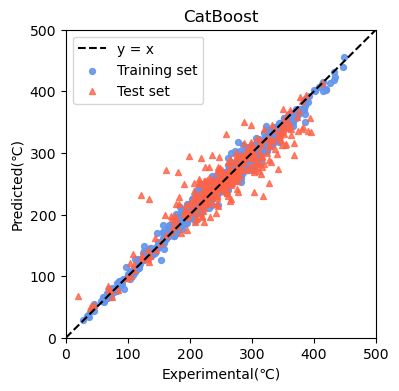

In [9]:
y_pred_train_catb = catb.predict(X_train)
y_pred_test_catb = catb.predict(X_test)

plt.figure(figsize=(4,4))
plt.plot([0, 500], [0, 500], 'k--', label = 'y = x')
plt.scatter(y_train, y_pred_train_catb, alpha=0.9, label='Training set', color='cornflowerblue', marker='o', s=18)  # Set color to cornflowerblue
plt.scatter(y_test, y_pred_test_catb, alpha=0.8, label='Test set', color='tomato', marker='^', s=18)  # Set color to tomato
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.title('CatBoost')
plt.legend()
plt.xlabel('Experimental(℃)')
plt.ylabel('Predicted(℃)')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, make_scorer

print('training R = %.3f' % np.sqrt(r2_score(y_train, y_pred_train_catb)))
print('training R2 = %.3f' % r2_score(y_train, y_pred_train_catb))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_train, y_pred_train_catb)))

print('test R = %.3f' % np.sqrt(r2_score(y_test, y_pred_test_catb)))
print('test R2 = %.3f' % r2_score(y_test, y_pred_test_catb))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, y_pred_test_catb)))
print('test MAE = %.3f' %mean_absolute_error(y_test, y_pred_test_catb))

training R = 0.992
training R2 = 0.983
training RMSE = 8.651
test R = 0.927
test R2 = 0.860
test RMSE = 26.120
test MAE = 18.406


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': range(900, 1200, 100),
    'depth': range(4, 8, 1),
    'learning_rate': np.arange(0.08, 0.13, 0.01),
}

grid_search = GridSearchCV(catb, param_grid=param_grid, scoring='r2', cv=5, verbose=0)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [58]:
# Best parameters:  {'depth': 6, 'iterations': 1100, 'learning_rate': 0.09}
# Best score:  0.8296183821878668

In [12]:
from catboost import CatBoostRegressor

best_catb = CatBoostRegressor(iterations=1100, learning_rate=0.09, max_depth=6,loss_function='RMSE')

best_catb.fit(X_train, y_train, verbose=False)

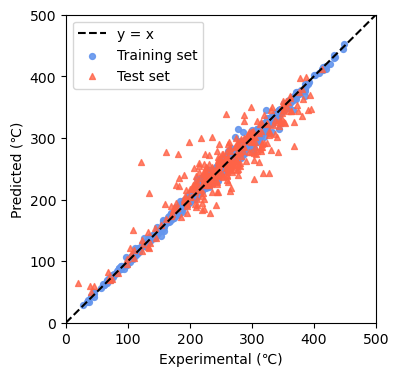

In [13]:
y_pred_train_catb = best_catb.predict(X_train)
y_pred_test_catb = best_catb.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot([0, 500], [0, 500], 'k--', label = 'y = x')
plt.scatter(y_train, y_pred_train_catb, alpha=0.9, label='Training set', color='cornflowerblue', marker='o', s=18)  # Set color to cornflowerblue
plt.scatter(y_test, y_pred_test_catb, alpha=0.8, label='Test set', color='tomato', marker='^', s=18)  # Set color to tomato
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.legend()
plt.xlabel('Experimental (℃)')
plt.ylabel('Predicted (℃)')
plt.savefig('CATB-best.png',dpi=300, bbox_inches='tight')
plt.show()

In [71]:
import joblib

joblib.dump(best_catb, 'best_catb.pkl')

best_catb = joblib.load('best_catb.pkl')

In [44]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, make_scorer

print('training R = %.3f' % np.sqrt(r2_score(y_train, best_catb.predict(X_train))))
print('training R2 = %.3f' % r2_score(y_train, best_catb.predict(X_train)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_train, best_catb.predict(X_train))))
print('training MAE = %.3f' %mean_absolute_error(y_train, best_catb.predict(X_train)))

print('test R = %.3f' % np.sqrt(r2_score(y_test, best_catb.predict(X_test))))
print('test R2 = %.3f' % r2_score(y_test, best_catb.predict(X_test)))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, best_catb.predict(X_test))))
print('training MAE = %.3f' %mean_absolute_error(y_test, best_catb.predict(X_test)))

training R = 0.997
training R2 = 0.995
training RMSE = 4.892
training MAE = 3.451
test R = 0.930
test R2 = 0.865
test RMSE = 25.589
training MAE = 18.134


In [45]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                        
r2_scores_catb = cross_val_score(best_catb, X_selected, y, scoring='r2', cv=crossvalidation)
rmse_scores_catb = cross_val_score(best_catb, X_selected,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
mae_scores_catb = cross_val_score(best_catb, X_selected, y, scoring=make_scorer(mean_absolute_error), cv=crossvalidation)

print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_catb), np.sqrt(r2_scores_catb.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_catb), r2_scores_catb.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_catb), -rmse_scores_catb.mean()))
print('Folds:%i, mean MAE: %.3f' %(len(mae_scores_catb), mae_scores_catb.mean()))

0:	learn: 64.0865325	total: 5.76ms	remaining: 6.33s
1:	learn: 61.6192375	total: 9.25ms	remaining: 5.08s
2:	learn: 59.2555699	total: 13.1ms	remaining: 4.78s
3:	learn: 57.1641826	total: 16.5ms	remaining: 4.52s
4:	learn: 55.2189287	total: 20.8ms	remaining: 4.56s
5:	learn: 53.5914168	total: 23.4ms	remaining: 4.27s
6:	learn: 52.1475070	total: 27.5ms	remaining: 4.29s
7:	learn: 50.3850186	total: 30.3ms	remaining: 4.14s
8:	learn: 49.1317883	total: 33.5ms	remaining: 4.06s
9:	learn: 47.7966846	total: 36.2ms	remaining: 3.95s
10:	learn: 46.7059183	total: 39.2ms	remaining: 3.88s
11:	learn: 45.5028130	total: 42.7ms	remaining: 3.87s
12:	learn: 44.4604210	total: 46.4ms	remaining: 3.88s
13:	learn: 43.4379761	total: 49.6ms	remaining: 3.85s
14:	learn: 42.7180027	total: 54ms	remaining: 3.91s
15:	learn: 41.8604067	total: 58.6ms	remaining: 3.97s
16:	learn: 40.9549564	total: 62.6ms	remaining: 3.98s
17:	learn: 40.3034670	total: 66.1ms	remaining: 3.97s
18:	learn: 39.6131950	total: 69.3ms	remaining: 3.94s
19:	l

211:	learn: 17.4787478	total: 587ms	remaining: 2.46s
212:	learn: 17.4685180	total: 590ms	remaining: 2.46s
213:	learn: 17.4347805	total: 593ms	remaining: 2.46s
214:	learn: 17.4167820	total: 596ms	remaining: 2.45s
215:	learn: 17.3588502	total: 599ms	remaining: 2.45s
216:	learn: 17.2960963	total: 603ms	remaining: 2.45s
217:	learn: 17.2914754	total: 606ms	remaining: 2.45s
218:	learn: 17.2448980	total: 608ms	remaining: 2.44s
219:	learn: 17.1908685	total: 611ms	remaining: 2.44s
220:	learn: 17.1430119	total: 614ms	remaining: 2.44s
221:	learn: 17.1226156	total: 616ms	remaining: 2.44s
222:	learn: 17.0696858	total: 619ms	remaining: 2.43s
223:	learn: 17.0542931	total: 622ms	remaining: 2.43s
224:	learn: 17.0051446	total: 624ms	remaining: 2.43s
225:	learn: 16.9561913	total: 627ms	remaining: 2.42s
226:	learn: 16.9463094	total: 630ms	remaining: 2.42s
227:	learn: 16.8993479	total: 633ms	remaining: 2.42s
228:	learn: 16.8848771	total: 635ms	remaining: 2.42s
229:	learn: 16.8338731	total: 638ms	remaining:

401:	learn: 12.2367803	total: 1.18s	remaining: 2.04s
402:	learn: 12.2231782	total: 1.18s	remaining: 2.04s
403:	learn: 12.2017429	total: 1.18s	remaining: 2.04s
404:	learn: 12.1838530	total: 1.19s	remaining: 2.04s
405:	learn: 12.1574733	total: 1.19s	remaining: 2.03s
406:	learn: 12.1407029	total: 1.19s	remaining: 2.03s
407:	learn: 12.1153081	total: 1.2s	remaining: 2.03s
408:	learn: 12.1076648	total: 1.2s	remaining: 2.03s
409:	learn: 12.0963482	total: 1.2s	remaining: 2.02s
410:	learn: 12.0874728	total: 1.21s	remaining: 2.02s
411:	learn: 12.0651434	total: 1.21s	remaining: 2.02s
412:	learn: 12.0316252	total: 1.21s	remaining: 2.02s
413:	learn: 12.0132015	total: 1.21s	remaining: 2.01s
414:	learn: 11.9876277	total: 1.22s	remaining: 2.01s
415:	learn: 11.9711510	total: 1.22s	remaining: 2.01s
416:	learn: 11.9568816	total: 1.22s	remaining: 2s
417:	learn: 11.9362309	total: 1.23s	remaining: 2s
418:	learn: 11.9232657	total: 1.23s	remaining: 2s
419:	learn: 11.9082920	total: 1.23s	remaining: 1.99s
420:	

565:	learn: 9.5816002	total: 1.79s	remaining: 1.69s
566:	learn: 9.5733588	total: 1.8s	remaining: 1.69s
567:	learn: 9.5576153	total: 1.8s	remaining: 1.69s
568:	learn: 9.5385449	total: 1.8s	remaining: 1.68s
569:	learn: 9.5315255	total: 1.8s	remaining: 1.68s
570:	learn: 9.5260475	total: 1.81s	remaining: 1.67s
571:	learn: 9.5210985	total: 1.81s	remaining: 1.67s
572:	learn: 9.5093590	total: 1.81s	remaining: 1.67s
573:	learn: 9.4967728	total: 1.81s	remaining: 1.66s
574:	learn: 9.4826938	total: 1.82s	remaining: 1.66s
575:	learn: 9.4588599	total: 1.82s	remaining: 1.66s
576:	learn: 9.4445236	total: 1.82s	remaining: 1.65s
577:	learn: 9.4360887	total: 1.82s	remaining: 1.65s
578:	learn: 9.4321379	total: 1.83s	remaining: 1.65s
579:	learn: 9.4161569	total: 1.83s	remaining: 1.64s
580:	learn: 9.4130329	total: 1.83s	remaining: 1.64s
581:	learn: 9.3942547	total: 1.84s	remaining: 1.63s
582:	learn: 9.3789309	total: 1.84s	remaining: 1.63s
583:	learn: 9.3666473	total: 1.84s	remaining: 1.63s
584:	learn: 9.35

780:	learn: 7.3705847	total: 2.39s	remaining: 975ms
781:	learn: 7.3644914	total: 2.39s	remaining: 972ms
782:	learn: 7.3510388	total: 2.39s	remaining: 968ms
783:	learn: 7.3469163	total: 2.39s	remaining: 965ms
784:	learn: 7.3339275	total: 2.4s	remaining: 962ms
785:	learn: 7.3223935	total: 2.4s	remaining: 959ms
786:	learn: 7.3154866	total: 2.4s	remaining: 955ms
787:	learn: 7.3120759	total: 2.4s	remaining: 952ms
788:	learn: 7.3085111	total: 2.41s	remaining: 949ms
789:	learn: 7.3007982	total: 2.41s	remaining: 946ms
790:	learn: 7.2993113	total: 2.41s	remaining: 943ms
791:	learn: 7.2876175	total: 2.42s	remaining: 939ms
792:	learn: 7.2806954	total: 2.42s	remaining: 936ms
793:	learn: 7.2749197	total: 2.42s	remaining: 933ms
794:	learn: 7.2723285	total: 2.42s	remaining: 930ms
795:	learn: 7.2686645	total: 2.42s	remaining: 926ms
796:	learn: 7.2653345	total: 2.43s	remaining: 923ms
797:	learn: 7.2585286	total: 2.43s	remaining: 920ms
798:	learn: 7.2522751	total: 2.43s	remaining: 917ms
799:	learn: 7.24

997:	learn: 5.9902539	total: 2.96s	remaining: 303ms
998:	learn: 5.9828649	total: 2.96s	remaining: 300ms
999:	learn: 5.9753143	total: 2.97s	remaining: 297ms
1000:	learn: 5.9704224	total: 2.97s	remaining: 294ms
1001:	learn: 5.9685465	total: 2.97s	remaining: 291ms
1002:	learn: 5.9603539	total: 2.98s	remaining: 288ms
1003:	learn: 5.9531717	total: 2.98s	remaining: 285ms
1004:	learn: 5.9503771	total: 2.98s	remaining: 282ms
1005:	learn: 5.9454166	total: 2.98s	remaining: 279ms
1006:	learn: 5.9424126	total: 2.98s	remaining: 276ms
1007:	learn: 5.9386054	total: 2.99s	remaining: 273ms
1008:	learn: 5.9374875	total: 2.99s	remaining: 270ms
1009:	learn: 5.9343498	total: 2.99s	remaining: 267ms
1010:	learn: 5.9320820	total: 3s	remaining: 264ms
1011:	learn: 5.9250459	total: 3s	remaining: 261ms
1012:	learn: 5.9215742	total: 3s	remaining: 258ms
1013:	learn: 5.9160901	total: 3s	remaining: 255ms
1014:	learn: 5.9116463	total: 3s	remaining: 252ms
1015:	learn: 5.9089382	total: 3.01s	remaining: 249ms
1016:	learn

84:	learn: 24.8739201	total: 254ms	remaining: 3.03s
85:	learn: 24.8121652	total: 257ms	remaining: 3.03s
86:	learn: 24.7207846	total: 259ms	remaining: 3.02s
87:	learn: 24.6684407	total: 262ms	remaining: 3.01s
88:	learn: 24.5574244	total: 264ms	remaining: 3s
89:	learn: 24.5175082	total: 267ms	remaining: 2.99s
90:	learn: 24.4330880	total: 269ms	remaining: 2.98s
91:	learn: 24.3256955	total: 271ms	remaining: 2.97s
92:	learn: 24.2276144	total: 273ms	remaining: 2.96s
93:	learn: 24.1615798	total: 276ms	remaining: 2.95s
94:	learn: 24.0720505	total: 278ms	remaining: 2.94s
95:	learn: 23.9614861	total: 281ms	remaining: 2.93s
96:	learn: 23.8716955	total: 283ms	remaining: 2.93s
97:	learn: 23.8431051	total: 285ms	remaining: 2.92s
98:	learn: 23.7634316	total: 288ms	remaining: 2.91s
99:	learn: 23.6713355	total: 290ms	remaining: 2.9s
100:	learn: 23.5726268	total: 293ms	remaining: 2.9s
101:	learn: 23.4952191	total: 295ms	remaining: 2.89s
102:	learn: 23.4416938	total: 298ms	remaining: 2.88s
103:	learn: 23

301:	learn: 14.5370310	total: 811ms	remaining: 2.14s
302:	learn: 14.5121559	total: 814ms	remaining: 2.14s
303:	learn: 14.4886157	total: 817ms	remaining: 2.14s
304:	learn: 14.4227339	total: 819ms	remaining: 2.13s
305:	learn: 14.3822200	total: 822ms	remaining: 2.13s
306:	learn: 14.3634597	total: 825ms	remaining: 2.13s
307:	learn: 14.3471798	total: 828ms	remaining: 2.13s
308:	learn: 14.3106253	total: 832ms	remaining: 2.13s
309:	learn: 14.2916621	total: 835ms	remaining: 2.13s
310:	learn: 14.2536316	total: 838ms	remaining: 2.13s
311:	learn: 14.2252889	total: 840ms	remaining: 2.12s
312:	learn: 14.1935491	total: 844ms	remaining: 2.12s
313:	learn: 14.1606538	total: 846ms	remaining: 2.12s
314:	learn: 14.1430910	total: 849ms	remaining: 2.12s
315:	learn: 14.1367987	total: 854ms	remaining: 2.12s
316:	learn: 14.1278993	total: 857ms	remaining: 2.12s
317:	learn: 14.0902076	total: 859ms	remaining: 2.11s
318:	learn: 14.0752235	total: 862ms	remaining: 2.11s
319:	learn: 14.0481993	total: 865ms	remaining:

471:	learn: 11.0740293	total: 1.38s	remaining: 1.83s
472:	learn: 11.0723196	total: 1.38s	remaining: 1.83s
473:	learn: 11.0555601	total: 1.38s	remaining: 1.82s
474:	learn: 11.0382395	total: 1.38s	remaining: 1.82s
475:	learn: 11.0376054	total: 1.39s	remaining: 1.82s
476:	learn: 11.0178001	total: 1.39s	remaining: 1.81s
477:	learn: 11.0076973	total: 1.39s	remaining: 1.81s
478:	learn: 10.9906246	total: 1.39s	remaining: 1.81s
479:	learn: 10.9673421	total: 1.4s	remaining: 1.8s
480:	learn: 10.9559196	total: 1.4s	remaining: 1.8s
481:	learn: 10.9541637	total: 1.4s	remaining: 1.8s
482:	learn: 10.9422988	total: 1.4s	remaining: 1.79s
483:	learn: 10.9324443	total: 1.41s	remaining: 1.79s
484:	learn: 10.9080998	total: 1.41s	remaining: 1.79s
485:	learn: 10.9012229	total: 1.41s	remaining: 1.78s
486:	learn: 10.8794034	total: 1.42s	remaining: 1.78s
487:	learn: 10.8764222	total: 1.42s	remaining: 1.78s
488:	learn: 10.8567007	total: 1.42s	remaining: 1.77s
489:	learn: 10.8406045	total: 1.42s	remaining: 1.77s


684:	learn: 8.5077258	total: 1.95s	remaining: 1.18s
685:	learn: 8.4900537	total: 1.96s	remaining: 1.18s
686:	learn: 8.4850962	total: 1.96s	remaining: 1.18s
687:	learn: 8.4801372	total: 1.96s	remaining: 1.17s
688:	learn: 8.4660084	total: 1.96s	remaining: 1.17s
689:	learn: 8.4606235	total: 1.97s	remaining: 1.17s
690:	learn: 8.4561807	total: 1.97s	remaining: 1.17s
691:	learn: 8.4456819	total: 1.97s	remaining: 1.16s
692:	learn: 8.4324763	total: 1.97s	remaining: 1.16s
693:	learn: 8.4129678	total: 1.98s	remaining: 1.16s
694:	learn: 8.4046581	total: 1.98s	remaining: 1.15s
695:	learn: 8.3860575	total: 1.98s	remaining: 1.15s
696:	learn: 8.3800320	total: 1.98s	remaining: 1.15s
697:	learn: 8.3703743	total: 1.99s	remaining: 1.14s
698:	learn: 8.3655513	total: 1.99s	remaining: 1.14s
699:	learn: 8.3512194	total: 1.99s	remaining: 1.14s
700:	learn: 8.3416534	total: 1.99s	remaining: 1.13s
701:	learn: 8.3261238	total: 2s	remaining: 1.13s
702:	learn: 8.3139501	total: 2s	remaining: 1.13s
703:	learn: 8.3079

894:	learn: 6.7882743	total: 2.52s	remaining: 577ms
895:	learn: 6.7808799	total: 2.52s	remaining: 574ms
896:	learn: 6.7777456	total: 2.52s	remaining: 571ms
897:	learn: 6.7722830	total: 2.53s	remaining: 568ms
898:	learn: 6.7647455	total: 2.53s	remaining: 566ms
899:	learn: 6.7550374	total: 2.53s	remaining: 563ms
900:	learn: 6.7476897	total: 2.54s	remaining: 560ms
901:	learn: 6.7415905	total: 2.54s	remaining: 557ms
902:	learn: 6.7359149	total: 2.54s	remaining: 554ms
903:	learn: 6.7322858	total: 2.54s	remaining: 552ms
904:	learn: 6.7229624	total: 2.55s	remaining: 549ms
905:	learn: 6.7182002	total: 2.55s	remaining: 546ms
906:	learn: 6.7175627	total: 2.55s	remaining: 543ms
907:	learn: 6.7139191	total: 2.56s	remaining: 540ms
908:	learn: 6.6990256	total: 2.56s	remaining: 537ms
909:	learn: 6.6951883	total: 2.56s	remaining: 535ms
910:	learn: 6.6933169	total: 2.56s	remaining: 532ms
911:	learn: 6.6849300	total: 2.56s	remaining: 529ms
912:	learn: 6.6794717	total: 2.57s	remaining: 526ms
913:	learn: 

1091:	learn: 5.6668075	total: 3.08s	remaining: 22.5ms
1092:	learn: 5.6595730	total: 3.08s	remaining: 19.7ms
1093:	learn: 5.6565394	total: 3.08s	remaining: 16.9ms
1094:	learn: 5.6503060	total: 3.09s	remaining: 14.1ms
1095:	learn: 5.6469638	total: 3.09s	remaining: 11.3ms
1096:	learn: 5.6420941	total: 3.09s	remaining: 8.46ms
1097:	learn: 5.6393647	total: 3.1s	remaining: 5.64ms
1098:	learn: 5.6334767	total: 3.1s	remaining: 2.82ms
1099:	learn: 5.6322926	total: 3.1s	remaining: 0us
0:	learn: 64.3462594	total: 3.6ms	remaining: 3.96s
1:	learn: 61.8627200	total: 7.25ms	remaining: 3.98s
2:	learn: 59.4339440	total: 10.3ms	remaining: 3.76s
3:	learn: 57.1378041	total: 13.1ms	remaining: 3.59s
4:	learn: 55.2010460	total: 16.2ms	remaining: 3.54s
5:	learn: 53.5406098	total: 19.2ms	remaining: 3.5s
6:	learn: 51.9781235	total: 22.7ms	remaining: 3.55s
7:	learn: 50.5378378	total: 25.9ms	remaining: 3.54s
8:	learn: 48.9714574	total: 29.4ms	remaining: 3.56s
9:	learn: 47.6718885	total: 32.5ms	remaining: 3.54s
10

177:	learn: 18.1974365	total: 493ms	remaining: 2.55s
178:	learn: 18.1483740	total: 495ms	remaining: 2.55s
179:	learn: 18.1234798	total: 498ms	remaining: 2.54s
180:	learn: 18.0726529	total: 501ms	remaining: 2.54s
181:	learn: 18.0213023	total: 503ms	remaining: 2.54s
182:	learn: 17.9862414	total: 506ms	remaining: 2.54s
183:	learn: 17.9169789	total: 509ms	remaining: 2.53s
184:	learn: 17.8979661	total: 511ms	remaining: 2.53s
185:	learn: 17.8550321	total: 513ms	remaining: 2.52s
186:	learn: 17.8046735	total: 516ms	remaining: 2.52s
187:	learn: 17.7700857	total: 518ms	remaining: 2.51s
188:	learn: 17.7400712	total: 520ms	remaining: 2.51s
189:	learn: 17.7196539	total: 523ms	remaining: 2.5s
190:	learn: 17.6753400	total: 526ms	remaining: 2.5s
191:	learn: 17.6166977	total: 528ms	remaining: 2.5s
192:	learn: 17.6104297	total: 531ms	remaining: 2.5s
193:	learn: 17.5793358	total: 534ms	remaining: 2.49s
194:	learn: 17.5590655	total: 536ms	remaining: 2.49s
195:	learn: 17.5150132	total: 539ms	remaining: 2.4

400:	learn: 11.9136578	total: 1.06s	remaining: 1.85s
401:	learn: 11.8887863	total: 1.06s	remaining: 1.85s
402:	learn: 11.8667493	total: 1.06s	remaining: 1.84s
403:	learn: 11.8496743	total: 1.07s	remaining: 1.84s
404:	learn: 11.8337537	total: 1.07s	remaining: 1.84s
405:	learn: 11.8162283	total: 1.07s	remaining: 1.83s
406:	learn: 11.8060009	total: 1.08s	remaining: 1.83s
407:	learn: 11.7947369	total: 1.08s	remaining: 1.83s
408:	learn: 11.7771062	total: 1.08s	remaining: 1.83s
409:	learn: 11.7524070	total: 1.08s	remaining: 1.83s
410:	learn: 11.7492967	total: 1.09s	remaining: 1.82s
411:	learn: 11.7299582	total: 1.09s	remaining: 1.82s
412:	learn: 11.7109248	total: 1.09s	remaining: 1.82s
413:	learn: 11.7027125	total: 1.09s	remaining: 1.81s
414:	learn: 11.6963416	total: 1.1s	remaining: 1.81s
415:	learn: 11.6676828	total: 1.1s	remaining: 1.81s
416:	learn: 11.6542746	total: 1.1s	remaining: 1.81s
417:	learn: 11.6381392	total: 1.12s	remaining: 1.82s
418:	learn: 11.6165330	total: 1.12s	remaining: 1.

586:	learn: 9.2230495	total: 1.67s	remaining: 1.46s
587:	learn: 9.2168220	total: 1.67s	remaining: 1.46s
588:	learn: 9.2141105	total: 1.67s	remaining: 1.45s
589:	learn: 9.1994828	total: 1.68s	remaining: 1.45s
590:	learn: 9.1898334	total: 1.68s	remaining: 1.45s
591:	learn: 9.1827250	total: 1.68s	remaining: 1.44s
592:	learn: 9.1795720	total: 1.69s	remaining: 1.44s
593:	learn: 9.1617491	total: 1.69s	remaining: 1.44s
594:	learn: 9.1591882	total: 1.69s	remaining: 1.44s
595:	learn: 9.1454335	total: 1.69s	remaining: 1.43s
596:	learn: 9.1376875	total: 1.7s	remaining: 1.43s
597:	learn: 9.1321552	total: 1.7s	remaining: 1.43s
598:	learn: 9.1233717	total: 1.7s	remaining: 1.42s
599:	learn: 9.1175939	total: 1.7s	remaining: 1.42s
600:	learn: 9.1012582	total: 1.71s	remaining: 1.42s
601:	learn: 9.0892343	total: 1.71s	remaining: 1.41s
602:	learn: 9.0801308	total: 1.71s	remaining: 1.41s
603:	learn: 9.0622904	total: 1.71s	remaining: 1.41s
604:	learn: 9.0498094	total: 1.72s	remaining: 1.4s
605:	learn: 9.044

793:	learn: 7.2059516	total: 2.23s	remaining: 860ms
794:	learn: 7.2011389	total: 2.23s	remaining: 857ms
795:	learn: 7.1861611	total: 2.24s	remaining: 854ms
796:	learn: 7.1730080	total: 2.24s	remaining: 851ms
797:	learn: 7.1655016	total: 2.24s	remaining: 848ms
798:	learn: 7.1610535	total: 2.24s	remaining: 845ms
799:	learn: 7.1536838	total: 2.25s	remaining: 842ms
800:	learn: 7.1469077	total: 2.25s	remaining: 840ms
801:	learn: 7.1408303	total: 2.25s	remaining: 837ms
802:	learn: 7.1342625	total: 2.25s	remaining: 834ms
803:	learn: 7.1277899	total: 2.26s	remaining: 831ms
804:	learn: 7.1259359	total: 2.26s	remaining: 828ms
805:	learn: 7.1172435	total: 2.26s	remaining: 825ms
806:	learn: 7.1072609	total: 2.27s	remaining: 822ms
807:	learn: 7.1069728	total: 2.27s	remaining: 819ms
808:	learn: 7.1001504	total: 2.27s	remaining: 816ms
809:	learn: 7.0947988	total: 2.27s	remaining: 813ms
810:	learn: 7.0859910	total: 2.29s	remaining: 816ms
811:	learn: 7.0714125	total: 2.29s	remaining: 813ms
812:	learn: 

1007:	learn: 5.8425159	total: 2.79s	remaining: 255ms
1008:	learn: 5.8382786	total: 2.79s	remaining: 252ms
1009:	learn: 5.8360750	total: 2.8s	remaining: 249ms
1010:	learn: 5.8321686	total: 2.8s	remaining: 246ms
1011:	learn: 5.8282287	total: 2.8s	remaining: 244ms
1012:	learn: 5.8221055	total: 2.8s	remaining: 241ms
1013:	learn: 5.8144291	total: 2.81s	remaining: 238ms
1014:	learn: 5.8117312	total: 2.81s	remaining: 235ms
1015:	learn: 5.8056405	total: 2.81s	remaining: 233ms
1016:	learn: 5.8011324	total: 2.82s	remaining: 230ms
1017:	learn: 5.7961626	total: 2.82s	remaining: 227ms
1018:	learn: 5.7879890	total: 2.82s	remaining: 224ms
1019:	learn: 5.7863313	total: 2.82s	remaining: 221ms
1020:	learn: 5.7784407	total: 2.83s	remaining: 219ms
1021:	learn: 5.7752133	total: 2.83s	remaining: 216ms
1022:	learn: 5.7728175	total: 2.83s	remaining: 213ms
1023:	learn: 5.7681434	total: 2.83s	remaining: 210ms
1024:	learn: 5.7645411	total: 2.84s	remaining: 208ms
1025:	learn: 5.7614393	total: 2.84s	remaining: 205

90:	learn: 24.5130100	total: 255ms	remaining: 2.83s
91:	learn: 24.3621261	total: 258ms	remaining: 2.83s
92:	learn: 24.3201741	total: 260ms	remaining: 2.82s
93:	learn: 24.1527618	total: 263ms	remaining: 2.82s
94:	learn: 24.0482605	total: 266ms	remaining: 2.81s
95:	learn: 23.9451759	total: 269ms	remaining: 2.81s
96:	learn: 23.8903380	total: 273ms	remaining: 2.82s
97:	learn: 23.7602296	total: 275ms	remaining: 2.81s
98:	learn: 23.7220677	total: 278ms	remaining: 2.81s
99:	learn: 23.6860529	total: 280ms	remaining: 2.8s
100:	learn: 23.5535216	total: 283ms	remaining: 2.8s
101:	learn: 23.4280007	total: 286ms	remaining: 2.79s
102:	learn: 23.3321435	total: 288ms	remaining: 2.79s
103:	learn: 23.2098631	total: 291ms	remaining: 2.78s
104:	learn: 23.1243177	total: 293ms	remaining: 2.78s
105:	learn: 23.0774875	total: 296ms	remaining: 2.77s
106:	learn: 23.0133610	total: 298ms	remaining: 2.77s
107:	learn: 22.8621498	total: 301ms	remaining: 2.76s
108:	learn: 22.7772759	total: 303ms	remaining: 2.75s
109:	

299:	learn: 14.5838492	total: 816ms	remaining: 2.18s
300:	learn: 14.5500840	total: 819ms	remaining: 2.17s
301:	learn: 14.5286356	total: 821ms	remaining: 2.17s
302:	learn: 14.5023416	total: 824ms	remaining: 2.17s
303:	learn: 14.4771998	total: 827ms	remaining: 2.16s
304:	learn: 14.4556915	total: 829ms	remaining: 2.16s
305:	learn: 14.4353318	total: 833ms	remaining: 2.16s
306:	learn: 14.4191616	total: 836ms	remaining: 2.16s
307:	learn: 14.3931578	total: 838ms	remaining: 2.16s
308:	learn: 14.3700018	total: 841ms	remaining: 2.15s
309:	learn: 14.3302313	total: 843ms	remaining: 2.15s
310:	learn: 14.3189810	total: 846ms	remaining: 2.15s
311:	learn: 14.3012367	total: 848ms	remaining: 2.14s
312:	learn: 14.2880468	total: 851ms	remaining: 2.14s
313:	learn: 14.2552654	total: 853ms	remaining: 2.14s
314:	learn: 14.2280178	total: 856ms	remaining: 2.13s
315:	learn: 14.2145767	total: 858ms	remaining: 2.13s
316:	learn: 14.1832811	total: 861ms	remaining: 2.13s
317:	learn: 14.1575585	total: 864ms	remaining:

514:	learn: 10.2449326	total: 1.38s	remaining: 1.56s
515:	learn: 10.2244546	total: 1.38s	remaining: 1.56s
516:	learn: 10.2081324	total: 1.38s	remaining: 1.56s
517:	learn: 10.1982718	total: 1.39s	remaining: 1.56s
518:	learn: 10.1773256	total: 1.39s	remaining: 1.55s
519:	learn: 10.1571835	total: 1.39s	remaining: 1.55s
520:	learn: 10.1418835	total: 1.39s	remaining: 1.55s
521:	learn: 10.1222826	total: 1.4s	remaining: 1.55s
522:	learn: 10.1043785	total: 1.4s	remaining: 1.54s
523:	learn: 10.0891708	total: 1.4s	remaining: 1.54s
524:	learn: 10.0676114	total: 1.41s	remaining: 1.54s
525:	learn: 10.0614301	total: 1.41s	remaining: 1.54s
526:	learn: 10.0408989	total: 1.41s	remaining: 1.53s
527:	learn: 10.0345149	total: 1.41s	remaining: 1.53s
528:	learn: 10.0216323	total: 1.42s	remaining: 1.53s
529:	learn: 10.0086988	total: 1.42s	remaining: 1.52s
530:	learn: 9.9831928	total: 1.42s	remaining: 1.52s
531:	learn: 9.9695685	total: 1.42s	remaining: 1.52s
532:	learn: 9.9531883	total: 1.43s	remaining: 1.52s

737:	learn: 7.7350300	total: 1.95s	remaining: 955ms
738:	learn: 7.7252627	total: 1.95s	remaining: 953ms
739:	learn: 7.7137764	total: 1.95s	remaining: 950ms
740:	learn: 7.7024592	total: 1.96s	remaining: 948ms
741:	learn: 7.6838310	total: 1.96s	remaining: 945ms
742:	learn: 7.6737524	total: 1.96s	remaining: 942ms
743:	learn: 7.6617487	total: 1.96s	remaining: 940ms
744:	learn: 7.6432925	total: 1.97s	remaining: 937ms
745:	learn: 7.6321100	total: 1.97s	remaining: 935ms
746:	learn: 7.6215588	total: 1.97s	remaining: 932ms
747:	learn: 7.6131947	total: 1.98s	remaining: 929ms
748:	learn: 7.6057167	total: 1.98s	remaining: 927ms
749:	learn: 7.5923789	total: 1.98s	remaining: 924ms
750:	learn: 7.5677608	total: 1.98s	remaining: 922ms
751:	learn: 7.5621055	total: 1.99s	remaining: 919ms
752:	learn: 7.5561993	total: 1.99s	remaining: 917ms
753:	learn: 7.5465557	total: 1.99s	remaining: 914ms
754:	learn: 7.5364352	total: 1.99s	remaining: 911ms
755:	learn: 7.5300438	total: 2s	remaining: 908ms
756:	learn: 7.5

962:	learn: 6.0391276	total: 2.53s	remaining: 360ms
963:	learn: 6.0322017	total: 2.53s	remaining: 357ms
964:	learn: 6.0308812	total: 2.54s	remaining: 355ms
965:	learn: 6.0264158	total: 2.54s	remaining: 352ms
966:	learn: 6.0262626	total: 2.54s	remaining: 349ms
967:	learn: 6.0165279	total: 2.54s	remaining: 347ms
968:	learn: 6.0095584	total: 2.54s	remaining: 344ms
969:	learn: 6.0055054	total: 2.55s	remaining: 342ms
970:	learn: 5.9985111	total: 2.55s	remaining: 339ms
971:	learn: 5.9940093	total: 2.55s	remaining: 336ms
972:	learn: 5.9864292	total: 2.56s	remaining: 334ms
973:	learn: 5.9812627	total: 2.56s	remaining: 331ms
974:	learn: 5.9694622	total: 2.56s	remaining: 328ms
975:	learn: 5.9657913	total: 2.56s	remaining: 326ms
976:	learn: 5.9598340	total: 2.57s	remaining: 323ms
977:	learn: 5.9560287	total: 2.57s	remaining: 321ms
978:	learn: 5.9540800	total: 2.57s	remaining: 318ms
979:	learn: 5.9452012	total: 2.58s	remaining: 315ms
980:	learn: 5.9400832	total: 2.58s	remaining: 313ms
981:	learn: 

19:	learn: 39.1533996	total: 60.7ms	remaining: 3.28s
20:	learn: 38.6380747	total: 77.2ms	remaining: 3.96s
21:	learn: 38.0241973	total: 79.9ms	remaining: 3.92s
22:	learn: 37.5075629	total: 82.5ms	remaining: 3.86s
23:	learn: 37.0988220	total: 85.3ms	remaining: 3.82s
24:	learn: 36.6905818	total: 88.2ms	remaining: 3.79s
25:	learn: 36.1833374	total: 90.7ms	remaining: 3.74s
26:	learn: 35.6651998	total: 93.7ms	remaining: 3.73s
27:	learn: 35.3353360	total: 96.8ms	remaining: 3.71s
28:	learn: 34.9113835	total: 99.6ms	remaining: 3.68s
29:	learn: 34.5294670	total: 102ms	remaining: 3.63s
30:	learn: 34.1827639	total: 104ms	remaining: 3.59s
31:	learn: 33.9042662	total: 107ms	remaining: 3.57s
32:	learn: 33.6444313	total: 110ms	remaining: 3.56s
33:	learn: 33.3444826	total: 113ms	remaining: 3.53s
34:	learn: 33.0534831	total: 116ms	remaining: 3.52s
35:	learn: 32.7818470	total: 119ms	remaining: 3.51s
36:	learn: 32.5323467	total: 122ms	remaining: 3.5s
37:	learn: 32.3520341	total: 125ms	remaining: 3.48s
38:

210:	learn: 17.4287185	total: 627ms	remaining: 2.64s
211:	learn: 17.3876933	total: 630ms	remaining: 2.64s
212:	learn: 17.3371690	total: 632ms	remaining: 2.63s
213:	learn: 17.2964567	total: 635ms	remaining: 2.63s
214:	learn: 17.2763391	total: 637ms	remaining: 2.62s
215:	learn: 17.2324551	total: 640ms	remaining: 2.62s
216:	learn: 17.1903683	total: 643ms	remaining: 2.61s
217:	learn: 17.1513609	total: 645ms	remaining: 2.61s
218:	learn: 17.0929559	total: 648ms	remaining: 2.6s
219:	learn: 17.0679347	total: 650ms	remaining: 2.6s
220:	learn: 17.0122624	total: 652ms	remaining: 2.59s
221:	learn: 16.9417388	total: 655ms	remaining: 2.59s
222:	learn: 16.9023029	total: 657ms	remaining: 2.58s
223:	learn: 16.8588433	total: 660ms	remaining: 2.58s
224:	learn: 16.8046498	total: 662ms	remaining: 2.58s
225:	learn: 16.7488977	total: 665ms	remaining: 2.57s
226:	learn: 16.7369128	total: 668ms	remaining: 2.57s
227:	learn: 16.7299282	total: 670ms	remaining: 2.56s
228:	learn: 16.6876236	total: 672ms	remaining: 2

429:	learn: 11.6523243	total: 1.19s	remaining: 1.85s
430:	learn: 11.6317583	total: 1.19s	remaining: 1.84s
431:	learn: 11.6111503	total: 1.19s	remaining: 1.84s
432:	learn: 11.5896494	total: 1.19s	remaining: 1.84s
433:	learn: 11.5728577	total: 1.2s	remaining: 1.83s
434:	learn: 11.5477879	total: 1.2s	remaining: 1.83s
435:	learn: 11.5416332	total: 1.2s	remaining: 1.83s
436:	learn: 11.5283502	total: 1.2s	remaining: 1.83s
437:	learn: 11.5139448	total: 1.21s	remaining: 1.82s
438:	learn: 11.5059411	total: 1.21s	remaining: 1.82s
439:	learn: 11.4908668	total: 1.21s	remaining: 1.82s
440:	learn: 11.4751236	total: 1.21s	remaining: 1.81s
441:	learn: 11.4716749	total: 1.22s	remaining: 1.81s
442:	learn: 11.4499332	total: 1.22s	remaining: 1.81s
443:	learn: 11.4277501	total: 1.22s	remaining: 1.8s
444:	learn: 11.4177490	total: 1.22s	remaining: 1.8s
445:	learn: 11.4081287	total: 1.23s	remaining: 1.8s
446:	learn: 11.3981155	total: 1.23s	remaining: 1.79s
447:	learn: 11.3749114	total: 1.23s	remaining: 1.79s


650:	learn: 8.4655964	total: 1.77s	remaining: 1.22s
651:	learn: 8.4530592	total: 1.77s	remaining: 1.22s
652:	learn: 8.4443271	total: 1.78s	remaining: 1.22s
653:	learn: 8.4286211	total: 1.78s	remaining: 1.21s
654:	learn: 8.4173458	total: 1.78s	remaining: 1.21s
655:	learn: 8.4139154	total: 1.78s	remaining: 1.21s
656:	learn: 8.3958841	total: 1.79s	remaining: 1.21s
657:	learn: 8.3894377	total: 1.79s	remaining: 1.2s
658:	learn: 8.3800359	total: 1.79s	remaining: 1.2s
659:	learn: 8.3657118	total: 1.79s	remaining: 1.2s
660:	learn: 8.3543184	total: 1.8s	remaining: 1.19s
661:	learn: 8.3437273	total: 1.8s	remaining: 1.19s
662:	learn: 8.3362089	total: 1.8s	remaining: 1.19s
663:	learn: 8.3224784	total: 1.81s	remaining: 1.19s
664:	learn: 8.3154963	total: 1.81s	remaining: 1.18s
665:	learn: 8.3030315	total: 1.81s	remaining: 1.18s
666:	learn: 8.2892822	total: 1.81s	remaining: 1.18s
667:	learn: 8.2747977	total: 1.82s	remaining: 1.18s
668:	learn: 8.2671621	total: 1.82s	remaining: 1.17s
669:	learn: 8.2621

868:	learn: 6.6017200	total: 2.34s	remaining: 622ms
869:	learn: 6.5859709	total: 2.34s	remaining: 619ms
870:	learn: 6.5762241	total: 2.34s	remaining: 616ms
871:	learn: 6.5743879	total: 2.35s	remaining: 614ms
872:	learn: 6.5676636	total: 2.35s	remaining: 611ms
873:	learn: 6.5625078	total: 2.35s	remaining: 608ms
874:	learn: 6.5524054	total: 2.35s	remaining: 606ms
875:	learn: 6.5478445	total: 2.36s	remaining: 603ms
876:	learn: 6.5419494	total: 2.36s	remaining: 600ms
877:	learn: 6.5415487	total: 2.36s	remaining: 597ms
878:	learn: 6.5271917	total: 2.36s	remaining: 595ms
879:	learn: 6.5190586	total: 2.38s	remaining: 596ms
880:	learn: 6.5153033	total: 2.39s	remaining: 593ms
881:	learn: 6.5122435	total: 2.39s	remaining: 590ms
882:	learn: 6.5054885	total: 2.39s	remaining: 588ms
883:	learn: 6.5029982	total: 2.39s	remaining: 585ms
884:	learn: 6.4933894	total: 2.4s	remaining: 582ms
885:	learn: 6.4840787	total: 2.4s	remaining: 579ms
886:	learn: 6.4813390	total: 2.4s	remaining: 577ms
887:	learn: 6.4

1076:	learn: 5.4114367	total: 2.91s	remaining: 62.1ms
1077:	learn: 5.4052784	total: 2.91s	remaining: 59.4ms
1078:	learn: 5.4017400	total: 2.92s	remaining: 56.7ms
1079:	learn: 5.3978335	total: 2.92s	remaining: 54ms
1080:	learn: 5.3910734	total: 2.92s	remaining: 51.3ms
1081:	learn: 5.3838921	total: 2.92s	remaining: 48.6ms
1082:	learn: 5.3816138	total: 2.93s	remaining: 45.9ms
1083:	learn: 5.3777142	total: 2.93s	remaining: 43.2ms
1084:	learn: 5.3697520	total: 2.93s	remaining: 40.5ms
1085:	learn: 5.3630681	total: 2.93s	remaining: 37.8ms
1086:	learn: 5.3606652	total: 2.94s	remaining: 35.1ms
1087:	learn: 5.3587280	total: 2.94s	remaining: 32.4ms
1088:	learn: 5.3561186	total: 2.94s	remaining: 29.7ms
1089:	learn: 5.3489076	total: 2.94s	remaining: 27ms
1090:	learn: 5.3462980	total: 2.94s	remaining: 24.3ms
1091:	learn: 5.3386199	total: 2.95s	remaining: 21.6ms
1092:	learn: 5.3324413	total: 2.95s	remaining: 18.9ms
1093:	learn: 5.3305293	total: 2.95s	remaining: 16.2ms
1094:	learn: 5.3251861	total: 2.

176:	learn: 19.0101098	total: 625ms	remaining: 3.26s
177:	learn: 18.9658572	total: 627ms	remaining: 3.25s
178:	learn: 18.9394846	total: 630ms	remaining: 3.24s
179:	learn: 18.9193950	total: 632ms	remaining: 3.23s
180:	learn: 18.8782814	total: 635ms	remaining: 3.22s
181:	learn: 18.8064951	total: 638ms	remaining: 3.22s
182:	learn: 18.7530335	total: 642ms	remaining: 3.22s
183:	learn: 18.7130260	total: 645ms	remaining: 3.21s
184:	learn: 18.6493578	total: 648ms	remaining: 3.2s
185:	learn: 18.6056820	total: 650ms	remaining: 3.2s
186:	learn: 18.5610086	total: 653ms	remaining: 3.19s
187:	learn: 18.5220794	total: 656ms	remaining: 3.18s
188:	learn: 18.4647568	total: 659ms	remaining: 3.18s
189:	learn: 18.3937667	total: 662ms	remaining: 3.17s
190:	learn: 18.3550651	total: 666ms	remaining: 3.17s
191:	learn: 18.3251706	total: 668ms	remaining: 3.16s
192:	learn: 18.3021652	total: 671ms	remaining: 3.15s
193:	learn: 18.2400665	total: 674ms	remaining: 3.15s
194:	learn: 18.2003700	total: 678ms	remaining: 3

381:	learn: 13.0283182	total: 1.19s	remaining: 2.24s
382:	learn: 13.0219313	total: 1.19s	remaining: 2.24s
383:	learn: 12.9977558	total: 1.2s	remaining: 2.23s
384:	learn: 12.9741064	total: 1.2s	remaining: 2.23s
385:	learn: 12.9616258	total: 1.2s	remaining: 2.22s
386:	learn: 12.9329628	total: 1.2s	remaining: 2.22s
387:	learn: 12.9169525	total: 1.21s	remaining: 2.21s
388:	learn: 12.8844776	total: 1.21s	remaining: 2.21s
389:	learn: 12.8793069	total: 1.21s	remaining: 2.21s
390:	learn: 12.8573437	total: 1.21s	remaining: 2.2s
391:	learn: 12.8304606	total: 1.22s	remaining: 2.2s
392:	learn: 12.7912526	total: 1.22s	remaining: 2.19s
393:	learn: 12.7547355	total: 1.22s	remaining: 2.19s
394:	learn: 12.7310998	total: 1.22s	remaining: 2.19s
395:	learn: 12.7144646	total: 1.23s	remaining: 2.18s
396:	learn: 12.7026990	total: 1.23s	remaining: 2.18s
397:	learn: 12.6852443	total: 1.23s	remaining: 2.17s
398:	learn: 12.6535655	total: 1.23s	remaining: 2.17s
399:	learn: 12.6413521	total: 1.24s	remaining: 2.16s

602:	learn: 9.5695111	total: 1.76s	remaining: 1.46s
603:	learn: 9.5519980	total: 1.77s	remaining: 1.45s
604:	learn: 9.5473659	total: 1.77s	remaining: 1.45s
605:	learn: 9.5322911	total: 1.77s	remaining: 1.45s
606:	learn: 9.5062524	total: 1.78s	remaining: 1.44s
607:	learn: 9.4845599	total: 1.78s	remaining: 1.44s
608:	learn: 9.4705381	total: 1.78s	remaining: 1.44s
609:	learn: 9.4698123	total: 1.78s	remaining: 1.43s
610:	learn: 9.4614986	total: 1.79s	remaining: 1.43s
611:	learn: 9.4537710	total: 1.79s	remaining: 1.43s
612:	learn: 9.4440581	total: 1.79s	remaining: 1.42s
613:	learn: 9.4327483	total: 1.79s	remaining: 1.42s
614:	learn: 9.4217167	total: 1.8s	remaining: 1.42s
615:	learn: 9.4151704	total: 1.8s	remaining: 1.41s
616:	learn: 9.4049757	total: 1.8s	remaining: 1.41s
617:	learn: 9.3898556	total: 1.8s	remaining: 1.41s
618:	learn: 9.3767746	total: 1.81s	remaining: 1.4s
619:	learn: 9.3711638	total: 1.81s	remaining: 1.4s
620:	learn: 9.3631268	total: 1.81s	remaining: 1.4s
621:	learn: 9.35159

821:	learn: 7.4675916	total: 2.32s	remaining: 786ms
822:	learn: 7.4584259	total: 2.33s	remaining: 783ms
823:	learn: 7.4504162	total: 2.33s	remaining: 780ms
824:	learn: 7.4460502	total: 2.33s	remaining: 777ms
825:	learn: 7.4439682	total: 2.33s	remaining: 774ms
826:	learn: 7.4389872	total: 2.33s	remaining: 771ms
827:	learn: 7.4290423	total: 2.34s	remaining: 768ms
828:	learn: 7.4203868	total: 2.34s	remaining: 765ms
829:	learn: 7.4114136	total: 2.34s	remaining: 762ms
830:	learn: 7.4055344	total: 2.35s	remaining: 759ms
831:	learn: 7.3926275	total: 2.35s	remaining: 756ms
832:	learn: 7.3880738	total: 2.35s	remaining: 754ms
833:	learn: 7.3740005	total: 2.35s	remaining: 751ms
834:	learn: 7.3688576	total: 2.35s	remaining: 748ms
835:	learn: 7.3614700	total: 2.36s	remaining: 745ms
836:	learn: 7.3433137	total: 2.36s	remaining: 742ms
837:	learn: 7.3354481	total: 2.36s	remaining: 739ms
838:	learn: 7.3322691	total: 2.37s	remaining: 736ms
839:	learn: 7.3228728	total: 2.37s	remaining: 733ms
840:	learn: 

1044:	learn: 5.9908688	total: 2.89s	remaining: 152ms
1045:	learn: 5.9816749	total: 2.89s	remaining: 149ms
1046:	learn: 5.9778105	total: 2.9s	remaining: 147ms
1047:	learn: 5.9766527	total: 2.9s	remaining: 144ms
1048:	learn: 5.9678526	total: 2.9s	remaining: 141ms
1049:	learn: 5.9652948	total: 2.9s	remaining: 138ms
1050:	learn: 5.9599620	total: 2.91s	remaining: 136ms
1051:	learn: 5.9512605	total: 2.91s	remaining: 133ms
1052:	learn: 5.9425963	total: 2.91s	remaining: 130ms
1053:	learn: 5.9332928	total: 2.92s	remaining: 127ms
1054:	learn: 5.9307181	total: 2.92s	remaining: 124ms
1055:	learn: 5.9250548	total: 2.92s	remaining: 122ms
1056:	learn: 5.9228947	total: 2.92s	remaining: 119ms
1057:	learn: 5.9160767	total: 2.92s	remaining: 116ms
1058:	learn: 5.9115441	total: 2.93s	remaining: 113ms
1059:	learn: 5.9112785	total: 2.93s	remaining: 111ms
1060:	learn: 5.9084248	total: 2.93s	remaining: 108ms
1061:	learn: 5.9037580	total: 2.94s	remaining: 105ms
1062:	learn: 5.9032171	total: 2.94s	remaining: 102

125:	learn: 21.4719986	total: 380ms	remaining: 2.94s
126:	learn: 21.4233397	total: 383ms	remaining: 2.93s
127:	learn: 21.3766613	total: 385ms	remaining: 2.92s
128:	learn: 21.3123694	total: 388ms	remaining: 2.92s
129:	learn: 21.2870368	total: 390ms	remaining: 2.91s
130:	learn: 21.2119507	total: 393ms	remaining: 2.9s
131:	learn: 21.1568165	total: 395ms	remaining: 2.9s
132:	learn: 21.0885277	total: 398ms	remaining: 2.89s
133:	learn: 21.0402322	total: 400ms	remaining: 2.88s
134:	learn: 20.9810588	total: 403ms	remaining: 2.88s
135:	learn: 20.9254048	total: 405ms	remaining: 2.87s
136:	learn: 20.8863208	total: 408ms	remaining: 2.87s
137:	learn: 20.8540830	total: 410ms	remaining: 2.86s
138:	learn: 20.7670110	total: 413ms	remaining: 2.85s
139:	learn: 20.7257104	total: 415ms	remaining: 2.85s
140:	learn: 20.7105632	total: 418ms	remaining: 2.84s
141:	learn: 20.6061762	total: 420ms	remaining: 2.83s
142:	learn: 20.5937244	total: 422ms	remaining: 2.83s
143:	learn: 20.5799849	total: 425ms	remaining: 2

345:	learn: 13.3420309	total: 949ms	remaining: 2.07s
346:	learn: 13.3330778	total: 952ms	remaining: 2.07s
347:	learn: 13.3026686	total: 955ms	remaining: 2.06s
348:	learn: 13.2701666	total: 958ms	remaining: 2.06s
349:	learn: 13.2562914	total: 960ms	remaining: 2.06s
350:	learn: 13.2492044	total: 963ms	remaining: 2.05s
351:	learn: 13.2113928	total: 966ms	remaining: 2.05s
352:	learn: 13.1865984	total: 969ms	remaining: 2.05s
353:	learn: 13.1683845	total: 972ms	remaining: 2.05s
354:	learn: 13.1656306	total: 975ms	remaining: 2.05s
355:	learn: 13.1400451	total: 977ms	remaining: 2.04s
356:	learn: 13.1159321	total: 980ms	remaining: 2.04s
357:	learn: 13.0869396	total: 984ms	remaining: 2.04s
358:	learn: 13.0531962	total: 987ms	remaining: 2.04s
359:	learn: 13.0304899	total: 990ms	remaining: 2.04s
360:	learn: 12.9978366	total: 993ms	remaining: 2.03s
361:	learn: 12.9697537	total: 996ms	remaining: 2.03s
362:	learn: 12.9665083	total: 999ms	remaining: 2.03s
363:	learn: 12.9559492	total: 1.02s	remaining:

545:	learn: 9.9157333	total: 1.53s	remaining: 1.55s
546:	learn: 9.8985922	total: 1.53s	remaining: 1.55s
547:	learn: 9.8938319	total: 1.53s	remaining: 1.54s
548:	learn: 9.8790441	total: 1.54s	remaining: 1.54s
549:	learn: 9.8670678	total: 1.54s	remaining: 1.54s
550:	learn: 9.8465044	total: 1.54s	remaining: 1.53s
551:	learn: 9.8321591	total: 1.54s	remaining: 1.53s
552:	learn: 9.8089687	total: 1.55s	remaining: 1.53s
553:	learn: 9.7979087	total: 1.55s	remaining: 1.53s
554:	learn: 9.7855455	total: 1.55s	remaining: 1.52s
555:	learn: 9.7731972	total: 1.56s	remaining: 1.52s
556:	learn: 9.7525802	total: 1.56s	remaining: 1.52s
557:	learn: 9.7338739	total: 1.56s	remaining: 1.52s
558:	learn: 9.7163780	total: 1.56s	remaining: 1.51s
559:	learn: 9.7030665	total: 1.57s	remaining: 1.51s
560:	learn: 9.6888045	total: 1.57s	remaining: 1.51s
561:	learn: 9.6840026	total: 1.58s	remaining: 1.51s
562:	learn: 9.6794082	total: 1.58s	remaining: 1.51s
563:	learn: 9.6692222	total: 1.59s	remaining: 1.51s
564:	learn: 

732:	learn: 7.8699940	total: 2.08s	remaining: 1.04s
733:	learn: 7.8649645	total: 2.08s	remaining: 1.04s
734:	learn: 7.8527559	total: 2.08s	remaining: 1.03s
735:	learn: 7.8503269	total: 2.09s	remaining: 1.03s
736:	learn: 7.8389964	total: 2.09s	remaining: 1.03s
737:	learn: 7.8285518	total: 2.09s	remaining: 1.03s
738:	learn: 7.8158004	total: 2.1s	remaining: 1.02s
739:	learn: 7.8088923	total: 2.1s	remaining: 1.02s
740:	learn: 7.8015215	total: 2.1s	remaining: 1.02s
741:	learn: 7.7911895	total: 2.1s	remaining: 1.01s
742:	learn: 7.7824743	total: 2.11s	remaining: 1.01s
743:	learn: 7.7664972	total: 2.11s	remaining: 1.01s
744:	learn: 7.7566356	total: 2.11s	remaining: 1.01s
745:	learn: 7.7491685	total: 2.11s	remaining: 1s
746:	learn: 7.7363709	total: 2.12s	remaining: 1s
747:	learn: 7.7257924	total: 2.12s	remaining: 998ms
748:	learn: 7.7108525	total: 2.12s	remaining: 995ms
749:	learn: 7.7027219	total: 2.12s	remaining: 992ms
750:	learn: 7.6947569	total: 2.13s	remaining: 989ms
751:	learn: 7.6914253	

941:	learn: 6.4398765	total: 2.65s	remaining: 445ms
942:	learn: 6.4334915	total: 2.65s	remaining: 442ms
943:	learn: 6.4282219	total: 2.66s	remaining: 439ms
944:	learn: 6.4187803	total: 2.66s	remaining: 436ms
945:	learn: 6.4143863	total: 2.66s	remaining: 433ms
946:	learn: 6.4063461	total: 2.67s	remaining: 431ms
947:	learn: 6.4043518	total: 2.67s	remaining: 428ms
948:	learn: 6.4031818	total: 2.67s	remaining: 425ms
949:	learn: 6.3992348	total: 2.67s	remaining: 422ms
950:	learn: 6.3976676	total: 2.68s	remaining: 419ms
951:	learn: 6.3946333	total: 2.68s	remaining: 416ms
952:	learn: 6.3841720	total: 2.68s	remaining: 414ms
953:	learn: 6.3829574	total: 2.68s	remaining: 411ms
954:	learn: 6.3710601	total: 2.69s	remaining: 408ms
955:	learn: 6.3679062	total: 2.69s	remaining: 405ms
956:	learn: 6.3585415	total: 2.69s	remaining: 402ms
957:	learn: 6.3497232	total: 2.69s	remaining: 399ms
958:	learn: 6.3438184	total: 2.7s	remaining: 396ms
959:	learn: 6.3358511	total: 2.7s	remaining: 394ms
960:	learn: 6.

16:	learn: 41.0570567	total: 55.3ms	remaining: 3.52s
17:	learn: 40.4703170	total: 58.7ms	remaining: 3.53s
18:	learn: 39.7310797	total: 61.6ms	remaining: 3.5s
19:	learn: 39.0222854	total: 64.5ms	remaining: 3.48s
20:	learn: 38.3007736	total: 67.6ms	remaining: 3.47s
21:	learn: 37.5913791	total: 72.7ms	remaining: 3.56s
22:	learn: 37.0643903	total: 76.3ms	remaining: 3.57s
23:	learn: 36.6113226	total: 79.5ms	remaining: 3.56s
24:	learn: 36.0787488	total: 82.9ms	remaining: 3.57s
25:	learn: 35.7118799	total: 86.3ms	remaining: 3.56s
26:	learn: 35.2366965	total: 90ms	remaining: 3.58s
27:	learn: 34.9726304	total: 93.1ms	remaining: 3.56s
28:	learn: 34.6479267	total: 96.5ms	remaining: 3.56s
29:	learn: 34.3057189	total: 99.6ms	remaining: 3.55s
30:	learn: 34.0908052	total: 103ms	remaining: 3.54s
31:	learn: 33.8211080	total: 105ms	remaining: 3.5s
32:	learn: 33.4479560	total: 108ms	remaining: 3.49s
33:	learn: 33.1554772	total: 111ms	remaining: 3.47s
34:	learn: 32.8191336	total: 114ms	remaining: 3.46s
35

212:	learn: 17.0871612	total: 643ms	remaining: 2.68s
213:	learn: 17.0384995	total: 647ms	remaining: 2.68s
214:	learn: 17.0096223	total: 649ms	remaining: 2.67s
215:	learn: 16.9606011	total: 653ms	remaining: 2.67s
216:	learn: 16.9116061	total: 655ms	remaining: 2.67s
217:	learn: 16.8553240	total: 658ms	remaining: 2.66s
218:	learn: 16.7946227	total: 661ms	remaining: 2.66s
219:	learn: 16.7515661	total: 663ms	remaining: 2.65s
220:	learn: 16.7230763	total: 666ms	remaining: 2.65s
221:	learn: 16.6747397	total: 669ms	remaining: 2.64s
222:	learn: 16.6605198	total: 671ms	remaining: 2.64s
223:	learn: 16.6206328	total: 674ms	remaining: 2.63s
224:	learn: 16.5880994	total: 676ms	remaining: 2.63s
225:	learn: 16.5578516	total: 679ms	remaining: 2.63s
226:	learn: 16.5046642	total: 682ms	remaining: 2.62s
227:	learn: 16.4690306	total: 685ms	remaining: 2.62s
228:	learn: 16.4463340	total: 687ms	remaining: 2.61s
229:	learn: 16.4096082	total: 690ms	remaining: 2.61s
230:	learn: 16.3852559	total: 693ms	remaining:

415:	learn: 11.7761430	total: 1.22s	remaining: 2.01s
416:	learn: 11.7614789	total: 1.22s	remaining: 2s
417:	learn: 11.7510458	total: 1.23s	remaining: 2s
418:	learn: 11.7462836	total: 1.23s	remaining: 1.99s
419:	learn: 11.7267481	total: 1.23s	remaining: 1.99s
420:	learn: 11.6997107	total: 1.23s	remaining: 1.99s
421:	learn: 11.6836378	total: 1.24s	remaining: 1.98s
422:	learn: 11.6717981	total: 1.24s	remaining: 1.98s
423:	learn: 11.6499553	total: 1.24s	remaining: 1.98s
424:	learn: 11.6294597	total: 1.24s	remaining: 1.97s
425:	learn: 11.6176454	total: 1.25s	remaining: 1.97s
426:	learn: 11.5940747	total: 1.25s	remaining: 1.97s
427:	learn: 11.5713456	total: 1.25s	remaining: 1.96s
428:	learn: 11.5564761	total: 1.25s	remaining: 1.96s
429:	learn: 11.5293523	total: 1.26s	remaining: 1.96s
430:	learn: 11.5153493	total: 1.26s	remaining: 1.95s
431:	learn: 11.4886507	total: 1.26s	remaining: 1.95s
432:	learn: 11.4814391	total: 1.26s	remaining: 1.95s
433:	learn: 11.4636518	total: 1.27s	remaining: 1.94s

633:	learn: 8.7214333	total: 1.77s	remaining: 1.3s
634:	learn: 8.7078236	total: 1.78s	remaining: 1.3s
635:	learn: 8.6916577	total: 1.78s	remaining: 1.3s
636:	learn: 8.6873794	total: 1.78s	remaining: 1.29s
637:	learn: 8.6830241	total: 1.78s	remaining: 1.29s
638:	learn: 8.6699997	total: 1.79s	remaining: 1.29s
639:	learn: 8.6631777	total: 1.79s	remaining: 1.29s
640:	learn: 8.6536811	total: 1.79s	remaining: 1.28s
641:	learn: 8.6359354	total: 1.8s	remaining: 1.28s
642:	learn: 8.6233300	total: 1.8s	remaining: 1.28s
643:	learn: 8.6118610	total: 1.8s	remaining: 1.27s
644:	learn: 8.5930067	total: 1.8s	remaining: 1.27s
645:	learn: 8.5833532	total: 1.81s	remaining: 1.27s
646:	learn: 8.5810858	total: 1.81s	remaining: 1.27s
647:	learn: 8.5678419	total: 1.81s	remaining: 1.26s
648:	learn: 8.5523859	total: 1.81s	remaining: 1.26s
649:	learn: 8.5462215	total: 1.82s	remaining: 1.26s
650:	learn: 8.5386519	total: 1.82s	remaining: 1.25s
651:	learn: 8.5253654	total: 1.82s	remaining: 1.25s
652:	learn: 8.51825

855:	learn: 6.8775176	total: 2.35s	remaining: 669ms
856:	learn: 6.8722185	total: 2.35s	remaining: 666ms
857:	learn: 6.8669202	total: 2.35s	remaining: 663ms
858:	learn: 6.8570269	total: 2.35s	remaining: 661ms
859:	learn: 6.8537477	total: 2.36s	remaining: 658ms
860:	learn: 6.8521386	total: 2.36s	remaining: 655ms
861:	learn: 6.8461211	total: 2.36s	remaining: 653ms
862:	learn: 6.8351409	total: 2.37s	remaining: 650ms
863:	learn: 6.8300869	total: 2.37s	remaining: 647ms
864:	learn: 6.8235596	total: 2.37s	remaining: 644ms
865:	learn: 6.8163750	total: 2.37s	remaining: 641ms
866:	learn: 6.8087811	total: 2.38s	remaining: 638ms
867:	learn: 6.8063548	total: 2.38s	remaining: 636ms
868:	learn: 6.7968798	total: 2.38s	remaining: 633ms
869:	learn: 6.7910593	total: 2.38s	remaining: 630ms
870:	learn: 6.7870097	total: 2.38s	remaining: 627ms
871:	learn: 6.7774189	total: 2.39s	remaining: 624ms
872:	learn: 6.7657313	total: 2.39s	remaining: 622ms
873:	learn: 6.7610310	total: 2.39s	remaining: 619ms
874:	learn: 

1077:	learn: 5.6525268	total: 2.9s	remaining: 59.3ms
1078:	learn: 5.6451058	total: 2.91s	remaining: 56.6ms
1079:	learn: 5.6374710	total: 2.91s	remaining: 53.9ms
1080:	learn: 5.6302401	total: 2.91s	remaining: 51.2ms
1081:	learn: 5.6226129	total: 2.91s	remaining: 48.5ms
1082:	learn: 5.6142493	total: 2.92s	remaining: 45.8ms
1083:	learn: 5.6102504	total: 2.92s	remaining: 43.1ms
1084:	learn: 5.6066855	total: 2.92s	remaining: 40.4ms
1085:	learn: 5.6047112	total: 2.93s	remaining: 37.7ms
1086:	learn: 5.6032087	total: 2.93s	remaining: 35ms
1087:	learn: 5.5988604	total: 2.93s	remaining: 32.3ms
1088:	learn: 5.5907689	total: 2.93s	remaining: 29.6ms
1089:	learn: 5.5873357	total: 2.94s	remaining: 26.9ms
1090:	learn: 5.5840426	total: 2.94s	remaining: 24.2ms
1091:	learn: 5.5836037	total: 2.94s	remaining: 21.6ms
1092:	learn: 5.5808328	total: 2.94s	remaining: 18.9ms
1093:	learn: 5.5752468	total: 2.95s	remaining: 16.2ms
1094:	learn: 5.5735265	total: 2.95s	remaining: 13.5ms
1095:	learn: 5.5706124	total: 2

164:	learn: 19.5681263	total: 439ms	remaining: 2.49s
165:	learn: 19.5236287	total: 442ms	remaining: 2.49s
166:	learn: 19.5139813	total: 445ms	remaining: 2.49s
167:	learn: 19.4428244	total: 448ms	remaining: 2.48s
168:	learn: 19.3981495	total: 450ms	remaining: 2.48s
169:	learn: 19.3609240	total: 453ms	remaining: 2.48s
170:	learn: 19.3163529	total: 456ms	remaining: 2.48s
171:	learn: 19.2314332	total: 459ms	remaining: 2.48s
172:	learn: 19.1956899	total: 462ms	remaining: 2.47s
173:	learn: 19.1694543	total: 464ms	remaining: 2.47s
174:	learn: 19.0838917	total: 467ms	remaining: 2.47s
175:	learn: 19.0371492	total: 469ms	remaining: 2.46s
176:	learn: 18.9716855	total: 471ms	remaining: 2.46s
177:	learn: 18.9136262	total: 474ms	remaining: 2.45s
178:	learn: 18.8849502	total: 476ms	remaining: 2.45s
179:	learn: 18.8747084	total: 479ms	remaining: 2.45s
180:	learn: 18.8077912	total: 481ms	remaining: 2.44s
181:	learn: 18.7565434	total: 484ms	remaining: 2.44s
182:	learn: 18.7536363	total: 486ms	remaining:

372:	learn: 12.9395905	total: 1.01s	remaining: 1.98s
373:	learn: 12.9384049	total: 1.02s	remaining: 1.98s
374:	learn: 12.9140057	total: 1.02s	remaining: 1.98s
375:	learn: 12.8804709	total: 1.02s	remaining: 1.98s
376:	learn: 12.8651790	total: 1.03s	remaining: 1.98s
377:	learn: 12.8488658	total: 1.03s	remaining: 1.97s
378:	learn: 12.8220739	total: 1.04s	remaining: 1.97s
379:	learn: 12.7930011	total: 1.04s	remaining: 1.97s
380:	learn: 12.7766744	total: 1.04s	remaining: 1.97s
381:	learn: 12.7633182	total: 1.04s	remaining: 1.97s
382:	learn: 12.7570598	total: 1.05s	remaining: 1.96s
383:	learn: 12.7328139	total: 1.05s	remaining: 1.96s
384:	learn: 12.7122578	total: 1.05s	remaining: 1.96s
385:	learn: 12.6679187	total: 1.06s	remaining: 1.95s
386:	learn: 12.6520652	total: 1.06s	remaining: 1.95s
387:	learn: 12.6257591	total: 1.06s	remaining: 1.95s
388:	learn: 12.5911520	total: 1.06s	remaining: 1.95s
389:	learn: 12.5551246	total: 1.07s	remaining: 1.94s
390:	learn: 12.5468696	total: 1.07s	remaining:

586:	learn: 9.4426801	total: 1.57s	remaining: 1.37s
587:	learn: 9.4266741	total: 1.57s	remaining: 1.37s
588:	learn: 9.4261883	total: 1.58s	remaining: 1.37s
589:	learn: 9.4136451	total: 1.58s	remaining: 1.37s
590:	learn: 9.3987909	total: 1.58s	remaining: 1.36s
591:	learn: 9.3935825	total: 1.58s	remaining: 1.36s
592:	learn: 9.3881368	total: 1.59s	remaining: 1.36s
593:	learn: 9.3827021	total: 1.59s	remaining: 1.35s
594:	learn: 9.3600557	total: 1.59s	remaining: 1.35s
595:	learn: 9.3509960	total: 1.6s	remaining: 1.35s
596:	learn: 9.3444151	total: 1.6s	remaining: 1.35s
597:	learn: 9.3306983	total: 1.6s	remaining: 1.34s
598:	learn: 9.3195373	total: 1.6s	remaining: 1.34s
599:	learn: 9.3132645	total: 1.61s	remaining: 1.34s
600:	learn: 9.3073567	total: 1.61s	remaining: 1.33s
601:	learn: 9.3014502	total: 1.61s	remaining: 1.33s
602:	learn: 9.2854154	total: 1.61s	remaining: 1.33s
603:	learn: 9.2710930	total: 1.62s	remaining: 1.33s
604:	learn: 9.2618140	total: 1.62s	remaining: 1.32s
605:	learn: 9.25

801:	learn: 7.4151487	total: 2.13s	remaining: 793ms
802:	learn: 7.4078503	total: 2.14s	remaining: 790ms
803:	learn: 7.3993815	total: 2.14s	remaining: 788ms
804:	learn: 7.3912171	total: 2.14s	remaining: 785ms
805:	learn: 7.3808729	total: 2.15s	remaining: 782ms
806:	learn: 7.3716351	total: 2.15s	remaining: 780ms
807:	learn: 7.3661323	total: 2.15s	remaining: 777ms
808:	learn: 7.3640885	total: 2.15s	remaining: 775ms
809:	learn: 7.3581151	total: 2.16s	remaining: 772ms
810:	learn: 7.3428347	total: 2.16s	remaining: 770ms
811:	learn: 7.3362396	total: 2.16s	remaining: 767ms
812:	learn: 7.3293876	total: 2.16s	remaining: 764ms
813:	learn: 7.3198876	total: 2.17s	remaining: 761ms
814:	learn: 7.3112039	total: 2.17s	remaining: 759ms
815:	learn: 7.3059856	total: 2.17s	remaining: 756ms
816:	learn: 7.3017165	total: 2.17s	remaining: 753ms
817:	learn: 7.2910045	total: 2.18s	remaining: 751ms
818:	learn: 7.2805973	total: 2.18s	remaining: 748ms
819:	learn: 7.2680310	total: 2.18s	remaining: 745ms
820:	learn: 

1032:	learn: 5.9769443	total: 2.72s	remaining: 176ms
1033:	learn: 5.9707126	total: 2.72s	remaining: 174ms
1034:	learn: 5.9678619	total: 2.72s	remaining: 171ms
1035:	learn: 5.9637497	total: 2.73s	remaining: 168ms
1036:	learn: 5.9616717	total: 2.73s	remaining: 166ms
1037:	learn: 5.9569827	total: 2.73s	remaining: 163ms
1038:	learn: 5.9541169	total: 2.73s	remaining: 160ms
1039:	learn: 5.9503330	total: 2.74s	remaining: 158ms
1040:	learn: 5.9490842	total: 2.74s	remaining: 155ms
1041:	learn: 5.9415266	total: 2.74s	remaining: 153ms
1042:	learn: 5.9377860	total: 2.74s	remaining: 150ms
1043:	learn: 5.9313188	total: 2.75s	remaining: 147ms
1044:	learn: 5.9275337	total: 2.75s	remaining: 145ms
1045:	learn: 5.9216606	total: 2.75s	remaining: 142ms
1046:	learn: 5.9178740	total: 2.75s	remaining: 139ms
1047:	learn: 5.9126488	total: 2.76s	remaining: 137ms
1048:	learn: 5.9056551	total: 2.76s	remaining: 134ms
1049:	learn: 5.8990282	total: 2.76s	remaining: 132ms
1050:	learn: 5.8915857	total: 2.76s	remaining:

128:	learn: 21.6770179	total: 388ms	remaining: 2.92s
129:	learn: 21.6054049	total: 391ms	remaining: 2.92s
130:	learn: 21.5204386	total: 394ms	remaining: 2.91s
131:	learn: 21.4273190	total: 396ms	remaining: 2.91s
132:	learn: 21.3802618	total: 399ms	remaining: 2.9s
133:	learn: 21.3545331	total: 401ms	remaining: 2.89s
134:	learn: 21.2765476	total: 405ms	remaining: 2.9s
135:	learn: 21.1568347	total: 408ms	remaining: 2.89s
136:	learn: 21.1424568	total: 410ms	remaining: 2.88s
137:	learn: 21.0795369	total: 412ms	remaining: 2.87s
138:	learn: 21.0103222	total: 415ms	remaining: 2.87s
139:	learn: 20.9368722	total: 417ms	remaining: 2.86s
140:	learn: 20.8959380	total: 420ms	remaining: 2.85s
141:	learn: 20.8700741	total: 422ms	remaining: 2.85s
142:	learn: 20.7577647	total: 424ms	remaining: 2.84s
143:	learn: 20.6966791	total: 427ms	remaining: 2.83s
144:	learn: 20.6849491	total: 429ms	remaining: 2.82s
145:	learn: 20.6225942	total: 431ms	remaining: 2.82s
146:	learn: 20.5334815	total: 434ms	remaining: 2

349:	learn: 13.2184824	total: 966ms	remaining: 2.07s
350:	learn: 13.1804021	total: 968ms	remaining: 2.07s
351:	learn: 13.1585135	total: 971ms	remaining: 2.06s
352:	learn: 13.1567081	total: 973ms	remaining: 2.06s
353:	learn: 13.1464319	total: 975ms	remaining: 2.06s
354:	learn: 13.1349489	total: 978ms	remaining: 2.05s
355:	learn: 13.1211148	total: 981ms	remaining: 2.05s
356:	learn: 13.1047160	total: 983ms	remaining: 2.05s
357:	learn: 13.0705904	total: 986ms	remaining: 2.04s
358:	learn: 13.0508247	total: 988ms	remaining: 2.04s
359:	learn: 13.0236750	total: 991ms	remaining: 2.04s
360:	learn: 13.0184933	total: 993ms	remaining: 2.03s
361:	learn: 13.0003659	total: 996ms	remaining: 2.03s
362:	learn: 12.9884788	total: 998ms	remaining: 2.03s
363:	learn: 12.9648216	total: 1s	remaining: 2.02s
364:	learn: 12.9523543	total: 1s	remaining: 2.02s
365:	learn: 12.9414790	total: 1s	remaining: 2.02s
366:	learn: 12.9222673	total: 1.01s	remaining: 2.01s
367:	learn: 12.8994304	total: 1.01s	remaining: 2.01s
36

574:	learn: 9.7407845	total: 1.54s	remaining: 1.4s
575:	learn: 9.7295637	total: 1.54s	remaining: 1.4s
576:	learn: 9.7157889	total: 1.54s	remaining: 1.4s
577:	learn: 9.7154143	total: 1.54s	remaining: 1.39s
578:	learn: 9.7071327	total: 1.55s	remaining: 1.39s
579:	learn: 9.6973653	total: 1.55s	remaining: 1.39s
580:	learn: 9.6770288	total: 1.55s	remaining: 1.39s
581:	learn: 9.6680154	total: 1.55s	remaining: 1.38s
582:	learn: 9.6466245	total: 1.56s	remaining: 1.38s
583:	learn: 9.6373955	total: 1.56s	remaining: 1.38s
584:	learn: 9.6238187	total: 1.56s	remaining: 1.38s
585:	learn: 9.6162940	total: 1.56s	remaining: 1.37s
586:	learn: 9.6061215	total: 1.57s	remaining: 1.37s
587:	learn: 9.5909425	total: 1.57s	remaining: 1.37s
588:	learn: 9.5805059	total: 1.57s	remaining: 1.36s
589:	learn: 9.5679351	total: 1.57s	remaining: 1.36s
590:	learn: 9.5556983	total: 1.58s	remaining: 1.36s
591:	learn: 9.5377559	total: 1.58s	remaining: 1.36s
592:	learn: 9.5248286	total: 1.58s	remaining: 1.35s
593:	learn: 9.5

785:	learn: 7.5993674	total: 2.09s	remaining: 836ms
786:	learn: 7.5868577	total: 2.1s	remaining: 833ms
787:	learn: 7.5772259	total: 2.1s	remaining: 831ms
788:	learn: 7.5674943	total: 2.1s	remaining: 828ms
789:	learn: 7.5617701	total: 2.1s	remaining: 825ms
790:	learn: 7.5493963	total: 2.11s	remaining: 823ms
791:	learn: 7.5376598	total: 2.11s	remaining: 820ms
792:	learn: 7.5301946	total: 2.11s	remaining: 817ms
793:	learn: 7.5244206	total: 2.11s	remaining: 815ms
794:	learn: 7.5175744	total: 2.12s	remaining: 812ms
795:	learn: 7.5100274	total: 2.12s	remaining: 810ms
796:	learn: 7.4975033	total: 2.12s	remaining: 807ms
797:	learn: 7.4948685	total: 2.12s	remaining: 804ms
798:	learn: 7.4792693	total: 2.13s	remaining: 801ms
799:	learn: 7.4748921	total: 2.13s	remaining: 799ms
800:	learn: 7.4645295	total: 2.13s	remaining: 796ms
801:	learn: 7.4602613	total: 2.13s	remaining: 793ms
802:	learn: 7.4505019	total: 2.14s	remaining: 791ms
803:	learn: 7.4456601	total: 2.14s	remaining: 788ms
804:	learn: 7.44

1002:	learn: 6.2062025	total: 2.66s	remaining: 257ms
1003:	learn: 6.2016999	total: 2.66s	remaining: 255ms
1004:	learn: 6.1999804	total: 2.67s	remaining: 252ms
1005:	learn: 6.1919602	total: 2.67s	remaining: 249ms
1006:	learn: 6.1900830	total: 2.67s	remaining: 247ms
1007:	learn: 6.1847443	total: 2.67s	remaining: 244ms
1008:	learn: 6.1809780	total: 2.68s	remaining: 242ms
1009:	learn: 6.1740492	total: 2.68s	remaining: 239ms
1010:	learn: 6.1670469	total: 2.68s	remaining: 236ms
1011:	learn: 6.1583602	total: 2.69s	remaining: 234ms
1012:	learn: 6.1564016	total: 2.69s	remaining: 231ms
1013:	learn: 6.1526700	total: 2.69s	remaining: 228ms
1014:	learn: 6.1451859	total: 2.69s	remaining: 226ms
1015:	learn: 6.1368795	total: 2.7s	remaining: 223ms
1016:	learn: 6.1306890	total: 2.7s	remaining: 220ms
1017:	learn: 6.1250143	total: 2.7s	remaining: 218ms
1018:	learn: 6.1211135	total: 2.7s	remaining: 215ms
1019:	learn: 6.1180188	total: 2.71s	remaining: 212ms
1020:	learn: 6.1143774	total: 2.71s	remaining: 210

92:	learn: 24.5381985	total: 264ms	remaining: 2.85s
93:	learn: 24.4201779	total: 267ms	remaining: 2.85s
94:	learn: 24.3595385	total: 269ms	remaining: 2.85s
95:	learn: 24.2561894	total: 272ms	remaining: 2.84s
96:	learn: 24.1008179	total: 274ms	remaining: 2.83s
97:	learn: 24.0496001	total: 277ms	remaining: 2.83s
98:	learn: 23.9547737	total: 280ms	remaining: 2.83s
99:	learn: 23.8695484	total: 283ms	remaining: 2.83s
100:	learn: 23.8189015	total: 286ms	remaining: 2.83s
101:	learn: 23.7551035	total: 288ms	remaining: 2.82s
102:	learn: 23.6495510	total: 291ms	remaining: 2.81s
103:	learn: 23.6389242	total: 293ms	remaining: 2.81s
104:	learn: 23.5182026	total: 296ms	remaining: 2.8s
105:	learn: 23.4348400	total: 298ms	remaining: 2.8s
106:	learn: 23.4060755	total: 301ms	remaining: 2.79s
107:	learn: 23.2903361	total: 303ms	remaining: 2.78s
108:	learn: 23.1814232	total: 305ms	remaining: 2.78s
109:	learn: 23.1168287	total: 308ms	remaining: 2.77s
110:	learn: 23.0740587	total: 310ms	remaining: 2.76s
111

309:	learn: 14.4222439	total: 817ms	remaining: 2.08s
310:	learn: 14.3712009	total: 820ms	remaining: 2.08s
311:	learn: 14.3540675	total: 822ms	remaining: 2.08s
312:	learn: 14.3142711	total: 824ms	remaining: 2.07s
313:	learn: 14.2814049	total: 827ms	remaining: 2.07s
314:	learn: 14.2500911	total: 829ms	remaining: 2.07s
315:	learn: 14.2211200	total: 832ms	remaining: 2.06s
316:	learn: 14.2052523	total: 835ms	remaining: 2.06s
317:	learn: 14.1915006	total: 837ms	remaining: 2.06s
318:	learn: 14.1597261	total: 840ms	remaining: 2.06s
319:	learn: 14.1237527	total: 842ms	remaining: 2.05s
320:	learn: 14.0890453	total: 845ms	remaining: 2.05s
321:	learn: 14.0687357	total: 847ms	remaining: 2.05s
322:	learn: 14.0255757	total: 850ms	remaining: 2.04s
323:	learn: 14.0242656	total: 852ms	remaining: 2.04s
324:	learn: 13.9881588	total: 855ms	remaining: 2.04s
325:	learn: 13.9652092	total: 857ms	remaining: 2.04s
326:	learn: 13.9359504	total: 860ms	remaining: 2.03s
327:	learn: 13.9252346	total: 863ms	remaining:

528:	learn: 10.0909443	total: 1.37s	remaining: 1.48s
529:	learn: 10.0702561	total: 1.38s	remaining: 1.48s
530:	learn: 10.0554849	total: 1.38s	remaining: 1.48s
531:	learn: 10.0417552	total: 1.38s	remaining: 1.47s
532:	learn: 10.0326526	total: 1.38s	remaining: 1.47s
533:	learn: 10.0290264	total: 1.39s	remaining: 1.47s
534:	learn: 10.0172245	total: 1.39s	remaining: 1.47s
535:	learn: 10.0082257	total: 1.39s	remaining: 1.46s
536:	learn: 9.9927018	total: 1.39s	remaining: 1.46s
537:	learn: 9.9781909	total: 1.4s	remaining: 1.46s
538:	learn: 9.9554947	total: 1.4s	remaining: 1.46s
539:	learn: 9.9423618	total: 1.4s	remaining: 1.45s
540:	learn: 9.9211317	total: 1.4s	remaining: 1.45s
541:	learn: 9.9102194	total: 1.41s	remaining: 1.45s
542:	learn: 9.8972344	total: 1.41s	remaining: 1.45s
543:	learn: 9.8751644	total: 1.41s	remaining: 1.44s
544:	learn: 9.8529191	total: 1.41s	remaining: 1.44s
545:	learn: 9.8440863	total: 1.42s	remaining: 1.44s
546:	learn: 9.8244582	total: 1.42s	remaining: 1.43s
547:	lea

749:	learn: 7.6278791	total: 1.94s	remaining: 903ms
750:	learn: 7.6140835	total: 1.94s	remaining: 901ms
751:	learn: 7.6046691	total: 1.94s	remaining: 898ms
752:	learn: 7.5998698	total: 1.94s	remaining: 895ms
753:	learn: 7.5938184	total: 1.95s	remaining: 893ms
754:	learn: 7.5880734	total: 1.95s	remaining: 890ms
755:	learn: 7.5849561	total: 1.95s	remaining: 887ms
756:	learn: 7.5785595	total: 1.95s	remaining: 885ms
757:	learn: 7.5609333	total: 1.96s	remaining: 883ms
758:	learn: 7.5530424	total: 1.96s	remaining: 880ms
759:	learn: 7.5490945	total: 1.96s	remaining: 877ms
760:	learn: 7.5430752	total: 1.96s	remaining: 875ms
761:	learn: 7.5350511	total: 1.97s	remaining: 872ms
762:	learn: 7.5272990	total: 1.97s	remaining: 870ms
763:	learn: 7.5200646	total: 1.97s	remaining: 867ms
764:	learn: 7.5138587	total: 1.97s	remaining: 864ms
765:	learn: 7.5050374	total: 1.98s	remaining: 862ms
766:	learn: 7.4905346	total: 1.98s	remaining: 859ms
767:	learn: 7.4796594	total: 1.98s	remaining: 856ms
768:	learn: 

975:	learn: 6.1205941	total: 2.51s	remaining: 319ms
976:	learn: 6.1120150	total: 2.52s	remaining: 317ms
977:	learn: 6.1054453	total: 2.52s	remaining: 314ms
978:	learn: 6.0973751	total: 2.52s	remaining: 311ms
979:	learn: 6.0912464	total: 2.52s	remaining: 309ms
980:	learn: 6.0887193	total: 2.53s	remaining: 307ms
981:	learn: 6.0824185	total: 2.53s	remaining: 304ms
982:	learn: 6.0776001	total: 2.53s	remaining: 301ms
983:	learn: 6.0729300	total: 2.53s	remaining: 299ms
984:	learn: 6.0691951	total: 2.54s	remaining: 296ms
985:	learn: 6.0623202	total: 2.54s	remaining: 294ms
986:	learn: 6.0517388	total: 2.54s	remaining: 291ms
987:	learn: 6.0458832	total: 2.54s	remaining: 288ms
988:	learn: 6.0398043	total: 2.55s	remaining: 286ms
989:	learn: 6.0311331	total: 2.55s	remaining: 283ms
990:	learn: 6.0298749	total: 2.55s	remaining: 281ms
991:	learn: 6.0264249	total: 2.55s	remaining: 278ms
992:	learn: 6.0203978	total: 2.56s	remaining: 276ms
993:	learn: 6.0084411	total: 2.56s	remaining: 273ms
994:	learn: 

65:	learn: 27.0655004	total: 199ms	remaining: 3.11s
66:	learn: 26.9332302	total: 202ms	remaining: 3.11s
67:	learn: 26.8118351	total: 204ms	remaining: 3.1s
68:	learn: 26.6989615	total: 207ms	remaining: 3.09s
69:	learn: 26.6038043	total: 209ms	remaining: 3.08s
70:	learn: 26.4674359	total: 212ms	remaining: 3.07s
71:	learn: 26.3212787	total: 216ms	remaining: 3.08s
72:	learn: 26.1858336	total: 219ms	remaining: 3.08s
73:	learn: 26.0752522	total: 221ms	remaining: 3.07s
74:	learn: 25.9555468	total: 224ms	remaining: 3.06s
75:	learn: 25.8105202	total: 226ms	remaining: 3.05s
76:	learn: 25.7533243	total: 229ms	remaining: 3.04s
77:	learn: 25.6632206	total: 231ms	remaining: 3.03s
78:	learn: 25.5419234	total: 234ms	remaining: 3.02s
79:	learn: 25.4505037	total: 236ms	remaining: 3.01s
80:	learn: 25.3737507	total: 239ms	remaining: 3s
81:	learn: 25.1981817	total: 241ms	remaining: 3s
82:	learn: 25.0655084	total: 244ms	remaining: 2.99s
83:	learn: 25.0189092	total: 246ms	remaining: 2.98s
84:	learn: 24.87392

287:	learn: 14.9233176	total: 770ms	remaining: 2.17s
288:	learn: 14.8998121	total: 773ms	remaining: 2.17s
289:	learn: 14.8727543	total: 776ms	remaining: 2.17s
290:	learn: 14.8540209	total: 778ms	remaining: 2.16s
291:	learn: 14.8367741	total: 781ms	remaining: 2.16s
292:	learn: 14.7767619	total: 783ms	remaining: 2.16s
293:	learn: 14.7595377	total: 786ms	remaining: 2.15s
294:	learn: 14.7264848	total: 788ms	remaining: 2.15s
295:	learn: 14.6934380	total: 791ms	remaining: 2.15s
296:	learn: 14.6895359	total: 793ms	remaining: 2.14s
297:	learn: 14.6556260	total: 796ms	remaining: 2.14s
298:	learn: 14.6238859	total: 799ms	remaining: 2.14s
299:	learn: 14.5906618	total: 801ms	remaining: 2.13s
300:	learn: 14.5548912	total: 804ms	remaining: 2.13s
301:	learn: 14.5370310	total: 806ms	remaining: 2.13s
302:	learn: 14.5121559	total: 808ms	remaining: 2.13s
303:	learn: 14.4886157	total: 811ms	remaining: 2.12s
304:	learn: 14.4227339	total: 814ms	remaining: 2.12s
305:	learn: 14.3822200	total: 816ms	remaining:

491:	learn: 10.8120035	total: 1.34s	remaining: 1.65s
492:	learn: 10.8026025	total: 1.34s	remaining: 1.65s
493:	learn: 10.7842642	total: 1.34s	remaining: 1.65s
494:	learn: 10.7789378	total: 1.34s	remaining: 1.64s
495:	learn: 10.7690805	total: 1.35s	remaining: 1.64s
496:	learn: 10.7574751	total: 1.35s	remaining: 1.64s
497:	learn: 10.7217872	total: 1.35s	remaining: 1.63s
498:	learn: 10.7090529	total: 1.36s	remaining: 1.63s
499:	learn: 10.7020659	total: 1.36s	remaining: 1.63s
500:	learn: 10.6860476	total: 1.36s	remaining: 1.63s
501:	learn: 10.6855782	total: 1.36s	remaining: 1.62s
502:	learn: 10.6584563	total: 1.37s	remaining: 1.62s
503:	learn: 10.6411271	total: 1.37s	remaining: 1.62s
504:	learn: 10.6407514	total: 1.37s	remaining: 1.61s
505:	learn: 10.6273027	total: 1.37s	remaining: 1.61s
506:	learn: 10.6033537	total: 1.38s	remaining: 1.61s
507:	learn: 10.5932940	total: 1.38s	remaining: 1.61s
508:	learn: 10.5811611	total: 1.38s	remaining: 1.6s
509:	learn: 10.5658891	total: 1.38s	remaining: 

648:	learn: 8.8630127	total: 1.73s	remaining: 1.2s
649:	learn: 8.8396864	total: 1.73s	remaining: 1.2s
650:	learn: 8.8322671	total: 1.74s	remaining: 1.2s
651:	learn: 8.8251347	total: 1.74s	remaining: 1.2s
652:	learn: 8.8202674	total: 1.74s	remaining: 1.19s
653:	learn: 8.8088369	total: 1.74s	remaining: 1.19s
654:	learn: 8.8023098	total: 1.75s	remaining: 1.19s
655:	learn: 8.7975916	total: 1.75s	remaining: 1.18s
656:	learn: 8.7852425	total: 1.75s	remaining: 1.18s
657:	learn: 8.7797851	total: 1.75s	remaining: 1.18s
658:	learn: 8.7622683	total: 1.76s	remaining: 1.18s
659:	learn: 8.7416119	total: 1.76s	remaining: 1.17s
660:	learn: 8.7280577	total: 1.76s	remaining: 1.17s
661:	learn: 8.7087414	total: 1.76s	remaining: 1.17s
662:	learn: 8.7034470	total: 1.76s	remaining: 1.16s
663:	learn: 8.6972064	total: 1.77s	remaining: 1.16s
664:	learn: 8.6927547	total: 1.77s	remaining: 1.16s
665:	learn: 8.6868747	total: 1.77s	remaining: 1.16s
666:	learn: 8.6830158	total: 1.77s	remaining: 1.15s
667:	learn: 8.67

872:	learn: 6.9420720	total: 2.29s	remaining: 596ms
873:	learn: 6.9368668	total: 2.3s	remaining: 594ms
874:	learn: 6.9264894	total: 2.3s	remaining: 591ms
875:	learn: 6.9159484	total: 2.3s	remaining: 588ms
876:	learn: 6.9098562	total: 2.3s	remaining: 586ms
877:	learn: 6.9032163	total: 2.31s	remaining: 583ms
878:	learn: 6.8971526	total: 2.31s	remaining: 581ms
879:	learn: 6.8879891	total: 2.31s	remaining: 578ms
880:	learn: 6.8827403	total: 2.31s	remaining: 575ms
881:	learn: 6.8716169	total: 2.32s	remaining: 573ms
882:	learn: 6.8690890	total: 2.32s	remaining: 570ms
883:	learn: 6.8667801	total: 2.32s	remaining: 568ms
884:	learn: 6.8627718	total: 2.33s	remaining: 565ms
885:	learn: 6.8538779	total: 2.33s	remaining: 562ms
886:	learn: 6.8532532	total: 2.33s	remaining: 560ms
887:	learn: 6.8406432	total: 2.33s	remaining: 557ms
888:	learn: 6.8315439	total: 2.33s	remaining: 554ms
889:	learn: 6.8230579	total: 2.34s	remaining: 552ms
890:	learn: 6.8178834	total: 2.34s	remaining: 549ms
891:	learn: 6.81

1089:	learn: 5.6752503	total: 2.86s	remaining: 26.2ms
1090:	learn: 5.6704076	total: 2.86s	remaining: 23.6ms
1091:	learn: 5.6668075	total: 2.87s	remaining: 21ms
1092:	learn: 5.6595730	total: 2.87s	remaining: 18.4ms
1093:	learn: 5.6565394	total: 2.87s	remaining: 15.7ms
1094:	learn: 5.6503060	total: 2.87s	remaining: 13.1ms
1095:	learn: 5.6469638	total: 2.87s	remaining: 10.5ms
1096:	learn: 5.6420941	total: 2.88s	remaining: 7.87ms
1097:	learn: 5.6393647	total: 2.88s	remaining: 5.25ms
1098:	learn: 5.6334767	total: 2.88s	remaining: 2.62ms
1099:	learn: 5.6322926	total: 2.88s	remaining: 0us
0:	learn: 64.3462594	total: 4.22ms	remaining: 4.64s
1:	learn: 61.8627200	total: 7.26ms	remaining: 3.99s
2:	learn: 59.4339440	total: 10.8ms	remaining: 3.96s
3:	learn: 57.1378041	total: 14.4ms	remaining: 3.94s
4:	learn: 55.2010460	total: 18.1ms	remaining: 3.96s
5:	learn: 53.5406098	total: 21.3ms	remaining: 3.88s
6:	learn: 51.9781235	total: 24.5ms	remaining: 3.82s
7:	learn: 50.5378378	total: 27.8ms	remaining: 3

176:	learn: 18.2502542	total: 476ms	remaining: 2.48s
177:	learn: 18.1974365	total: 479ms	remaining: 2.48s
178:	learn: 18.1483740	total: 481ms	remaining: 2.47s
179:	learn: 18.1234798	total: 484ms	remaining: 2.47s
180:	learn: 18.0726529	total: 486ms	remaining: 2.46s
181:	learn: 18.0213023	total: 488ms	remaining: 2.46s
182:	learn: 17.9862414	total: 491ms	remaining: 2.46s
183:	learn: 17.9169789	total: 494ms	remaining: 2.46s
184:	learn: 17.8979661	total: 497ms	remaining: 2.46s
185:	learn: 17.8550321	total: 500ms	remaining: 2.46s
186:	learn: 17.8046735	total: 503ms	remaining: 2.45s
187:	learn: 17.7700857	total: 505ms	remaining: 2.45s
188:	learn: 17.7400712	total: 508ms	remaining: 2.45s
189:	learn: 17.7196539	total: 510ms	remaining: 2.44s
190:	learn: 17.6753400	total: 513ms	remaining: 2.44s
191:	learn: 17.6166977	total: 515ms	remaining: 2.44s
192:	learn: 17.6104297	total: 518ms	remaining: 2.43s
193:	learn: 17.5793358	total: 520ms	remaining: 2.43s
194:	learn: 17.5590655	total: 523ms	remaining:

396:	learn: 12.0114188	total: 1.04s	remaining: 1.85s
397:	learn: 11.9932232	total: 1.05s	remaining: 1.85s
398:	learn: 11.9716739	total: 1.05s	remaining: 1.85s
399:	learn: 11.9460366	total: 1.05s	remaining: 1.84s
400:	learn: 11.9136578	total: 1.06s	remaining: 1.84s
401:	learn: 11.8887863	total: 1.06s	remaining: 1.84s
402:	learn: 11.8667493	total: 1.06s	remaining: 1.84s
403:	learn: 11.8496743	total: 1.06s	remaining: 1.83s
404:	learn: 11.8337537	total: 1.07s	remaining: 1.83s
405:	learn: 11.8162283	total: 1.07s	remaining: 1.83s
406:	learn: 11.8060009	total: 1.07s	remaining: 1.83s
407:	learn: 11.7947369	total: 1.07s	remaining: 1.82s
408:	learn: 11.7771062	total: 1.08s	remaining: 1.82s
409:	learn: 11.7524070	total: 1.08s	remaining: 1.82s
410:	learn: 11.7492967	total: 1.08s	remaining: 1.81s
411:	learn: 11.7299582	total: 1.08s	remaining: 1.81s
412:	learn: 11.7109248	total: 1.09s	remaining: 1.81s
413:	learn: 11.7027125	total: 1.09s	remaining: 1.81s
414:	learn: 11.6963416	total: 1.09s	remaining:

586:	learn: 9.2230495	total: 1.65s	remaining: 1.44s
587:	learn: 9.2168220	total: 1.66s	remaining: 1.44s
588:	learn: 9.2141105	total: 1.66s	remaining: 1.44s
589:	learn: 9.1994828	total: 1.66s	remaining: 1.44s
590:	learn: 9.1898334	total: 1.67s	remaining: 1.44s
591:	learn: 9.1827250	total: 1.67s	remaining: 1.43s
592:	learn: 9.1795720	total: 1.67s	remaining: 1.43s
593:	learn: 9.1617491	total: 1.67s	remaining: 1.43s
594:	learn: 9.1591882	total: 1.68s	remaining: 1.42s
595:	learn: 9.1454335	total: 1.68s	remaining: 1.42s
596:	learn: 9.1376875	total: 1.68s	remaining: 1.42s
597:	learn: 9.1321552	total: 1.69s	remaining: 1.42s
598:	learn: 9.1233717	total: 1.69s	remaining: 1.41s
599:	learn: 9.1175939	total: 1.69s	remaining: 1.41s
600:	learn: 9.1012582	total: 1.69s	remaining: 1.41s
601:	learn: 9.0892343	total: 1.7s	remaining: 1.4s
602:	learn: 9.0801308	total: 1.7s	remaining: 1.4s
603:	learn: 9.0622904	total: 1.7s	remaining: 1.4s
604:	learn: 9.0498094	total: 1.7s	remaining: 1.39s
605:	learn: 9.04459

805:	learn: 7.1172435	total: 2.22s	remaining: 810ms
806:	learn: 7.1072609	total: 2.22s	remaining: 807ms
807:	learn: 7.1069728	total: 2.22s	remaining: 804ms
808:	learn: 7.1001504	total: 2.23s	remaining: 801ms
809:	learn: 7.0947988	total: 2.23s	remaining: 799ms
810:	learn: 7.0859910	total: 2.23s	remaining: 796ms
811:	learn: 7.0714125	total: 2.23s	remaining: 793ms
812:	learn: 7.0642983	total: 2.24s	remaining: 791ms
813:	learn: 7.0570420	total: 2.24s	remaining: 788ms
814:	learn: 7.0552271	total: 2.24s	remaining: 785ms
815:	learn: 7.0480980	total: 2.25s	remaining: 782ms
816:	learn: 7.0389476	total: 2.25s	remaining: 779ms
817:	learn: 7.0342431	total: 2.25s	remaining: 777ms
818:	learn: 7.0268318	total: 2.25s	remaining: 774ms
819:	learn: 7.0134674	total: 2.26s	remaining: 771ms
820:	learn: 7.0063913	total: 2.26s	remaining: 768ms
821:	learn: 6.9968699	total: 2.26s	remaining: 765ms
822:	learn: 6.9966014	total: 2.27s	remaining: 762ms
823:	learn: 6.9883303	total: 2.27s	remaining: 760ms
824:	learn: 

1030:	learn: 5.7360354	total: 2.79s	remaining: 187ms
1031:	learn: 5.7323814	total: 2.79s	remaining: 184ms
1032:	learn: 5.7283520	total: 2.8s	remaining: 181ms
1033:	learn: 5.7220604	total: 2.8s	remaining: 179ms
1034:	learn: 5.7167554	total: 2.8s	remaining: 176ms
1035:	learn: 5.7146027	total: 2.81s	remaining: 173ms
1036:	learn: 5.7099050	total: 2.81s	remaining: 171ms
1037:	learn: 5.7081822	total: 2.81s	remaining: 168ms
1038:	learn: 5.7017937	total: 2.81s	remaining: 165ms
1039:	learn: 5.6980726	total: 2.82s	remaining: 163ms
1040:	learn: 5.6913821	total: 2.82s	remaining: 160ms
1041:	learn: 5.6878978	total: 2.82s	remaining: 157ms
1042:	learn: 5.6855922	total: 2.82s	remaining: 154ms
1043:	learn: 5.6803453	total: 2.83s	remaining: 152ms
1044:	learn: 5.6752988	total: 2.83s	remaining: 149ms
1045:	learn: 5.6722171	total: 2.83s	remaining: 146ms
1046:	learn: 5.6666329	total: 2.83s	remaining: 144ms
1047:	learn: 5.6583601	total: 2.84s	remaining: 141ms
1048:	learn: 5.6552981	total: 2.84s	remaining: 13

122:	learn: 21.6467357	total: 398ms	remaining: 3.16s
123:	learn: 21.5169698	total: 401ms	remaining: 3.15s
124:	learn: 21.4200610	total: 403ms	remaining: 3.15s
125:	learn: 21.3570522	total: 406ms	remaining: 3.13s
126:	learn: 21.3290093	total: 408ms	remaining: 3.13s
127:	learn: 21.2806562	total: 412ms	remaining: 3.13s
128:	learn: 21.2253316	total: 415ms	remaining: 3.12s
129:	learn: 21.1748685	total: 417ms	remaining: 3.11s
130:	learn: 21.1259369	total: 419ms	remaining: 3.1s
131:	learn: 21.0759778	total: 422ms	remaining: 3.09s
132:	learn: 21.0296464	total: 424ms	remaining: 3.08s
133:	learn: 20.9375882	total: 427ms	remaining: 3.08s
134:	learn: 20.8483084	total: 429ms	remaining: 3.07s
135:	learn: 20.7824858	total: 432ms	remaining: 3.06s
136:	learn: 20.7133053	total: 434ms	remaining: 3.05s
137:	learn: 20.6986115	total: 437ms	remaining: 3.04s
138:	learn: 20.6419578	total: 439ms	remaining: 3.04s
139:	learn: 20.6276101	total: 442ms	remaining: 3.03s
140:	learn: 20.5607796	total: 444ms	remaining: 

316:	learn: 14.1832811	total: 973ms	remaining: 2.4s
317:	learn: 14.1575585	total: 975ms	remaining: 2.4s
318:	learn: 14.1314793	total: 978ms	remaining: 2.39s
319:	learn: 14.1162361	total: 981ms	remaining: 2.39s
320:	learn: 14.0564215	total: 984ms	remaining: 2.39s
321:	learn: 14.0297328	total: 987ms	remaining: 2.38s
322:	learn: 14.0137927	total: 990ms	remaining: 2.38s
323:	learn: 14.0008986	total: 993ms	remaining: 2.38s
324:	learn: 13.9579305	total: 996ms	remaining: 2.37s
325:	learn: 13.9135622	total: 1000ms	remaining: 2.37s
326:	learn: 13.8941187	total: 1s	remaining: 2.37s
327:	learn: 13.8788679	total: 1s	remaining: 2.37s
328:	learn: 13.8488852	total: 1.01s	remaining: 2.36s
329:	learn: 13.8295803	total: 1.01s	remaining: 2.36s
330:	learn: 13.7833862	total: 1.01s	remaining: 2.36s
331:	learn: 13.7644834	total: 1.02s	remaining: 2.35s
332:	learn: 13.7189144	total: 1.02s	remaining: 2.35s
333:	learn: 13.7037526	total: 1.02s	remaining: 2.35s
334:	learn: 13.6637130	total: 1.03s	remaining: 2.34s


513:	learn: 10.2649659	total: 1.54s	remaining: 1.76s
514:	learn: 10.2449326	total: 1.54s	remaining: 1.75s
515:	learn: 10.2244546	total: 1.55s	remaining: 1.75s
516:	learn: 10.2081324	total: 1.55s	remaining: 1.75s
517:	learn: 10.1982718	total: 1.55s	remaining: 1.74s
518:	learn: 10.1773256	total: 1.55s	remaining: 1.74s
519:	learn: 10.1571835	total: 1.56s	remaining: 1.74s
520:	learn: 10.1418835	total: 1.56s	remaining: 1.74s
521:	learn: 10.1222826	total: 1.56s	remaining: 1.73s
522:	learn: 10.1043785	total: 1.57s	remaining: 1.73s
523:	learn: 10.0891708	total: 1.57s	remaining: 1.73s
524:	learn: 10.0676114	total: 1.57s	remaining: 1.72s
525:	learn: 10.0614301	total: 1.57s	remaining: 1.72s
526:	learn: 10.0408989	total: 1.58s	remaining: 1.72s
527:	learn: 10.0345149	total: 1.58s	remaining: 1.71s
528:	learn: 10.0216323	total: 1.58s	remaining: 1.71s
529:	learn: 10.0086988	total: 1.58s	remaining: 1.71s
530:	learn: 9.9831928	total: 1.59s	remaining: 1.7s
531:	learn: 9.9695685	total: 1.59s	remaining: 1.

728:	learn: 7.8079651	total: 2.12s	remaining: 1.08s
729:	learn: 7.7993316	total: 2.12s	remaining: 1.07s
730:	learn: 7.7841693	total: 2.12s	remaining: 1.07s
731:	learn: 7.7714712	total: 2.12s	remaining: 1.07s
732:	learn: 7.7662993	total: 2.13s	remaining: 1.06s
733:	learn: 7.7542275	total: 2.13s	remaining: 1.06s
734:	learn: 7.7474643	total: 2.13s	remaining: 1.06s
735:	learn: 7.7447515	total: 2.13s	remaining: 1.05s
736:	learn: 7.7421937	total: 2.14s	remaining: 1.05s
737:	learn: 7.7350300	total: 2.14s	remaining: 1.05s
738:	learn: 7.7252627	total: 2.14s	remaining: 1.05s
739:	learn: 7.7137764	total: 2.15s	remaining: 1.04s
740:	learn: 7.7024592	total: 2.15s	remaining: 1.04s
741:	learn: 7.6838310	total: 2.15s	remaining: 1.04s
742:	learn: 7.6737524	total: 2.15s	remaining: 1.03s
743:	learn: 7.6617487	total: 2.16s	remaining: 1.03s
744:	learn: 7.6432925	total: 2.16s	remaining: 1.03s
745:	learn: 7.6321100	total: 2.16s	remaining: 1.03s
746:	learn: 7.6215588	total: 2.17s	remaining: 1.02s
747:	learn: 

950:	learn: 6.1260683	total: 2.7s	remaining: 423ms
951:	learn: 6.1219717	total: 2.71s	remaining: 421ms
952:	learn: 6.1180499	total: 2.71s	remaining: 418ms
953:	learn: 6.1075883	total: 2.71s	remaining: 415ms
954:	learn: 6.0951634	total: 2.71s	remaining: 412ms
955:	learn: 6.0897748	total: 2.72s	remaining: 409ms
956:	learn: 6.0793463	total: 2.72s	remaining: 406ms
957:	learn: 6.0718357	total: 2.72s	remaining: 403ms
958:	learn: 6.0649235	total: 2.72s	remaining: 400ms
959:	learn: 6.0573224	total: 2.73s	remaining: 398ms
960:	learn: 6.0504666	total: 2.73s	remaining: 395ms
961:	learn: 6.0460046	total: 2.73s	remaining: 392ms
962:	learn: 6.0391276	total: 2.73s	remaining: 389ms
963:	learn: 6.0322017	total: 2.74s	remaining: 386ms
964:	learn: 6.0308812	total: 2.74s	remaining: 383ms
965:	learn: 6.0264158	total: 2.74s	remaining: 380ms
966:	learn: 6.0262626	total: 2.74s	remaining: 377ms
967:	learn: 6.0165279	total: 2.75s	remaining: 375ms
968:	learn: 6.0095584	total: 2.75s	remaining: 372ms
969:	learn: 6

62:	learn: 27.8355278	total: 193ms	remaining: 3.18s
63:	learn: 27.7774320	total: 196ms	remaining: 3.17s
64:	learn: 27.7324136	total: 199ms	remaining: 3.16s
65:	learn: 27.5539379	total: 201ms	remaining: 3.15s
66:	learn: 27.4262683	total: 204ms	remaining: 3.14s
67:	learn: 27.2459185	total: 206ms	remaining: 3.13s
68:	learn: 27.1138902	total: 209ms	remaining: 3.12s
69:	learn: 27.0057168	total: 211ms	remaining: 3.11s
70:	learn: 26.8294981	total: 214ms	remaining: 3.1s
71:	learn: 26.7702718	total: 216ms	remaining: 3.09s
72:	learn: 26.6450735	total: 218ms	remaining: 3.07s
73:	learn: 26.4432410	total: 221ms	remaining: 3.06s
74:	learn: 26.3131322	total: 224ms	remaining: 3.06s
75:	learn: 26.1839241	total: 226ms	remaining: 3.05s
76:	learn: 26.1081026	total: 228ms	remaining: 3.03s
77:	learn: 25.9711239	total: 230ms	remaining: 3.02s
78:	learn: 25.9023726	total: 233ms	remaining: 3.01s
79:	learn: 25.8255486	total: 235ms	remaining: 3s
80:	learn: 25.7365875	total: 238ms	remaining: 2.99s
81:	learn: 25.61

281:	learn: 14.8988723	total: 752ms	remaining: 2.18s
282:	learn: 14.8784706	total: 755ms	remaining: 2.18s
283:	learn: 14.8332499	total: 757ms	remaining: 2.17s
284:	learn: 14.8147364	total: 759ms	remaining: 2.17s
285:	learn: 14.7820679	total: 762ms	remaining: 2.17s
286:	learn: 14.7636316	total: 764ms	remaining: 2.17s
287:	learn: 14.7224939	total: 767ms	remaining: 2.16s
288:	learn: 14.7043436	total: 770ms	remaining: 2.16s
289:	learn: 14.6671237	total: 772ms	remaining: 2.16s
290:	learn: 14.6475017	total: 774ms	remaining: 2.15s
291:	learn: 14.6157891	total: 777ms	remaining: 2.15s
292:	learn: 14.5780589	total: 779ms	remaining: 2.15s
293:	learn: 14.5434829	total: 782ms	remaining: 2.14s
294:	learn: 14.5176960	total: 784ms	remaining: 2.14s
295:	learn: 14.4709638	total: 787ms	remaining: 2.14s
296:	learn: 14.4394927	total: 789ms	remaining: 2.13s
297:	learn: 14.4147213	total: 792ms	remaining: 2.13s
298:	learn: 14.3902940	total: 795ms	remaining: 2.13s
299:	learn: 14.3588875	total: 797ms	remaining:

507:	learn: 10.3577910	total: 1.32s	remaining: 1.54s
508:	learn: 10.3372963	total: 1.32s	remaining: 1.54s
509:	learn: 10.3179887	total: 1.33s	remaining: 1.53s
510:	learn: 10.2993782	total: 1.33s	remaining: 1.53s
511:	learn: 10.2785649	total: 1.33s	remaining: 1.53s
512:	learn: 10.2613649	total: 1.33s	remaining: 1.53s
513:	learn: 10.2491450	total: 1.34s	remaining: 1.52s
514:	learn: 10.2262271	total: 1.34s	remaining: 1.52s
515:	learn: 10.2089995	total: 1.34s	remaining: 1.52s
516:	learn: 10.2022007	total: 1.34s	remaining: 1.52s
517:	learn: 10.1832355	total: 1.35s	remaining: 1.51s
518:	learn: 10.1592693	total: 1.35s	remaining: 1.51s
519:	learn: 10.1454180	total: 1.35s	remaining: 1.51s
520:	learn: 10.1244338	total: 1.35s	remaining: 1.5s
521:	learn: 10.1085723	total: 1.36s	remaining: 1.5s
522:	learn: 10.0850634	total: 1.36s	remaining: 1.5s
523:	learn: 10.0677670	total: 1.36s	remaining: 1.5s
524:	learn: 10.0454330	total: 1.36s	remaining: 1.49s
525:	learn: 10.0235255	total: 1.37s	remaining: 1.4

733:	learn: 7.6733698	total: 1.89s	remaining: 943ms
734:	learn: 7.6640585	total: 1.89s	remaining: 940ms
735:	learn: 7.6595974	total: 1.9s	remaining: 938ms
736:	learn: 7.6500052	total: 1.9s	remaining: 935ms
737:	learn: 7.6384534	total: 1.9s	remaining: 933ms
738:	learn: 7.6279737	total: 1.9s	remaining: 930ms
739:	learn: 7.6228860	total: 1.91s	remaining: 927ms
740:	learn: 7.6142573	total: 1.91s	remaining: 925ms
741:	learn: 7.6011903	total: 1.91s	remaining: 922ms
742:	learn: 7.5908598	total: 1.91s	remaining: 920ms
743:	learn: 7.5807834	total: 1.92s	remaining: 917ms
744:	learn: 7.5687784	total: 1.92s	remaining: 915ms
745:	learn: 7.5632097	total: 1.92s	remaining: 912ms
746:	learn: 7.5600903	total: 1.92s	remaining: 909ms
747:	learn: 7.5465839	total: 1.93s	remaining: 907ms
748:	learn: 7.5366851	total: 1.93s	remaining: 904ms
749:	learn: 7.5278937	total: 1.93s	remaining: 902ms
750:	learn: 7.5144160	total: 1.93s	remaining: 899ms
751:	learn: 7.5064672	total: 1.94s	remaining: 896ms
752:	learn: 7.49

959:	learn: 6.0215344	total: 2.47s	remaining: 360ms
960:	learn: 6.0155159	total: 2.47s	remaining: 357ms
961:	learn: 6.0114904	total: 2.47s	remaining: 355ms
962:	learn: 6.0053772	total: 2.48s	remaining: 352ms
963:	learn: 6.0007387	total: 2.48s	remaining: 350ms
964:	learn: 5.9911446	total: 2.48s	remaining: 347ms
965:	learn: 5.9877085	total: 2.48s	remaining: 344ms
966:	learn: 5.9827303	total: 2.48s	remaining: 342ms
967:	learn: 5.9801919	total: 2.49s	remaining: 339ms
968:	learn: 5.9783320	total: 2.49s	remaining: 337ms
969:	learn: 5.9675611	total: 2.49s	remaining: 334ms
970:	learn: 5.9622124	total: 2.5s	remaining: 332ms
971:	learn: 5.9545825	total: 2.5s	remaining: 329ms
972:	learn: 5.9481007	total: 2.5s	remaining: 326ms
973:	learn: 5.9395282	total: 2.5s	remaining: 324ms
974:	learn: 5.9364059	total: 2.51s	remaining: 321ms
975:	learn: 5.9273086	total: 2.51s	remaining: 319ms
976:	learn: 5.9239714	total: 2.51s	remaining: 316ms
977:	learn: 5.9230812	total: 2.51s	remaining: 314ms
978:	learn: 5.91

56:	learn: 28.5803689	total: 194ms	remaining: 3.54s
57:	learn: 28.4839566	total: 197ms	remaining: 3.54s
58:	learn: 28.3511621	total: 200ms	remaining: 3.53s
59:	learn: 28.3016938	total: 203ms	remaining: 3.51s
60:	learn: 28.1229544	total: 205ms	remaining: 3.5s
61:	learn: 27.9650675	total: 208ms	remaining: 3.49s
62:	learn: 27.8610310	total: 211ms	remaining: 3.47s
63:	learn: 27.7722895	total: 214ms	remaining: 3.46s
64:	learn: 27.6372572	total: 217ms	remaining: 3.45s
65:	learn: 27.5251526	total: 219ms	remaining: 3.43s
66:	learn: 27.4006967	total: 222ms	remaining: 3.42s
67:	learn: 27.2920955	total: 224ms	remaining: 3.41s
68:	learn: 27.1626946	total: 227ms	remaining: 3.39s
69:	learn: 27.0817079	total: 230ms	remaining: 3.38s
70:	learn: 26.9369928	total: 232ms	remaining: 3.37s
71:	learn: 26.7686290	total: 235ms	remaining: 3.36s
72:	learn: 26.6596525	total: 237ms	remaining: 3.34s
73:	learn: 26.5997631	total: 240ms	remaining: 3.33s
74:	learn: 26.4653447	total: 243ms	remaining: 3.32s
75:	learn: 26

264:	learn: 15.6821778	total: 764ms	remaining: 2.41s
265:	learn: 15.6789524	total: 767ms	remaining: 2.4s
266:	learn: 15.6519299	total: 770ms	remaining: 2.4s
267:	learn: 15.6323369	total: 773ms	remaining: 2.4s
268:	learn: 15.5957479	total: 776ms	remaining: 2.4s
269:	learn: 15.5509614	total: 779ms	remaining: 2.39s
270:	learn: 15.5166605	total: 781ms	remaining: 2.39s
271:	learn: 15.4871032	total: 784ms	remaining: 2.39s
272:	learn: 15.4640329	total: 787ms	remaining: 2.38s
273:	learn: 15.4573490	total: 789ms	remaining: 2.38s
274:	learn: 15.4367586	total: 792ms	remaining: 2.38s
275:	learn: 15.4092765	total: 795ms	remaining: 2.37s
276:	learn: 15.3511859	total: 797ms	remaining: 2.37s
277:	learn: 15.2873038	total: 801ms	remaining: 2.37s
278:	learn: 15.2672513	total: 804ms	remaining: 2.36s
279:	learn: 15.2225730	total: 806ms	remaining: 2.36s
280:	learn: 15.2048014	total: 810ms	remaining: 2.36s
281:	learn: 15.1928385	total: 813ms	remaining: 2.36s
282:	learn: 15.1847293	total: 816ms	remaining: 2.3

474:	learn: 11.4485971	total: 1.34s	remaining: 1.77s
475:	learn: 11.4130984	total: 1.34s	remaining: 1.76s
476:	learn: 11.3884096	total: 1.35s	remaining: 1.76s
477:	learn: 11.3755676	total: 1.35s	remaining: 1.76s
478:	learn: 11.3511616	total: 1.35s	remaining: 1.76s
479:	learn: 11.3502746	total: 1.36s	remaining: 1.75s
480:	learn: 11.3350422	total: 1.36s	remaining: 1.75s
481:	learn: 11.3082329	total: 1.36s	remaining: 1.75s
482:	learn: 11.3003735	total: 1.36s	remaining: 1.74s
483:	learn: 11.2977553	total: 1.37s	remaining: 1.74s
484:	learn: 11.2765901	total: 1.37s	remaining: 1.74s
485:	learn: 11.2584715	total: 1.37s	remaining: 1.74s
486:	learn: 11.2438885	total: 1.38s	remaining: 1.73s
487:	learn: 11.2408911	total: 1.38s	remaining: 1.73s
488:	learn: 11.2235349	total: 1.38s	remaining: 1.73s
489:	learn: 11.2068037	total: 1.39s	remaining: 1.72s
490:	learn: 11.1879732	total: 1.39s	remaining: 1.72s
491:	learn: 11.1711522	total: 1.39s	remaining: 1.72s
492:	learn: 11.1560365	total: 1.39s	remaining:

682:	learn: 8.6931801	total: 1.92s	remaining: 1.17s
683:	learn: 8.6903813	total: 1.92s	remaining: 1.17s
684:	learn: 8.6740516	total: 1.92s	remaining: 1.16s
685:	learn: 8.6585012	total: 1.92s	remaining: 1.16s
686:	learn: 8.6520950	total: 1.93s	remaining: 1.16s
687:	learn: 8.6465951	total: 1.93s	remaining: 1.15s
688:	learn: 8.6338118	total: 1.93s	remaining: 1.15s
689:	learn: 8.6166677	total: 1.93s	remaining: 1.15s
690:	learn: 8.6007992	total: 1.94s	remaining: 1.15s
691:	learn: 8.5944631	total: 1.94s	remaining: 1.14s
692:	learn: 8.5832860	total: 1.94s	remaining: 1.14s
693:	learn: 8.5781824	total: 1.94s	remaining: 1.14s
694:	learn: 8.5674744	total: 1.95s	remaining: 1.13s
695:	learn: 8.5579692	total: 1.95s	remaining: 1.13s
696:	learn: 8.5507167	total: 1.95s	remaining: 1.13s
697:	learn: 8.5409030	total: 1.95s	remaining: 1.12s
698:	learn: 8.5286876	total: 1.96s	remaining: 1.12s
699:	learn: 8.5185614	total: 1.96s	remaining: 1.12s
700:	learn: 8.5112767	total: 1.96s	remaining: 1.12s
701:	learn: 

902:	learn: 6.8628866	total: 2.47s	remaining: 540ms
903:	learn: 6.8577354	total: 2.48s	remaining: 537ms
904:	learn: 6.8485205	total: 2.48s	remaining: 534ms
905:	learn: 6.8414646	total: 2.48s	remaining: 532ms
906:	learn: 6.8363139	total: 2.49s	remaining: 529ms
907:	learn: 6.8292346	total: 2.49s	remaining: 526ms
908:	learn: 6.8195694	total: 2.49s	remaining: 524ms
909:	learn: 6.8133871	total: 2.5s	remaining: 521ms
910:	learn: 6.8027769	total: 2.5s	remaining: 518ms
911:	learn: 6.7922591	total: 2.5s	remaining: 516ms
912:	learn: 6.7896824	total: 2.5s	remaining: 513ms
913:	learn: 6.7802075	total: 2.51s	remaining: 510ms
914:	learn: 6.7748979	total: 2.51s	remaining: 508ms
915:	learn: 6.7741471	total: 2.51s	remaining: 505ms
916:	learn: 6.7677100	total: 2.52s	remaining: 502ms
917:	learn: 6.7618927	total: 2.52s	remaining: 500ms
918:	learn: 6.7504774	total: 2.52s	remaining: 497ms
919:	learn: 6.7397489	total: 2.53s	remaining: 495ms
920:	learn: 6.7296779	total: 2.53s	remaining: 492ms
921:	learn: 6.72

1092:	learn: 5.7564227	total: 3.03s	remaining: 19.4ms
1093:	learn: 5.7465923	total: 3.04s	remaining: 16.7ms
1094:	learn: 5.7403564	total: 3.04s	remaining: 13.9ms
1095:	learn: 5.7349184	total: 3.04s	remaining: 11.1ms
1096:	learn: 5.7329163	total: 3.04s	remaining: 8.33ms
1097:	learn: 5.7264030	total: 3.05s	remaining: 5.55ms
1098:	learn: 5.7233732	total: 3.05s	remaining: 2.78ms
1099:	learn: 5.7159356	total: 3.05s	remaining: 0us
0:	learn: 64.2280592	total: 4.91ms	remaining: 5.39s
1:	learn: 61.7615841	total: 8.66ms	remaining: 4.75s
2:	learn: 59.4008852	total: 12.5ms	remaining: 4.57s
3:	learn: 57.2941826	total: 16.3ms	remaining: 4.47s
4:	learn: 55.2567361	total: 19.7ms	remaining: 4.31s
5:	learn: 53.5527050	total: 23.2ms	remaining: 4.23s
6:	learn: 52.0737860	total: 26.7ms	remaining: 4.17s
7:	learn: 50.7071500	total: 30.4ms	remaining: 4.14s
8:	learn: 49.2216058	total: 33.8ms	remaining: 4.09s
9:	learn: 47.9672722	total: 37.3ms	remaining: 4.06s
10:	learn: 46.7588165	total: 41ms	remaining: 4.05s


166:	learn: 19.2279290	total: 475ms	remaining: 2.66s
167:	learn: 19.1791035	total: 478ms	remaining: 2.65s
168:	learn: 19.1219330	total: 481ms	remaining: 2.65s
169:	learn: 19.0779095	total: 484ms	remaining: 2.65s
170:	learn: 18.9962091	total: 486ms	remaining: 2.64s
171:	learn: 18.9853940	total: 489ms	remaining: 2.64s
172:	learn: 18.9216566	total: 491ms	remaining: 2.63s
173:	learn: 18.8869265	total: 494ms	remaining: 2.63s
174:	learn: 18.8152446	total: 496ms	remaining: 2.62s
175:	learn: 18.7909870	total: 499ms	remaining: 2.62s
176:	learn: 18.7565038	total: 501ms	remaining: 2.61s
177:	learn: 18.6908997	total: 504ms	remaining: 2.61s
178:	learn: 18.6310381	total: 506ms	remaining: 2.6s
179:	learn: 18.5570843	total: 508ms	remaining: 2.6s
180:	learn: 18.5031586	total: 511ms	remaining: 2.6s
181:	learn: 18.4732673	total: 514ms	remaining: 2.59s
182:	learn: 18.4159176	total: 517ms	remaining: 2.59s
183:	learn: 18.3634806	total: 519ms	remaining: 2.58s
184:	learn: 18.2679283	total: 522ms	remaining: 2.

383:	learn: 12.5377609	total: 1.05s	remaining: 1.95s
384:	learn: 12.5177112	total: 1.05s	remaining: 1.95s
385:	learn: 12.5165483	total: 1.05s	remaining: 1.95s
386:	learn: 12.5121258	total: 1.05s	remaining: 1.94s
387:	learn: 12.5073872	total: 1.06s	remaining: 1.94s
388:	learn: 12.4643142	total: 1.06s	remaining: 1.94s
389:	learn: 12.4525961	total: 1.06s	remaining: 1.93s
390:	learn: 12.4415215	total: 1.06s	remaining: 1.93s
391:	learn: 12.4219465	total: 1.07s	remaining: 1.93s
392:	learn: 12.4205274	total: 1.07s	remaining: 1.92s
393:	learn: 12.3948750	total: 1.07s	remaining: 1.92s
394:	learn: 12.3483164	total: 1.07s	remaining: 1.92s
395:	learn: 12.3210111	total: 1.08s	remaining: 1.92s
396:	learn: 12.3129886	total: 1.08s	remaining: 1.91s
397:	learn: 12.2868040	total: 1.08s	remaining: 1.91s
398:	learn: 12.2582079	total: 1.09s	remaining: 1.91s
399:	learn: 12.2282306	total: 1.09s	remaining: 1.91s
400:	learn: 12.2070173	total: 1.09s	remaining: 1.9s
401:	learn: 12.1784642	total: 1.09s	remaining: 

595:	learn: 9.2485980	total: 1.61s	remaining: 1.36s
596:	learn: 9.2451835	total: 1.62s	remaining: 1.36s
597:	learn: 9.2377796	total: 1.62s	remaining: 1.36s
598:	learn: 9.2276411	total: 1.62s	remaining: 1.36s
599:	learn: 9.2210597	total: 1.62s	remaining: 1.35s
600:	learn: 9.2021723	total: 1.63s	remaining: 1.35s
601:	learn: 9.1927607	total: 1.63s	remaining: 1.35s
602:	learn: 9.1820653	total: 1.63s	remaining: 1.34s
603:	learn: 9.1731487	total: 1.63s	remaining: 1.34s
604:	learn: 9.1537243	total: 1.64s	remaining: 1.34s
605:	learn: 9.1387486	total: 1.64s	remaining: 1.34s
606:	learn: 9.1310302	total: 1.64s	remaining: 1.33s
607:	learn: 9.1125633	total: 1.64s	remaining: 1.33s
608:	learn: 9.1002789	total: 1.65s	remaining: 1.33s
609:	learn: 9.0842954	total: 1.65s	remaining: 1.32s
610:	learn: 9.0664605	total: 1.65s	remaining: 1.32s
611:	learn: 9.0570404	total: 1.66s	remaining: 1.32s
612:	learn: 9.0486784	total: 1.66s	remaining: 1.32s
613:	learn: 9.0353636	total: 1.66s	remaining: 1.31s
614:	learn: 

805:	learn: 7.2986372	total: 2.17s	remaining: 793ms
806:	learn: 7.2929714	total: 2.17s	remaining: 790ms
807:	learn: 7.2868801	total: 2.18s	remaining: 787ms
808:	learn: 7.2800371	total: 2.18s	remaining: 785ms
809:	learn: 7.2731130	total: 2.18s	remaining: 782ms
810:	learn: 7.2666666	total: 2.19s	remaining: 779ms
811:	learn: 7.2550470	total: 2.19s	remaining: 777ms
812:	learn: 7.2474001	total: 2.19s	remaining: 774ms
813:	learn: 7.2430284	total: 2.19s	remaining: 771ms
814:	learn: 7.2408287	total: 2.2s	remaining: 768ms
815:	learn: 7.2355650	total: 2.2s	remaining: 766ms
816:	learn: 7.2295262	total: 2.2s	remaining: 763ms
817:	learn: 7.2291164	total: 2.21s	remaining: 760ms
818:	learn: 7.2285203	total: 2.21s	remaining: 758ms
819:	learn: 7.2197186	total: 2.21s	remaining: 755ms
820:	learn: 7.2195458	total: 2.21s	remaining: 752ms
821:	learn: 7.2192430	total: 2.21s	remaining: 749ms
822:	learn: 7.2142228	total: 2.22s	remaining: 747ms
823:	learn: 7.2043920	total: 2.22s	remaining: 744ms
824:	learn: 7.1

1004:	learn: 6.0743174	total: 2.73s	remaining: 258ms
1005:	learn: 6.0673381	total: 2.74s	remaining: 256ms
1006:	learn: 6.0660545	total: 2.74s	remaining: 253ms
1007:	learn: 6.0634870	total: 2.74s	remaining: 250ms
1008:	learn: 6.0571752	total: 2.75s	remaining: 248ms
1009:	learn: 6.0521545	total: 2.75s	remaining: 245ms
1010:	learn: 6.0505447	total: 2.75s	remaining: 242ms
1011:	learn: 6.0416718	total: 2.75s	remaining: 239ms
1012:	learn: 6.0382685	total: 2.76s	remaining: 237ms
1013:	learn: 6.0320689	total: 2.76s	remaining: 234ms
1014:	learn: 6.0250452	total: 2.76s	remaining: 231ms
1015:	learn: 6.0233623	total: 2.76s	remaining: 229ms
1016:	learn: 6.0195938	total: 2.77s	remaining: 226ms
1017:	learn: 6.0146733	total: 2.77s	remaining: 223ms
1018:	learn: 6.0058337	total: 2.77s	remaining: 220ms
1019:	learn: 5.9997859	total: 2.78s	remaining: 218ms
1020:	learn: 5.9935044	total: 2.78s	remaining: 215ms
1021:	learn: 5.9885502	total: 2.78s	remaining: 212ms
1022:	learn: 5.9862767	total: 2.79s	remaining:

66:	learn: 27.6629075	total: 206ms	remaining: 3.18s
67:	learn: 27.4918419	total: 209ms	remaining: 3.18s
68:	learn: 27.3647504	total: 212ms	remaining: 3.17s
69:	learn: 27.2634656	total: 215ms	remaining: 3.16s
70:	learn: 27.1083096	total: 217ms	remaining: 3.15s
71:	learn: 27.0310728	total: 220ms	remaining: 3.14s
72:	learn: 26.9256485	total: 223ms	remaining: 3.13s
73:	learn: 26.7853818	total: 225ms	remaining: 3.12s
74:	learn: 26.6942929	total: 228ms	remaining: 3.12s
75:	learn: 26.6246298	total: 231ms	remaining: 3.12s
76:	learn: 26.5274476	total: 235ms	remaining: 3.12s
77:	learn: 26.4486835	total: 237ms	remaining: 3.11s
78:	learn: 26.3474462	total: 240ms	remaining: 3.1s
79:	learn: 26.2798638	total: 242ms	remaining: 3.09s
80:	learn: 26.1772838	total: 245ms	remaining: 3.09s
81:	learn: 26.0647815	total: 248ms	remaining: 3.08s
82:	learn: 25.9842572	total: 251ms	remaining: 3.08s
83:	learn: 25.9251801	total: 254ms	remaining: 3.07s
84:	learn: 25.8022903	total: 257ms	remaining: 3.07s
85:	learn: 25

254:	learn: 15.7021493	total: 767ms	remaining: 2.54s
255:	learn: 15.6695481	total: 770ms	remaining: 2.54s
256:	learn: 15.6534614	total: 772ms	remaining: 2.53s
257:	learn: 15.6265759	total: 775ms	remaining: 2.53s
258:	learn: 15.5946092	total: 778ms	remaining: 2.53s
259:	learn: 15.5818081	total: 781ms	remaining: 2.52s
260:	learn: 15.5494461	total: 784ms	remaining: 2.52s
261:	learn: 15.5226700	total: 787ms	remaining: 2.52s
262:	learn: 15.4877763	total: 790ms	remaining: 2.51s
263:	learn: 15.4705822	total: 792ms	remaining: 2.51s
264:	learn: 15.4541987	total: 795ms	remaining: 2.5s
265:	learn: 15.4235389	total: 798ms	remaining: 2.5s
266:	learn: 15.3987150	total: 801ms	remaining: 2.5s
267:	learn: 15.3565634	total: 803ms	remaining: 2.49s
268:	learn: 15.2993173	total: 806ms	remaining: 2.49s
269:	learn: 15.2641414	total: 809ms	remaining: 2.49s
270:	learn: 15.2486810	total: 812ms	remaining: 2.48s
271:	learn: 15.2200942	total: 815ms	remaining: 2.48s
272:	learn: 15.1975518	total: 818ms	remaining: 2.

456:	learn: 11.1327685	total: 1.32s	remaining: 1.86s
457:	learn: 11.1193739	total: 1.32s	remaining: 1.85s
458:	learn: 11.1066679	total: 1.32s	remaining: 1.85s
459:	learn: 11.0982617	total: 1.33s	remaining: 1.85s
460:	learn: 11.0856601	total: 1.33s	remaining: 1.84s
461:	learn: 11.0646624	total: 1.35s	remaining: 1.86s
462:	learn: 11.0634480	total: 1.35s	remaining: 1.86s
463:	learn: 11.0605996	total: 1.36s	remaining: 1.86s
464:	learn: 11.0397976	total: 1.36s	remaining: 1.86s
465:	learn: 11.0340135	total: 1.36s	remaining: 1.86s
466:	learn: 11.0196858	total: 1.37s	remaining: 1.85s
467:	learn: 11.0072034	total: 1.37s	remaining: 1.85s
468:	learn: 10.9930202	total: 1.38s	remaining: 1.85s
469:	learn: 10.9803347	total: 1.38s	remaining: 1.85s
470:	learn: 10.9730428	total: 1.39s	remaining: 1.85s
471:	learn: 10.9532211	total: 1.39s	remaining: 1.85s
472:	learn: 10.9391551	total: 1.39s	remaining: 1.84s
473:	learn: 10.9281265	total: 1.39s	remaining: 1.84s
474:	learn: 10.9241101	total: 1.4s	remaining: 

641:	learn: 8.6359354	total: 1.89s	remaining: 1.34s
642:	learn: 8.6233300	total: 1.89s	remaining: 1.34s
643:	learn: 8.6118610	total: 1.89s	remaining: 1.34s
644:	learn: 8.5930067	total: 1.89s	remaining: 1.33s
645:	learn: 8.5833532	total: 1.9s	remaining: 1.33s
646:	learn: 8.5810858	total: 1.9s	remaining: 1.33s
647:	learn: 8.5678419	total: 1.9s	remaining: 1.33s
648:	learn: 8.5523859	total: 1.9s	remaining: 1.32s
649:	learn: 8.5462215	total: 1.91s	remaining: 1.32s
650:	learn: 8.5386519	total: 1.91s	remaining: 1.32s
651:	learn: 8.5253654	total: 1.91s	remaining: 1.31s
652:	learn: 8.5182527	total: 1.91s	remaining: 1.31s
653:	learn: 8.5033798	total: 1.92s	remaining: 1.31s
654:	learn: 8.4960305	total: 1.92s	remaining: 1.3s
655:	learn: 8.4875359	total: 1.92s	remaining: 1.3s
656:	learn: 8.4758019	total: 1.92s	remaining: 1.3s
657:	learn: 8.4701566	total: 1.93s	remaining: 1.29s
658:	learn: 8.4535992	total: 1.93s	remaining: 1.29s
659:	learn: 8.4427568	total: 1.93s	remaining: 1.29s
660:	learn: 8.43467

855:	learn: 6.8775176	total: 2.47s	remaining: 704ms
856:	learn: 6.8722185	total: 2.47s	remaining: 701ms
857:	learn: 6.8669202	total: 2.48s	remaining: 698ms
858:	learn: 6.8570269	total: 2.48s	remaining: 695ms
859:	learn: 6.8537477	total: 2.48s	remaining: 692ms
860:	learn: 6.8521386	total: 2.48s	remaining: 689ms
861:	learn: 6.8461211	total: 2.49s	remaining: 686ms
862:	learn: 6.8351409	total: 2.49s	remaining: 683ms
863:	learn: 6.8300869	total: 2.49s	remaining: 680ms
864:	learn: 6.8235596	total: 2.49s	remaining: 678ms
865:	learn: 6.8163750	total: 2.5s	remaining: 675ms
866:	learn: 6.8087811	total: 2.5s	remaining: 672ms
867:	learn: 6.8063548	total: 2.5s	remaining: 669ms
868:	learn: 6.7968798	total: 2.5s	remaining: 666ms
869:	learn: 6.7910593	total: 2.51s	remaining: 663ms
870:	learn: 6.7870097	total: 2.51s	remaining: 660ms
871:	learn: 6.7774189	total: 2.51s	remaining: 657ms
872:	learn: 6.7657313	total: 2.52s	remaining: 654ms
873:	learn: 6.7610310	total: 2.52s	remaining: 651ms
874:	learn: 6.75

1058:	learn: 5.7589251	total: 3.04s	remaining: 118ms
1059:	learn: 5.7574346	total: 3.04s	remaining: 115ms
1060:	learn: 5.7517909	total: 3.04s	remaining: 112ms
1061:	learn: 5.7457296	total: 3.05s	remaining: 109ms
1062:	learn: 5.7423526	total: 3.05s	remaining: 106ms
1063:	learn: 5.7340223	total: 3.05s	remaining: 103ms
1064:	learn: 5.7283434	total: 3.06s	remaining: 100ms
1065:	learn: 5.7224698	total: 3.06s	remaining: 97.6ms
1066:	learn: 5.7149032	total: 3.06s	remaining: 94.7ms
1067:	learn: 5.7130458	total: 3.06s	remaining: 91.9ms
1068:	learn: 5.7040122	total: 3.07s	remaining: 89ms
1069:	learn: 5.6997402	total: 3.07s	remaining: 86.1ms
1070:	learn: 5.6907795	total: 3.07s	remaining: 83.2ms
1071:	learn: 5.6820266	total: 3.08s	remaining: 80.4ms
1072:	learn: 5.6773724	total: 3.08s	remaining: 77.5ms
1073:	learn: 5.6712607	total: 3.08s	remaining: 74.6ms
1074:	learn: 5.6660481	total: 3.09s	remaining: 71.8ms
1075:	learn: 5.6592287	total: 3.09s	remaining: 68.9ms
1076:	learn: 5.6572319	total: 3.09s	r

132:	learn: 21.2199199	total: 396ms	remaining: 2.88s
133:	learn: 21.1428757	total: 400ms	remaining: 2.88s
134:	learn: 21.1055070	total: 403ms	remaining: 2.88s
135:	learn: 21.0558389	total: 405ms	remaining: 2.87s
136:	learn: 21.0444678	total: 408ms	remaining: 2.87s
137:	learn: 20.9990931	total: 411ms	remaining: 2.86s
138:	learn: 20.9679025	total: 414ms	remaining: 2.86s
139:	learn: 20.9320745	total: 416ms	remaining: 2.85s
140:	learn: 20.8991214	total: 419ms	remaining: 2.85s
141:	learn: 20.8613195	total: 422ms	remaining: 2.85s
142:	learn: 20.7727616	total: 425ms	remaining: 2.85s
143:	learn: 20.7346887	total: 428ms	remaining: 2.84s
144:	learn: 20.6615660	total: 431ms	remaining: 2.84s
145:	learn: 20.6294686	total: 434ms	remaining: 2.83s
146:	learn: 20.5708189	total: 436ms	remaining: 2.83s
147:	learn: 20.5497732	total: 439ms	remaining: 2.82s
148:	learn: 20.4820998	total: 442ms	remaining: 2.82s
149:	learn: 20.3939295	total: 445ms	remaining: 2.82s
150:	learn: 20.3151073	total: 447ms	remaining:

332:	learn: 13.7947353	total: 974ms	remaining: 2.24s
333:	learn: 13.7933147	total: 977ms	remaining: 2.24s
334:	learn: 13.7908102	total: 979ms	remaining: 2.24s
335:	learn: 13.7584599	total: 982ms	remaining: 2.23s
336:	learn: 13.7329360	total: 984ms	remaining: 2.23s
337:	learn: 13.6916492	total: 987ms	remaining: 2.23s
338:	learn: 13.6703543	total: 990ms	remaining: 2.22s
339:	learn: 13.6452790	total: 994ms	remaining: 2.22s
340:	learn: 13.6439287	total: 996ms	remaining: 2.22s
341:	learn: 13.6276412	total: 999ms	remaining: 2.21s
342:	learn: 13.6144010	total: 1s	remaining: 2.21s
343:	learn: 13.5760445	total: 1s	remaining: 2.21s
344:	learn: 13.5635502	total: 1.01s	remaining: 2.2s
345:	learn: 13.5309076	total: 1.01s	remaining: 2.2s
346:	learn: 13.5148838	total: 1.01s	remaining: 2.19s
347:	learn: 13.5017782	total: 1.01s	remaining: 2.19s
348:	learn: 13.4864798	total: 1.02s	remaining: 2.19s
349:	learn: 13.4676378	total: 1.02s	remaining: 2.18s
350:	learn: 13.4403948	total: 1.02s	remaining: 2.18s
3

533:	learn: 10.1103035	total: 1.53s	remaining: 1.62s
534:	learn: 10.0919604	total: 1.53s	remaining: 1.62s
535:	learn: 10.0715901	total: 1.53s	remaining: 1.61s
536:	learn: 10.0614025	total: 1.54s	remaining: 1.61s
537:	learn: 10.0475854	total: 1.54s	remaining: 1.61s
538:	learn: 10.0253184	total: 1.54s	remaining: 1.6s
539:	learn: 9.9943591	total: 1.54s	remaining: 1.6s
540:	learn: 9.9881364	total: 1.55s	remaining: 1.6s
541:	learn: 9.9773641	total: 1.55s	remaining: 1.59s
542:	learn: 9.9598006	total: 1.55s	remaining: 1.59s
543:	learn: 9.9526668	total: 1.56s	remaining: 1.59s
544:	learn: 9.9442994	total: 1.56s	remaining: 1.59s
545:	learn: 9.9352423	total: 1.56s	remaining: 1.58s
546:	learn: 9.9162989	total: 1.56s	remaining: 1.58s
547:	learn: 9.9035926	total: 1.57s	remaining: 1.58s
548:	learn: 9.8985468	total: 1.57s	remaining: 1.57s
549:	learn: 9.8843428	total: 1.57s	remaining: 1.57s
550:	learn: 9.8816955	total: 1.57s	remaining: 1.57s
551:	learn: 9.8704736	total: 1.58s	remaining: 1.56s
552:	lear

723:	learn: 8.0569163	total: 2.06s	remaining: 1.07s
724:	learn: 8.0507315	total: 2.06s	remaining: 1.07s
725:	learn: 8.0449065	total: 2.06s	remaining: 1.06s
726:	learn: 8.0326257	total: 2.07s	remaining: 1.06s
727:	learn: 8.0199035	total: 2.07s	remaining: 1.06s
728:	learn: 8.0074824	total: 2.07s	remaining: 1.05s
729:	learn: 7.9945868	total: 2.07s	remaining: 1.05s
730:	learn: 7.9775384	total: 2.08s	remaining: 1.05s
731:	learn: 7.9728524	total: 2.08s	remaining: 1.04s
732:	learn: 7.9647338	total: 2.08s	remaining: 1.04s
733:	learn: 7.9576011	total: 2.08s	remaining: 1.04s
734:	learn: 7.9459122	total: 2.09s	remaining: 1.04s
735:	learn: 7.9362672	total: 2.09s	remaining: 1.03s
736:	learn: 7.9289589	total: 2.09s	remaining: 1.03s
737:	learn: 7.9239918	total: 2.1s	remaining: 1.03s
738:	learn: 7.9231341	total: 2.1s	remaining: 1.03s
739:	learn: 7.9101388	total: 2.11s	remaining: 1.02s
740:	learn: 7.8973469	total: 2.11s	remaining: 1.02s
741:	learn: 7.8969151	total: 2.11s	remaining: 1.02s
742:	learn: 7.

937:	learn: 6.5136819	total: 2.62s	remaining: 453ms
938:	learn: 6.5050044	total: 2.62s	remaining: 450ms
939:	learn: 6.4924050	total: 2.63s	remaining: 447ms
940:	learn: 6.4922421	total: 2.63s	remaining: 444ms
941:	learn: 6.4874763	total: 2.63s	remaining: 441ms
942:	learn: 6.4829866	total: 2.63s	remaining: 438ms
943:	learn: 6.4798543	total: 2.63s	remaining: 436ms
944:	learn: 6.4745931	total: 2.64s	remaining: 433ms
945:	learn: 6.4709541	total: 2.64s	remaining: 430ms
946:	learn: 6.4696105	total: 2.64s	remaining: 427ms
947:	learn: 6.4631475	total: 2.65s	remaining: 424ms
948:	learn: 6.4570664	total: 2.65s	remaining: 422ms
949:	learn: 6.4535302	total: 2.65s	remaining: 419ms
950:	learn: 6.4440538	total: 2.65s	remaining: 416ms
951:	learn: 6.4366686	total: 2.66s	remaining: 413ms
952:	learn: 6.4326183	total: 2.66s	remaining: 410ms
953:	learn: 6.4271784	total: 2.66s	remaining: 407ms
954:	learn: 6.4218904	total: 2.67s	remaining: 405ms
955:	learn: 6.4208277	total: 2.67s	remaining: 402ms
956:	learn: 

21:	learn: 37.2945266	total: 79.3ms	remaining: 3.88s
22:	learn: 36.8447869	total: 82.4ms	remaining: 3.86s
23:	learn: 36.3602206	total: 85.5ms	remaining: 3.83s
24:	learn: 35.9749247	total: 87.9ms	remaining: 3.78s
25:	learn: 35.6055790	total: 90.5ms	remaining: 3.74s
26:	learn: 35.1220256	total: 92.7ms	remaining: 3.68s
27:	learn: 34.7770917	total: 96.1ms	remaining: 3.68s
28:	learn: 34.3715214	total: 101ms	remaining: 3.71s
29:	learn: 33.9259043	total: 104ms	remaining: 3.69s
30:	learn: 33.5761394	total: 107ms	remaining: 3.67s
31:	learn: 33.2698045	total: 110ms	remaining: 3.68s
32:	learn: 32.9074750	total: 113ms	remaining: 3.65s
33:	learn: 32.6312352	total: 117ms	remaining: 3.65s
34:	learn: 32.2469535	total: 119ms	remaining: 3.63s
35:	learn: 31.9625043	total: 123ms	remaining: 3.63s
36:	learn: 31.6459480	total: 126ms	remaining: 3.61s
37:	learn: 31.4959762	total: 128ms	remaining: 3.59s
38:	learn: 31.2736010	total: 132ms	remaining: 3.58s
39:	learn: 31.1141320	total: 135ms	remaining: 3.57s
40:	l

231:	learn: 16.6603692	total: 636ms	remaining: 2.38s
232:	learn: 16.6330543	total: 639ms	remaining: 2.38s
233:	learn: 16.5802329	total: 642ms	remaining: 2.37s
234:	learn: 16.5749817	total: 644ms	remaining: 2.37s
235:	learn: 16.5502378	total: 647ms	remaining: 2.37s
236:	learn: 16.5287258	total: 649ms	remaining: 2.36s
237:	learn: 16.4904159	total: 651ms	remaining: 2.36s
238:	learn: 16.4317275	total: 654ms	remaining: 2.36s
239:	learn: 16.3948426	total: 657ms	remaining: 2.35s
240:	learn: 16.3462939	total: 660ms	remaining: 2.35s
241:	learn: 16.2975520	total: 662ms	remaining: 2.35s
242:	learn: 16.2421321	total: 665ms	remaining: 2.35s
243:	learn: 16.2026179	total: 667ms	remaining: 2.34s
244:	learn: 16.1659765	total: 670ms	remaining: 2.34s
245:	learn: 16.1434440	total: 674ms	remaining: 2.34s
246:	learn: 16.1365891	total: 677ms	remaining: 2.34s
247:	learn: 16.1313722	total: 680ms	remaining: 2.34s
248:	learn: 16.0906765	total: 684ms	remaining: 2.34s
249:	learn: 16.0675323	total: 686ms	remaining:

451:	learn: 11.4372432	total: 1.2s	remaining: 1.72s
452:	learn: 11.4275029	total: 1.21s	remaining: 1.72s
453:	learn: 11.4161087	total: 1.21s	remaining: 1.72s
454:	learn: 11.3738745	total: 1.21s	remaining: 1.72s
455:	learn: 11.3621244	total: 1.21s	remaining: 1.71s
456:	learn: 11.3423387	total: 1.21s	remaining: 1.71s
457:	learn: 11.3178714	total: 1.22s	remaining: 1.71s
458:	learn: 11.3087546	total: 1.22s	remaining: 1.7s
459:	learn: 11.3034070	total: 1.22s	remaining: 1.7s
460:	learn: 11.2872455	total: 1.23s	remaining: 1.7s
461:	learn: 11.2723221	total: 1.23s	remaining: 1.7s
462:	learn: 11.2475646	total: 1.23s	remaining: 1.7s
463:	learn: 11.2392662	total: 1.23s	remaining: 1.69s
464:	learn: 11.2359825	total: 1.24s	remaining: 1.69s
465:	learn: 11.2194512	total: 1.24s	remaining: 1.69s
466:	learn: 11.2027257	total: 1.24s	remaining: 1.68s
467:	learn: 11.1953963	total: 1.25s	remaining: 1.68s
468:	learn: 11.1784889	total: 1.25s	remaining: 1.68s
469:	learn: 11.1644324	total: 1.25s	remaining: 1.68s

658:	learn: 8.7305920	total: 1.76s	remaining: 1.18s
659:	learn: 8.7165454	total: 1.77s	remaining: 1.18s
660:	learn: 8.7116722	total: 1.77s	remaining: 1.18s
661:	learn: 8.6957908	total: 1.77s	remaining: 1.17s
662:	learn: 8.6954008	total: 1.77s	remaining: 1.17s
663:	learn: 8.6950197	total: 1.78s	remaining: 1.17s
664:	learn: 8.6785883	total: 1.78s	remaining: 1.16s
665:	learn: 8.6629487	total: 1.78s	remaining: 1.16s
666:	learn: 8.6457720	total: 1.78s	remaining: 1.16s
667:	learn: 8.6345986	total: 1.79s	remaining: 1.16s
668:	learn: 8.6172394	total: 1.79s	remaining: 1.15s
669:	learn: 8.6031315	total: 1.79s	remaining: 1.15s
670:	learn: 8.5923852	total: 1.79s	remaining: 1.15s
671:	learn: 8.5827574	total: 1.8s	remaining: 1.15s
672:	learn: 8.5706279	total: 1.8s	remaining: 1.14s
673:	learn: 8.5593093	total: 1.8s	remaining: 1.14s
674:	learn: 8.5418171	total: 1.81s	remaining: 1.14s
675:	learn: 8.5260033	total: 1.81s	remaining: 1.14s
676:	learn: 8.5176747	total: 1.81s	remaining: 1.13s
677:	learn: 8.5

862:	learn: 7.0096803	total: 2.33s	remaining: 641ms
863:	learn: 7.0067811	total: 2.34s	remaining: 639ms
864:	learn: 6.9967161	total: 2.34s	remaining: 636ms
865:	learn: 6.9878281	total: 2.34s	remaining: 634ms
866:	learn: 6.9841640	total: 2.35s	remaining: 631ms
867:	learn: 6.9775071	total: 2.35s	remaining: 628ms
868:	learn: 6.9734662	total: 2.35s	remaining: 625ms
869:	learn: 6.9677676	total: 2.35s	remaining: 623ms
870:	learn: 6.9628872	total: 2.36s	remaining: 620ms
871:	learn: 6.9498545	total: 2.36s	remaining: 617ms
872:	learn: 6.9440332	total: 2.36s	remaining: 615ms
873:	learn: 6.9392532	total: 2.37s	remaining: 612ms
874:	learn: 6.9305090	total: 2.37s	remaining: 609ms
875:	learn: 6.9301215	total: 2.37s	remaining: 606ms
876:	learn: 6.9258544	total: 2.37s	remaining: 604ms
877:	learn: 6.9208713	total: 2.38s	remaining: 601ms
878:	learn: 6.9082941	total: 2.38s	remaining: 599ms
879:	learn: 6.9064790	total: 2.38s	remaining: 596ms
880:	learn: 6.9013123	total: 2.38s	remaining: 593ms
881:	learn: 

1082:	learn: 5.8279325	total: 2.92s	remaining: 45.8ms
1083:	learn: 5.8248047	total: 2.92s	remaining: 43.1ms
1084:	learn: 5.8178699	total: 2.92s	remaining: 40.4ms
1085:	learn: 5.8169851	total: 2.93s	remaining: 37.7ms
1086:	learn: 5.8089509	total: 2.93s	remaining: 35.1ms
1087:	learn: 5.8038478	total: 2.93s	remaining: 32.4ms
1088:	learn: 5.7986679	total: 2.94s	remaining: 29.7ms
1089:	learn: 5.7968662	total: 2.94s	remaining: 27ms
1090:	learn: 5.7927856	total: 2.94s	remaining: 24.3ms
1091:	learn: 5.7905284	total: 2.94s	remaining: 21.6ms
1092:	learn: 5.7897112	total: 2.95s	remaining: 18.9ms
1093:	learn: 5.7863244	total: 2.95s	remaining: 16.2ms
1094:	learn: 5.7785320	total: 2.95s	remaining: 13.5ms
1095:	learn: 5.7736277	total: 2.96s	remaining: 10.8ms
1096:	learn: 5.7708786	total: 2.96s	remaining: 8.09ms
1097:	learn: 5.7664186	total: 2.96s	remaining: 5.39ms
1098:	learn: 5.7642757	total: 2.96s	remaining: 2.7ms
1099:	learn: 5.7630103	total: 2.97s	remaining: 0us
0:	learn: 64.0865325	total: 6.28ms

143:	learn: 20.6614207	total: 442ms	remaining: 2.94s
144:	learn: 20.6291166	total: 445ms	remaining: 2.93s
145:	learn: 20.6174888	total: 448ms	remaining: 2.92s
146:	learn: 20.5516949	total: 450ms	remaining: 2.92s
147:	learn: 20.5232566	total: 453ms	remaining: 2.91s
148:	learn: 20.4590166	total: 456ms	remaining: 2.91s
149:	learn: 20.4178143	total: 458ms	remaining: 2.9s
150:	learn: 20.3931951	total: 460ms	remaining: 2.89s
151:	learn: 20.3604973	total: 463ms	remaining: 2.89s
152:	learn: 20.2937114	total: 465ms	remaining: 2.88s
153:	learn: 20.2156015	total: 468ms	remaining: 2.88s
154:	learn: 20.1621154	total: 471ms	remaining: 2.87s
155:	learn: 20.1200202	total: 473ms	remaining: 2.87s
156:	learn: 20.0825679	total: 476ms	remaining: 2.86s
157:	learn: 20.0329581	total: 479ms	remaining: 2.85s
158:	learn: 20.0079118	total: 482ms	remaining: 2.85s
159:	learn: 19.9703762	total: 485ms	remaining: 2.85s
160:	learn: 19.8875415	total: 487ms	remaining: 2.84s
161:	learn: 19.8765437	total: 490ms	remaining: 

355:	learn: 13.2269582	total: 1.02s	remaining: 2.13s
356:	learn: 13.2033278	total: 1.02s	remaining: 2.13s
357:	learn: 13.1947438	total: 1.03s	remaining: 2.13s
358:	learn: 13.1671450	total: 1.03s	remaining: 2.12s
359:	learn: 13.1317121	total: 1.03s	remaining: 2.12s
360:	learn: 13.1245211	total: 1.03s	remaining: 2.12s
361:	learn: 13.1023844	total: 1.04s	remaining: 2.11s
362:	learn: 13.0778589	total: 1.04s	remaining: 2.11s
363:	learn: 13.0713117	total: 1.04s	remaining: 2.11s
364:	learn: 13.0368261	total: 1.04s	remaining: 2.1s
365:	learn: 13.0005563	total: 1.05s	remaining: 2.1s
366:	learn: 12.9680563	total: 1.05s	remaining: 2.1s
367:	learn: 12.9428274	total: 1.05s	remaining: 2.09s
368:	learn: 12.9246434	total: 1.05s	remaining: 2.09s
369:	learn: 12.9120672	total: 1.06s	remaining: 2.09s
370:	learn: 12.9038343	total: 1.06s	remaining: 2.08s
371:	learn: 12.8764640	total: 1.06s	remaining: 2.08s
372:	learn: 12.8588215	total: 1.06s	remaining: 2.08s
373:	learn: 12.8494734	total: 1.07s	remaining: 2.

569:	learn: 9.5315255	total: 1.58s	remaining: 1.47s
570:	learn: 9.5260475	total: 1.59s	remaining: 1.47s
571:	learn: 9.5210985	total: 1.59s	remaining: 1.47s
572:	learn: 9.5093590	total: 1.59s	remaining: 1.47s
573:	learn: 9.4967728	total: 1.59s	remaining: 1.46s
574:	learn: 9.4826938	total: 1.6s	remaining: 1.46s
575:	learn: 9.4588599	total: 1.6s	remaining: 1.46s
576:	learn: 9.4445236	total: 1.6s	remaining: 1.45s
577:	learn: 9.4360887	total: 1.61s	remaining: 1.45s
578:	learn: 9.4321379	total: 1.61s	remaining: 1.45s
579:	learn: 9.4161569	total: 1.61s	remaining: 1.45s
580:	learn: 9.4130329	total: 1.61s	remaining: 1.44s
581:	learn: 9.3942547	total: 1.62s	remaining: 1.44s
582:	learn: 9.3789309	total: 1.62s	remaining: 1.44s
583:	learn: 9.3666473	total: 1.62s	remaining: 1.43s
584:	learn: 9.3521873	total: 1.62s	remaining: 1.43s
585:	learn: 9.3423876	total: 1.63s	remaining: 1.43s
586:	learn: 9.3259913	total: 1.63s	remaining: 1.42s
587:	learn: 9.3124458	total: 1.63s	remaining: 1.42s
588:	learn: 9.3

771:	learn: 7.4491881	total: 2.14s	remaining: 909ms
772:	learn: 7.4374419	total: 2.14s	remaining: 906ms
773:	learn: 7.4273862	total: 2.15s	remaining: 904ms
774:	learn: 7.4163227	total: 2.15s	remaining: 901ms
775:	learn: 7.4064157	total: 2.15s	remaining: 898ms
776:	learn: 7.4018597	total: 2.15s	remaining: 896ms
777:	learn: 7.3986066	total: 2.16s	remaining: 893ms
778:	learn: 7.3886134	total: 2.16s	remaining: 890ms
779:	learn: 7.3726417	total: 2.16s	remaining: 887ms
780:	learn: 7.3705847	total: 2.17s	remaining: 884ms
781:	learn: 7.3644914	total: 2.17s	remaining: 882ms
782:	learn: 7.3510388	total: 2.17s	remaining: 879ms
783:	learn: 7.3469163	total: 2.17s	remaining: 876ms
784:	learn: 7.3339275	total: 2.17s	remaining: 873ms
785:	learn: 7.3223935	total: 2.18s	remaining: 870ms
786:	learn: 7.3154866	total: 2.18s	remaining: 867ms
787:	learn: 7.3120759	total: 2.18s	remaining: 864ms
788:	learn: 7.3085111	total: 2.19s	remaining: 862ms
789:	learn: 7.3007982	total: 2.19s	remaining: 859ms
790:	learn: 

979:	learn: 6.0912464	total: 2.73s	remaining: 334ms
980:	learn: 6.0887193	total: 2.73s	remaining: 331ms
981:	learn: 6.0824185	total: 2.73s	remaining: 328ms
982:	learn: 6.0776001	total: 2.73s	remaining: 326ms
983:	learn: 6.0729300	total: 2.74s	remaining: 323ms
984:	learn: 6.0691951	total: 2.74s	remaining: 320ms
985:	learn: 6.0623202	total: 2.74s	remaining: 317ms
986:	learn: 6.0517388	total: 2.75s	remaining: 314ms
987:	learn: 6.0458832	total: 2.75s	remaining: 312ms
988:	learn: 6.0398043	total: 2.75s	remaining: 309ms
989:	learn: 6.0311331	total: 2.75s	remaining: 306ms
990:	learn: 6.0298749	total: 2.76s	remaining: 303ms
991:	learn: 6.0264249	total: 2.76s	remaining: 301ms
992:	learn: 6.0203978	total: 2.76s	remaining: 298ms
993:	learn: 6.0084411	total: 2.77s	remaining: 295ms
994:	learn: 6.0007282	total: 2.77s	remaining: 292ms
995:	learn: 5.9951001	total: 2.77s	remaining: 289ms
996:	learn: 5.9904388	total: 2.77s	remaining: 287ms
997:	learn: 5.9902539	total: 2.78s	remaining: 284ms
998:	learn: 

56:	learn: 28.2064334	total: 186ms	remaining: 3.41s
57:	learn: 28.1253208	total: 189ms	remaining: 3.4s
58:	learn: 27.9875279	total: 192ms	remaining: 3.39s
59:	learn: 27.8670783	total: 195ms	remaining: 3.38s
60:	learn: 27.6845452	total: 198ms	remaining: 3.38s
61:	learn: 27.5476665	total: 201ms	remaining: 3.37s
62:	learn: 27.4192646	total: 204ms	remaining: 3.35s
63:	learn: 27.3242534	total: 206ms	remaining: 3.34s
64:	learn: 27.1356375	total: 209ms	remaining: 3.33s
65:	learn: 27.0655004	total: 211ms	remaining: 3.31s
66:	learn: 26.9332302	total: 214ms	remaining: 3.3s
67:	learn: 26.8118351	total: 217ms	remaining: 3.29s
68:	learn: 26.6989615	total: 219ms	remaining: 3.27s
69:	learn: 26.6038043	total: 221ms	remaining: 3.26s
70:	learn: 26.4674359	total: 224ms	remaining: 3.24s
71:	learn: 26.3212787	total: 226ms	remaining: 3.23s
72:	learn: 26.1858336	total: 229ms	remaining: 3.22s
73:	learn: 26.0752522	total: 231ms	remaining: 3.21s
74:	learn: 25.9555468	total: 234ms	remaining: 3.19s
75:	learn: 25.

283:	learn: 14.9958978	total: 754ms	remaining: 2.17s
284:	learn: 14.9902521	total: 757ms	remaining: 2.17s
285:	learn: 14.9760599	total: 760ms	remaining: 2.16s
286:	learn: 14.9536565	total: 762ms	remaining: 2.16s
287:	learn: 14.9233176	total: 765ms	remaining: 2.16s
288:	learn: 14.8998121	total: 767ms	remaining: 2.15s
289:	learn: 14.8727543	total: 770ms	remaining: 2.15s
290:	learn: 14.8540209	total: 772ms	remaining: 2.15s
291:	learn: 14.8367741	total: 775ms	remaining: 2.14s
292:	learn: 14.7767619	total: 777ms	remaining: 2.14s
293:	learn: 14.7595377	total: 780ms	remaining: 2.14s
294:	learn: 14.7264848	total: 782ms	remaining: 2.13s
295:	learn: 14.6934380	total: 785ms	remaining: 2.13s
296:	learn: 14.6895359	total: 787ms	remaining: 2.13s
297:	learn: 14.6556260	total: 790ms	remaining: 2.12s
298:	learn: 14.6238859	total: 792ms	remaining: 2.12s
299:	learn: 14.5906618	total: 794ms	remaining: 2.12s
300:	learn: 14.5548912	total: 797ms	remaining: 2.12s
301:	learn: 14.5370310	total: 800ms	remaining:

507:	learn: 10.5932940	total: 1.32s	remaining: 1.54s
508:	learn: 10.5811611	total: 1.32s	remaining: 1.54s
509:	learn: 10.5658891	total: 1.33s	remaining: 1.54s
510:	learn: 10.5498499	total: 1.33s	remaining: 1.53s
511:	learn: 10.5387928	total: 1.33s	remaining: 1.53s
512:	learn: 10.5242015	total: 1.33s	remaining: 1.53s
513:	learn: 10.5007136	total: 1.34s	remaining: 1.52s
514:	learn: 10.4887048	total: 1.34s	remaining: 1.52s
515:	learn: 10.4709938	total: 1.34s	remaining: 1.52s
516:	learn: 10.4580623	total: 1.34s	remaining: 1.52s
517:	learn: 10.4449851	total: 1.35s	remaining: 1.51s
518:	learn: 10.4276238	total: 1.35s	remaining: 1.51s
519:	learn: 10.4099421	total: 1.35s	remaining: 1.51s
520:	learn: 10.3963785	total: 1.35s	remaining: 1.51s
521:	learn: 10.3910304	total: 1.36s	remaining: 1.5s
522:	learn: 10.3852313	total: 1.36s	remaining: 1.5s
523:	learn: 10.3798235	total: 1.36s	remaining: 1.5s
524:	learn: 10.3610426	total: 1.36s	remaining: 1.49s
525:	learn: 10.3475861	total: 1.37s	remaining: 1.

732:	learn: 8.0600608	total: 1.9s	remaining: 953ms
733:	learn: 8.0492344	total: 1.91s	remaining: 950ms
734:	learn: 8.0419947	total: 1.91s	remaining: 947ms
735:	learn: 8.0355014	total: 1.91s	remaining: 945ms
736:	learn: 8.0279025	total: 1.91s	remaining: 942ms
737:	learn: 8.0189026	total: 1.92s	remaining: 940ms
738:	learn: 8.0115021	total: 1.92s	remaining: 937ms
739:	learn: 8.0000678	total: 1.92s	remaining: 934ms
740:	learn: 7.9932530	total: 1.92s	remaining: 932ms
741:	learn: 7.9832993	total: 1.93s	remaining: 929ms
742:	learn: 7.9740667	total: 1.93s	remaining: 927ms
743:	learn: 7.9624101	total: 1.93s	remaining: 924ms
744:	learn: 7.9585708	total: 1.93s	remaining: 921ms
745:	learn: 7.9426242	total: 1.94s	remaining: 919ms
746:	learn: 7.9345818	total: 1.94s	remaining: 916ms
747:	learn: 7.9252337	total: 1.94s	remaining: 913ms
748:	learn: 7.9175542	total: 1.94s	remaining: 911ms
749:	learn: 7.9107868	total: 1.95s	remaining: 908ms
750:	learn: 7.9026368	total: 1.95s	remaining: 905ms
751:	learn: 7

914:	learn: 6.6657529	total: 2.47s	remaining: 500ms
915:	learn: 6.6588736	total: 2.47s	remaining: 497ms
916:	learn: 6.6498064	total: 2.48s	remaining: 494ms
917:	learn: 6.6405035	total: 2.48s	remaining: 492ms
918:	learn: 6.6332655	total: 2.48s	remaining: 489ms
919:	learn: 6.6316517	total: 2.48s	remaining: 486ms
920:	learn: 6.6273209	total: 2.49s	remaining: 484ms
921:	learn: 6.6198181	total: 2.49s	remaining: 481ms
922:	learn: 6.6089443	total: 2.49s	remaining: 478ms
923:	learn: 6.6049549	total: 2.5s	remaining: 476ms
924:	learn: 6.5963830	total: 2.5s	remaining: 473ms
925:	learn: 6.5890921	total: 2.5s	remaining: 470ms
926:	learn: 6.5842413	total: 2.5s	remaining: 467ms
927:	learn: 6.5730969	total: 2.51s	remaining: 465ms
928:	learn: 6.5664583	total: 2.51s	remaining: 462ms
929:	learn: 6.5593701	total: 2.51s	remaining: 459ms
930:	learn: 6.5491303	total: 2.51s	remaining: 457ms
931:	learn: 6.5434235	total: 2.52s	remaining: 454ms
932:	learn: 6.5328469	total: 2.52s	remaining: 451ms
933:	learn: 6.52

0:	learn: 64.3462594	total: 3.87ms	remaining: 4.25s
1:	learn: 61.8627200	total: 8.03ms	remaining: 4.41s
2:	learn: 59.4339440	total: 11.3ms	remaining: 4.12s
3:	learn: 57.1378041	total: 15.4ms	remaining: 4.22s
4:	learn: 55.2010460	total: 18.8ms	remaining: 4.12s
5:	learn: 53.5406098	total: 23.4ms	remaining: 4.27s
6:	learn: 51.9781235	total: 26.5ms	remaining: 4.14s
7:	learn: 50.5378378	total: 29.8ms	remaining: 4.06s
8:	learn: 48.9714574	total: 32.7ms	remaining: 3.97s
9:	learn: 47.6718885	total: 35.7ms	remaining: 3.89s
10:	learn: 46.4421075	total: 39ms	remaining: 3.87s
11:	learn: 45.4568028	total: 42.1ms	remaining: 3.82s
12:	learn: 44.5301314	total: 45.5ms	remaining: 3.8s
13:	learn: 43.3935014	total: 48.2ms	remaining: 3.74s
14:	learn: 42.5449205	total: 51.9ms	remaining: 3.75s
15:	learn: 41.6356673	total: 54.9ms	remaining: 3.72s
16:	learn: 40.9064207	total: 58.1ms	remaining: 3.7s
17:	learn: 40.2287202	total: 61.1ms	remaining: 3.67s
18:	learn: 39.5121892	total: 64.1ms	remaining: 3.65s
19:	lea

214:	learn: 16.7761270	total: 565ms	remaining: 2.32s
215:	learn: 16.7316137	total: 568ms	remaining: 2.32s
216:	learn: 16.6947394	total: 570ms	remaining: 2.32s
217:	learn: 16.6726490	total: 573ms	remaining: 2.32s
218:	learn: 16.6309840	total: 575ms	remaining: 2.31s
219:	learn: 16.5913910	total: 577ms	remaining: 2.31s
220:	learn: 16.5824989	total: 579ms	remaining: 2.3s
221:	learn: 16.5501211	total: 582ms	remaining: 2.3s
222:	learn: 16.5284189	total: 584ms	remaining: 2.3s
223:	learn: 16.4517486	total: 587ms	remaining: 2.29s
224:	learn: 16.4049211	total: 589ms	remaining: 2.29s
225:	learn: 16.3311914	total: 592ms	remaining: 2.29s
226:	learn: 16.3227839	total: 594ms	remaining: 2.29s
227:	learn: 16.3178321	total: 597ms	remaining: 2.28s
228:	learn: 16.2917694	total: 599ms	remaining: 2.28s
229:	learn: 16.2547121	total: 601ms	remaining: 2.27s
230:	learn: 16.2442501	total: 603ms	remaining: 2.27s
231:	learn: 16.2205533	total: 606ms	remaining: 2.27s
232:	learn: 16.1962254	total: 608ms	remaining: 2.

371:	learn: 12.6172580	total: 951ms	remaining: 1.86s
372:	learn: 12.5882138	total: 954ms	remaining: 1.86s
373:	learn: 12.5816601	total: 956ms	remaining: 1.85s
374:	learn: 12.5680510	total: 958ms	remaining: 1.85s
375:	learn: 12.5292348	total: 961ms	remaining: 1.85s
376:	learn: 12.5057213	total: 963ms	remaining: 1.85s
377:	learn: 12.4911353	total: 966ms	remaining: 1.84s
378:	learn: 12.4741537	total: 968ms	remaining: 1.84s
379:	learn: 12.4484562	total: 970ms	remaining: 1.84s
380:	learn: 12.4106604	total: 973ms	remaining: 1.83s
381:	learn: 12.3736263	total: 975ms	remaining: 1.83s
382:	learn: 12.3261863	total: 978ms	remaining: 1.83s
383:	learn: 12.3087245	total: 980ms	remaining: 1.83s
384:	learn: 12.2956342	total: 983ms	remaining: 1.82s
385:	learn: 12.2607918	total: 985ms	remaining: 1.82s
386:	learn: 12.2237625	total: 988ms	remaining: 1.82s
387:	learn: 12.2029736	total: 990ms	remaining: 1.82s
388:	learn: 12.1906508	total: 993ms	remaining: 1.81s
389:	learn: 12.1542806	total: 996ms	remaining:

591:	learn: 9.1827250	total: 1.53s	remaining: 1.31s
592:	learn: 9.1795720	total: 1.53s	remaining: 1.31s
593:	learn: 9.1617491	total: 1.54s	remaining: 1.31s
594:	learn: 9.1591882	total: 1.54s	remaining: 1.31s
595:	learn: 9.1454335	total: 1.54s	remaining: 1.3s
596:	learn: 9.1376875	total: 1.55s	remaining: 1.3s
597:	learn: 9.1321552	total: 1.55s	remaining: 1.3s
598:	learn: 9.1233717	total: 1.55s	remaining: 1.3s
599:	learn: 9.1175939	total: 1.55s	remaining: 1.29s
600:	learn: 9.1012582	total: 1.56s	remaining: 1.29s
601:	learn: 9.0892343	total: 1.56s	remaining: 1.29s
602:	learn: 9.0801308	total: 1.56s	remaining: 1.29s
603:	learn: 9.0622904	total: 1.56s	remaining: 1.28s
604:	learn: 9.0498094	total: 1.57s	remaining: 1.28s
605:	learn: 9.0445912	total: 1.57s	remaining: 1.28s
606:	learn: 9.0376200	total: 1.57s	remaining: 1.28s
607:	learn: 9.0264758	total: 1.57s	remaining: 1.27s
608:	learn: 9.0101549	total: 1.58s	remaining: 1.27s
609:	learn: 8.9949698	total: 1.58s	remaining: 1.27s
610:	learn: 8.98

792:	learn: 7.2130741	total: 2.09s	remaining: 810ms
793:	learn: 7.2059516	total: 2.1s	remaining: 808ms
794:	learn: 7.2011389	total: 2.1s	remaining: 805ms
795:	learn: 7.1861611	total: 2.1s	remaining: 803ms
796:	learn: 7.1730080	total: 2.1s	remaining: 800ms
797:	learn: 7.1655016	total: 2.11s	remaining: 797ms
798:	learn: 7.1610535	total: 2.11s	remaining: 795ms
799:	learn: 7.1536838	total: 2.11s	remaining: 792ms
800:	learn: 7.1469077	total: 2.12s	remaining: 790ms
801:	learn: 7.1408303	total: 2.12s	remaining: 787ms
802:	learn: 7.1342625	total: 2.12s	remaining: 785ms
803:	learn: 7.1277899	total: 2.12s	remaining: 782ms
804:	learn: 7.1259359	total: 2.13s	remaining: 779ms
805:	learn: 7.1172435	total: 2.13s	remaining: 777ms
806:	learn: 7.1072609	total: 2.13s	remaining: 774ms
807:	learn: 7.1069728	total: 2.13s	remaining: 772ms
808:	learn: 7.1001504	total: 2.14s	remaining: 769ms
809:	learn: 7.0947988	total: 2.14s	remaining: 766ms
810:	learn: 7.0859910	total: 2.14s	remaining: 764ms
811:	learn: 7.07

999:	learn: 5.8937728	total: 2.66s	remaining: 266ms
1000:	learn: 5.8855286	total: 2.66s	remaining: 263ms
1001:	learn: 5.8816916	total: 2.66s	remaining: 260ms
1002:	learn: 5.8751374	total: 2.67s	remaining: 258ms
1003:	learn: 5.8680634	total: 2.67s	remaining: 255ms
1004:	learn: 5.8609956	total: 2.67s	remaining: 252ms
1005:	learn: 5.8507335	total: 2.67s	remaining: 250ms
1006:	learn: 5.8472883	total: 2.67s	remaining: 247ms
1007:	learn: 5.8425159	total: 2.68s	remaining: 244ms
1008:	learn: 5.8382786	total: 2.68s	remaining: 242ms
1009:	learn: 5.8360750	total: 2.68s	remaining: 239ms
1010:	learn: 5.8321686	total: 2.69s	remaining: 236ms
1011:	learn: 5.8282287	total: 2.69s	remaining: 234ms
1012:	learn: 5.8221055	total: 2.69s	remaining: 231ms
1013:	learn: 5.8144291	total: 2.69s	remaining: 228ms
1014:	learn: 5.8117312	total: 2.69s	remaining: 226ms
1015:	learn: 5.8056405	total: 2.7s	remaining: 223ms
1016:	learn: 5.8011324	total: 2.7s	remaining: 220ms
1017:	learn: 5.7961626	total: 2.7s	remaining: 218

85:	learn: 24.9858085	total: 268ms	remaining: 3.16s
86:	learn: 24.8854958	total: 271ms	remaining: 3.16s
87:	learn: 24.7885914	total: 274ms	remaining: 3.15s
88:	learn: 24.7084842	total: 276ms	remaining: 3.14s
89:	learn: 24.5808860	total: 279ms	remaining: 3.13s
90:	learn: 24.5130100	total: 282ms	remaining: 3.12s
91:	learn: 24.3621261	total: 284ms	remaining: 3.11s
92:	learn: 24.3201741	total: 287ms	remaining: 3.1s
93:	learn: 24.1527618	total: 289ms	remaining: 3.09s
94:	learn: 24.0482605	total: 292ms	remaining: 3.08s
95:	learn: 23.9451759	total: 294ms	remaining: 3.08s
96:	learn: 23.8903380	total: 297ms	remaining: 3.07s
97:	learn: 23.7602296	total: 300ms	remaining: 3.06s
98:	learn: 23.7220677	total: 302ms	remaining: 3.05s
99:	learn: 23.6860529	total: 304ms	remaining: 3.04s
100:	learn: 23.5535216	total: 307ms	remaining: 3.04s
101:	learn: 23.4280007	total: 310ms	remaining: 3.03s
102:	learn: 23.3321435	total: 312ms	remaining: 3.02s
103:	learn: 23.2098631	total: 315ms	remaining: 3.01s
104:	lear

243:	learn: 16.3899064	total: 666ms	remaining: 2.34s
244:	learn: 16.3613854	total: 669ms	remaining: 2.33s
245:	learn: 16.3315834	total: 672ms	remaining: 2.33s
246:	learn: 16.2706421	total: 675ms	remaining: 2.33s
247:	learn: 16.2184905	total: 677ms	remaining: 2.33s
248:	learn: 16.1775039	total: 680ms	remaining: 2.32s
249:	learn: 16.1653213	total: 682ms	remaining: 2.32s
250:	learn: 16.1191711	total: 685ms	remaining: 2.32s
251:	learn: 16.1085042	total: 687ms	remaining: 2.31s
252:	learn: 16.0973833	total: 689ms	remaining: 2.31s
253:	learn: 16.0702476	total: 691ms	remaining: 2.3s
254:	learn: 16.0171547	total: 694ms	remaining: 2.3s
255:	learn: 15.9845862	total: 697ms	remaining: 2.3s
256:	learn: 15.9663205	total: 699ms	remaining: 2.29s
257:	learn: 15.9179998	total: 702ms	remaining: 2.29s
258:	learn: 15.8949073	total: 704ms	remaining: 2.29s
259:	learn: 15.8751566	total: 707ms	remaining: 2.28s
260:	learn: 15.8514329	total: 709ms	remaining: 2.28s
261:	learn: 15.8201295	total: 712ms	remaining: 2.

451:	learn: 11.1986432	total: 1.23s	remaining: 1.76s
452:	learn: 11.1831848	total: 1.23s	remaining: 1.75s
453:	learn: 11.1750959	total: 1.23s	remaining: 1.75s
454:	learn: 11.1667526	total: 1.23s	remaining: 1.75s
455:	learn: 11.1598098	total: 1.24s	remaining: 1.75s
456:	learn: 11.1385229	total: 1.24s	remaining: 1.75s
457:	learn: 11.1354082	total: 1.24s	remaining: 1.74s
458:	learn: 11.1214251	total: 1.25s	remaining: 1.74s
459:	learn: 11.1025682	total: 1.25s	remaining: 1.74s
460:	learn: 11.0816827	total: 1.25s	remaining: 1.73s
461:	learn: 11.0610638	total: 1.25s	remaining: 1.73s
462:	learn: 11.0400711	total: 1.26s	remaining: 1.73s
463:	learn: 11.0159161	total: 1.26s	remaining: 1.73s
464:	learn: 10.9807154	total: 1.26s	remaining: 1.72s
465:	learn: 10.9612658	total: 1.26s	remaining: 1.72s
466:	learn: 10.9520166	total: 1.27s	remaining: 1.72s
467:	learn: 10.9351548	total: 1.27s	remaining: 1.72s
468:	learn: 10.9257989	total: 1.27s	remaining: 1.71s
469:	learn: 10.9177891	total: 1.27s	remaining:

668:	learn: 8.3614633	total: 1.8s	remaining: 1.16s
669:	learn: 8.3462925	total: 1.81s	remaining: 1.16s
670:	learn: 8.3377216	total: 1.81s	remaining: 1.16s
671:	learn: 8.3271905	total: 1.81s	remaining: 1.15s
672:	learn: 8.3173746	total: 1.81s	remaining: 1.15s
673:	learn: 8.3105874	total: 1.82s	remaining: 1.15s
674:	learn: 8.2997879	total: 1.82s	remaining: 1.15s
675:	learn: 8.2782662	total: 1.82s	remaining: 1.14s
676:	learn: 8.2712867	total: 1.82s	remaining: 1.14s
677:	learn: 8.2633646	total: 1.83s	remaining: 1.14s
678:	learn: 8.2505908	total: 1.83s	remaining: 1.14s
679:	learn: 8.2400390	total: 1.83s	remaining: 1.13s
680:	learn: 8.2271377	total: 1.83s	remaining: 1.13s
681:	learn: 8.2141840	total: 1.84s	remaining: 1.13s
682:	learn: 8.2061478	total: 1.84s	remaining: 1.12s
683:	learn: 8.1941405	total: 1.84s	remaining: 1.12s
684:	learn: 8.1933661	total: 1.84s	remaining: 1.12s
685:	learn: 8.1851494	total: 1.85s	remaining: 1.11s
686:	learn: 8.1806974	total: 1.85s	remaining: 1.11s
687:	learn: 8

894:	learn: 6.4721768	total: 2.37s	remaining: 544ms
895:	learn: 6.4643607	total: 2.38s	remaining: 541ms
896:	learn: 6.4551038	total: 2.38s	remaining: 538ms
897:	learn: 6.4537097	total: 2.38s	remaining: 536ms
898:	learn: 6.4478021	total: 2.38s	remaining: 533ms
899:	learn: 6.4406081	total: 2.39s	remaining: 530ms
900:	learn: 6.4366019	total: 2.39s	remaining: 528ms
901:	learn: 6.4302761	total: 2.39s	remaining: 525ms
902:	learn: 6.4209321	total: 2.39s	remaining: 522ms
903:	learn: 6.4142168	total: 2.4s	remaining: 520ms
904:	learn: 6.4090468	total: 2.4s	remaining: 517ms
905:	learn: 6.4034690	total: 2.4s	remaining: 514ms
906:	learn: 6.3998579	total: 2.4s	remaining: 512ms
907:	learn: 6.3938677	total: 2.41s	remaining: 509ms
908:	learn: 6.3818461	total: 2.41s	remaining: 506ms
909:	learn: 6.3777163	total: 2.41s	remaining: 504ms
910:	learn: 6.3731187	total: 2.41s	remaining: 501ms
911:	learn: 6.3705737	total: 2.42s	remaining: 498ms
912:	learn: 6.3668879	total: 2.42s	remaining: 496ms
913:	learn: 6.35

0:	learn: 64.5971718	total: 4.78ms	remaining: 5.25s
1:	learn: 62.1101323	total: 8.56ms	remaining: 4.7s
2:	learn: 59.8650799	total: 12.4ms	remaining: 4.53s
3:	learn: 57.5669004	total: 15.6ms	remaining: 4.27s
4:	learn: 55.7007969	total: 18.9ms	remaining: 4.13s
5:	learn: 53.8526636	total: 21.8ms	remaining: 3.97s
6:	learn: 52.1188223	total: 24.9ms	remaining: 3.89s
7:	learn: 50.6427892	total: 27.8ms	remaining: 3.79s
8:	learn: 49.3353445	total: 30.6ms	remaining: 3.71s
9:	learn: 48.1110824	total: 33.7ms	remaining: 3.67s
10:	learn: 46.7408627	total: 36.4ms	remaining: 3.61s
11:	learn: 45.6068541	total: 39.4ms	remaining: 3.58s
12:	learn: 44.6369141	total: 43.5ms	remaining: 3.64s
13:	learn: 43.7686460	total: 46.5ms	remaining: 3.61s
14:	learn: 43.0523066	total: 49.5ms	remaining: 3.58s
15:	learn: 42.1275392	total: 52.4ms	remaining: 3.55s
16:	learn: 41.1756374	total: 55.5ms	remaining: 3.54s
17:	learn: 40.5732178	total: 58.3ms	remaining: 3.5s
18:	learn: 39.7609627	total: 61.7ms	remaining: 3.51s
19:	l

223:	learn: 16.8588433	total: 586ms	remaining: 2.29s
224:	learn: 16.8046498	total: 588ms	remaining: 2.29s
225:	learn: 16.7488977	total: 591ms	remaining: 2.29s
226:	learn: 16.7369128	total: 594ms	remaining: 2.28s
227:	learn: 16.7299282	total: 596ms	remaining: 2.28s
228:	learn: 16.6876236	total: 599ms	remaining: 2.28s
229:	learn: 16.6612180	total: 602ms	remaining: 2.27s
230:	learn: 16.6158356	total: 605ms	remaining: 2.28s
231:	learn: 16.5885451	total: 607ms	remaining: 2.27s
232:	learn: 16.5651117	total: 610ms	remaining: 2.27s
233:	learn: 16.5037475	total: 612ms	remaining: 2.27s
234:	learn: 16.4608913	total: 615ms	remaining: 2.26s
235:	learn: 16.4126591	total: 618ms	remaining: 2.26s
236:	learn: 16.3515280	total: 620ms	remaining: 2.26s
237:	learn: 16.2994456	total: 623ms	remaining: 2.25s
238:	learn: 16.2588536	total: 625ms	remaining: 2.25s
239:	learn: 16.2328501	total: 628ms	remaining: 2.25s
240:	learn: 16.1890717	total: 630ms	remaining: 2.25s
241:	learn: 16.1608237	total: 633ms	remaining:

449:	learn: 11.3320071	total: 1.15s	remaining: 1.67s
450:	learn: 11.3263598	total: 1.16s	remaining: 1.66s
451:	learn: 11.3257417	total: 1.16s	remaining: 1.66s
452:	learn: 11.3006031	total: 1.16s	remaining: 1.66s
453:	learn: 11.2779002	total: 1.16s	remaining: 1.66s
454:	learn: 11.2682651	total: 1.17s	remaining: 1.65s
455:	learn: 11.2458426	total: 1.17s	remaining: 1.65s
456:	learn: 11.2296993	total: 1.17s	remaining: 1.65s
457:	learn: 11.2133038	total: 1.17s	remaining: 1.65s
458:	learn: 11.1819280	total: 1.18s	remaining: 1.64s
459:	learn: 11.1641596	total: 1.18s	remaining: 1.64s
460:	learn: 11.1620427	total: 1.18s	remaining: 1.64s
461:	learn: 11.1377694	total: 1.19s	remaining: 1.64s
462:	learn: 11.1249830	total: 1.19s	remaining: 1.64s
463:	learn: 11.1019618	total: 1.19s	remaining: 1.63s
464:	learn: 11.0761547	total: 1.19s	remaining: 1.63s
465:	learn: 11.0599788	total: 1.2s	remaining: 1.63s
466:	learn: 11.0396548	total: 1.2s	remaining: 1.63s
467:	learn: 11.0025667	total: 1.2s	remaining: 1.

669:	learn: 8.2621232	total: 1.73s	remaining: 1.11s
670:	learn: 8.2466864	total: 1.73s	remaining: 1.11s
671:	learn: 8.2345582	total: 1.74s	remaining: 1.1s
672:	learn: 8.2308086	total: 1.74s	remaining: 1.1s
673:	learn: 8.2227446	total: 1.74s	remaining: 1.1s
674:	learn: 8.2169222	total: 1.74s	remaining: 1.1s
675:	learn: 8.2021453	total: 1.75s	remaining: 1.09s
676:	learn: 8.1912036	total: 1.75s	remaining: 1.09s
677:	learn: 8.1843011	total: 1.75s	remaining: 1.09s
678:	learn: 8.1760895	total: 1.75s	remaining: 1.09s
679:	learn: 8.1664392	total: 1.76s	remaining: 1.08s
680:	learn: 8.1563772	total: 1.76s	remaining: 1.08s
681:	learn: 8.1542431	total: 1.76s	remaining: 1.08s
682:	learn: 8.1443558	total: 1.76s	remaining: 1.08s
683:	learn: 8.1326562	total: 1.77s	remaining: 1.07s
684:	learn: 8.1213711	total: 1.77s	remaining: 1.07s
685:	learn: 8.1074896	total: 1.77s	remaining: 1.07s
686:	learn: 8.0957788	total: 1.77s	remaining: 1.07s
687:	learn: 8.0892868	total: 1.78s	remaining: 1.06s
688:	learn: 8.08

889:	learn: 6.4642923	total: 2.29s	remaining: 541ms
890:	learn: 6.4575990	total: 2.29s	remaining: 539ms
891:	learn: 6.4529760	total: 2.3s	remaining: 536ms
892:	learn: 6.4458629	total: 2.3s	remaining: 533ms
893:	learn: 6.4341840	total: 2.3s	remaining: 531ms
894:	learn: 6.4338662	total: 2.31s	remaining: 528ms
895:	learn: 6.4182082	total: 2.31s	remaining: 526ms
896:	learn: 6.4149205	total: 2.31s	remaining: 523ms
897:	learn: 6.4110317	total: 2.31s	remaining: 521ms
898:	learn: 6.4084061	total: 2.32s	remaining: 518ms
899:	learn: 6.4027734	total: 2.32s	remaining: 516ms
900:	learn: 6.3978114	total: 2.32s	remaining: 513ms
901:	learn: 6.3956740	total: 2.33s	remaining: 510ms
902:	learn: 6.3897540	total: 2.33s	remaining: 508ms
903:	learn: 6.3845036	total: 2.33s	remaining: 505ms
904:	learn: 6.3748543	total: 2.33s	remaining: 503ms
905:	learn: 6.3623522	total: 2.34s	remaining: 500ms
906:	learn: 6.3524618	total: 2.34s	remaining: 498ms
907:	learn: 6.3470500	total: 2.34s	remaining: 495ms
908:	learn: 6.3

0:	learn: 64.2965080	total: 4.31ms	remaining: 4.74s
1:	learn: 61.8449311	total: 7.96ms	remaining: 4.37s
2:	learn: 59.3623387	total: 11.6ms	remaining: 4.26s
3:	learn: 57.0915560	total: 14.9ms	remaining: 4.09s
4:	learn: 55.1427814	total: 18.2ms	remaining: 3.99s
5:	learn: 53.3851668	total: 21.7ms	remaining: 3.95s
6:	learn: 51.8163335	total: 24.9ms	remaining: 3.89s
7:	learn: 50.3940505	total: 28.1ms	remaining: 3.84s
8:	learn: 49.0813561	total: 31.2ms	remaining: 3.78s
9:	learn: 47.6953524	total: 35ms	remaining: 3.81s
10:	learn: 46.4948950	total: 38.3ms	remaining: 3.79s
11:	learn: 45.4860334	total: 41.1ms	remaining: 3.73s
12:	learn: 44.5009450	total: 44.1ms	remaining: 3.69s
13:	learn: 43.3994203	total: 47.3ms	remaining: 3.67s
14:	learn: 42.4001790	total: 50ms	remaining: 3.62s
15:	learn: 41.6111407	total: 53.7ms	remaining: 3.63s
16:	learn: 40.7089817	total: 56.7ms	remaining: 3.61s
17:	learn: 39.9844931	total: 59.5ms	remaining: 3.57s
18:	learn: 39.2991206	total: 62.5ms	remaining: 3.56s
19:	lea

206:	learn: 17.7294171	total: 567ms	remaining: 2.45s
207:	learn: 17.6803636	total: 570ms	remaining: 2.44s
208:	learn: 17.6519221	total: 572ms	remaining: 2.44s
209:	learn: 17.6294584	total: 575ms	remaining: 2.44s
210:	learn: 17.6045638	total: 577ms	remaining: 2.43s
211:	learn: 17.5332905	total: 580ms	remaining: 2.43s
212:	learn: 17.4694175	total: 582ms	remaining: 2.42s
213:	learn: 17.4666665	total: 585ms	remaining: 2.42s
214:	learn: 17.4328975	total: 589ms	remaining: 2.42s
215:	learn: 17.3637670	total: 591ms	remaining: 2.42s
216:	learn: 17.3480104	total: 594ms	remaining: 2.42s
217:	learn: 17.3043664	total: 597ms	remaining: 2.41s
218:	learn: 17.2826664	total: 599ms	remaining: 2.41s
219:	learn: 17.2321836	total: 601ms	remaining: 2.4s
220:	learn: 17.2122810	total: 604ms	remaining: 2.4s
221:	learn: 17.2032015	total: 606ms	remaining: 2.4s
222:	learn: 17.1846689	total: 609ms	remaining: 2.39s
223:	learn: 17.1356550	total: 611ms	remaining: 2.39s
224:	learn: 17.0803951	total: 614ms	remaining: 2.

362:	learn: 13.4156314	total: 962ms	remaining: 1.95s
363:	learn: 13.4008658	total: 965ms	remaining: 1.95s
364:	learn: 13.3762621	total: 967ms	remaining: 1.95s
365:	learn: 13.3513034	total: 970ms	remaining: 1.95s
366:	learn: 13.3175003	total: 972ms	remaining: 1.94s
367:	learn: 13.2951285	total: 974ms	remaining: 1.94s
368:	learn: 13.2714546	total: 977ms	remaining: 1.94s
369:	learn: 13.2705594	total: 979ms	remaining: 1.93s
370:	learn: 13.2449903	total: 982ms	remaining: 1.93s
371:	learn: 13.2326120	total: 985ms	remaining: 1.93s
372:	learn: 13.2294764	total: 988ms	remaining: 1.93s
373:	learn: 13.2066366	total: 990ms	remaining: 1.92s
374:	learn: 13.1974956	total: 993ms	remaining: 1.92s
375:	learn: 13.1851148	total: 995ms	remaining: 1.92s
376:	learn: 13.1647247	total: 997ms	remaining: 1.91s
377:	learn: 13.1431180	total: 1000ms	remaining: 1.91s
378:	learn: 13.1211209	total: 1s	remaining: 1.91s
379:	learn: 13.0824667	total: 1s	remaining: 1.9s
380:	learn: 13.0459807	total: 1.01s	remaining: 1.9s


585:	learn: 9.7998888	total: 1.53s	remaining: 1.35s
586:	learn: 9.7761484	total: 1.54s	remaining: 1.34s
587:	learn: 9.7732150	total: 1.54s	remaining: 1.34s
588:	learn: 9.7712477	total: 1.54s	remaining: 1.34s
589:	learn: 9.7533177	total: 1.54s	remaining: 1.33s
590:	learn: 9.7361656	total: 1.55s	remaining: 1.33s
591:	learn: 9.7190426	total: 1.55s	remaining: 1.33s
592:	learn: 9.7105542	total: 1.55s	remaining: 1.33s
593:	learn: 9.6972276	total: 1.55s	remaining: 1.32s
594:	learn: 9.6867587	total: 1.56s	remaining: 1.32s
595:	learn: 9.6814561	total: 1.56s	remaining: 1.32s
596:	learn: 9.6716303	total: 1.56s	remaining: 1.32s
597:	learn: 9.6521909	total: 1.57s	remaining: 1.31s
598:	learn: 9.6405961	total: 1.57s	remaining: 1.31s
599:	learn: 9.6164111	total: 1.57s	remaining: 1.31s
600:	learn: 9.6101151	total: 1.57s	remaining: 1.31s
601:	learn: 9.5928517	total: 1.58s	remaining: 1.3s
602:	learn: 9.5695111	total: 1.58s	remaining: 1.3s
603:	learn: 9.5519980	total: 1.58s	remaining: 1.3s
604:	learn: 9.5

807:	learn: 7.5664511	total: 2.11s	remaining: 762ms
808:	learn: 7.5623692	total: 2.11s	remaining: 759ms
809:	learn: 7.5621415	total: 2.11s	remaining: 757ms
810:	learn: 7.5610605	total: 2.12s	remaining: 754ms
811:	learn: 7.5535936	total: 2.12s	remaining: 751ms
812:	learn: 7.5457392	total: 2.12s	remaining: 749ms
813:	learn: 7.5389985	total: 2.12s	remaining: 746ms
814:	learn: 7.5339601	total: 2.13s	remaining: 743ms
815:	learn: 7.5271029	total: 2.13s	remaining: 741ms
816:	learn: 7.5232174	total: 2.13s	remaining: 738ms
817:	learn: 7.5080054	total: 2.13s	remaining: 736ms
818:	learn: 7.5001130	total: 2.14s	remaining: 733ms
819:	learn: 7.4957658	total: 2.14s	remaining: 730ms
820:	learn: 7.4832539	total: 2.14s	remaining: 728ms
821:	learn: 7.4675916	total: 2.14s	remaining: 725ms
822:	learn: 7.4584259	total: 2.15s	remaining: 722ms
823:	learn: 7.4504162	total: 2.15s	remaining: 720ms
824:	learn: 7.4460502	total: 2.15s	remaining: 717ms
825:	learn: 7.4439682	total: 2.15s	remaining: 714ms
826:	learn: 

1026:	learn: 6.0914558	total: 2.66s	remaining: 189ms
1027:	learn: 6.0846454	total: 2.67s	remaining: 187ms
1028:	learn: 6.0772919	total: 2.67s	remaining: 184ms
1029:	learn: 6.0741832	total: 2.67s	remaining: 182ms
1030:	learn: 6.0677285	total: 2.67s	remaining: 179ms
1031:	learn: 6.0600315	total: 2.68s	remaining: 176ms
1032:	learn: 6.0559624	total: 2.68s	remaining: 174ms
1033:	learn: 6.0484806	total: 2.68s	remaining: 171ms
1034:	learn: 6.0409052	total: 2.68s	remaining: 169ms
1035:	learn: 6.0370347	total: 2.69s	remaining: 166ms
1036:	learn: 6.0279607	total: 2.69s	remaining: 163ms
1037:	learn: 6.0245150	total: 2.69s	remaining: 161ms
1038:	learn: 6.0217769	total: 2.69s	remaining: 158ms
1039:	learn: 6.0152247	total: 2.7s	remaining: 156ms
1040:	learn: 6.0120873	total: 2.7s	remaining: 153ms
1041:	learn: 6.0063491	total: 2.7s	remaining: 150ms
1042:	learn: 6.0044964	total: 2.7s	remaining: 148ms
1043:	learn: 5.9972445	total: 2.71s	remaining: 145ms
1044:	learn: 5.9908688	total: 2.71s	remaining: 143

128:	learn: 21.3123694	total: 393ms	remaining: 2.96s
129:	learn: 21.2870368	total: 396ms	remaining: 2.95s
130:	learn: 21.2119507	total: 398ms	remaining: 2.94s
131:	learn: 21.1568165	total: 401ms	remaining: 2.94s
132:	learn: 21.0885277	total: 403ms	remaining: 2.93s
133:	learn: 21.0402322	total: 406ms	remaining: 2.92s
134:	learn: 20.9810588	total: 408ms	remaining: 2.92s
135:	learn: 20.9254048	total: 411ms	remaining: 2.91s
136:	learn: 20.8863208	total: 414ms	remaining: 2.91s
137:	learn: 20.8540830	total: 417ms	remaining: 2.9s
138:	learn: 20.7670110	total: 419ms	remaining: 2.9s
139:	learn: 20.7257104	total: 421ms	remaining: 2.89s
140:	learn: 20.7105632	total: 424ms	remaining: 2.88s
141:	learn: 20.6061762	total: 426ms	remaining: 2.87s
142:	learn: 20.5937244	total: 428ms	remaining: 2.87s
143:	learn: 20.5799849	total: 431ms	remaining: 2.86s
144:	learn: 20.4895181	total: 433ms	remaining: 2.85s
145:	learn: 20.4629048	total: 436ms	remaining: 2.85s
146:	learn: 20.3871068	total: 438ms	remaining: 2

343:	learn: 13.3880677	total: 955ms	remaining: 2.1s
344:	learn: 13.3755450	total: 957ms	remaining: 2.09s
345:	learn: 13.3420309	total: 959ms	remaining: 2.09s
346:	learn: 13.3330778	total: 962ms	remaining: 2.09s
347:	learn: 13.3026686	total: 966ms	remaining: 2.09s
348:	learn: 13.2701666	total: 969ms	remaining: 2.08s
349:	learn: 13.2562914	total: 972ms	remaining: 2.08s
350:	learn: 13.2492044	total: 975ms	remaining: 2.08s
351:	learn: 13.2113928	total: 977ms	remaining: 2.08s
352:	learn: 13.1865984	total: 980ms	remaining: 2.07s
353:	learn: 13.1683845	total: 983ms	remaining: 2.07s
354:	learn: 13.1656306	total: 985ms	remaining: 2.07s
355:	learn: 13.1400451	total: 988ms	remaining: 2.06s
356:	learn: 13.1159321	total: 991ms	remaining: 2.06s
357:	learn: 13.0869396	total: 994ms	remaining: 2.06s
358:	learn: 13.0531962	total: 997ms	remaining: 2.06s
359:	learn: 13.0304899	total: 999ms	remaining: 2.05s
360:	learn: 12.9978366	total: 1s	remaining: 2.05s
361:	learn: 12.9697537	total: 1s	remaining: 2.05s


563:	learn: 9.6692222	total: 1.52s	remaining: 1.45s
564:	learn: 9.6588534	total: 1.53s	remaining: 1.45s
565:	learn: 9.6430879	total: 1.53s	remaining: 1.44s
566:	learn: 9.6362971	total: 1.53s	remaining: 1.44s
567:	learn: 9.6256493	total: 1.53s	remaining: 1.44s
568:	learn: 9.6176712	total: 1.54s	remaining: 1.44s
569:	learn: 9.5959828	total: 1.54s	remaining: 1.43s
570:	learn: 9.5808170	total: 1.54s	remaining: 1.43s
571:	learn: 9.5687115	total: 1.55s	remaining: 1.43s
572:	learn: 9.5520519	total: 1.55s	remaining: 1.43s
573:	learn: 9.5333911	total: 1.55s	remaining: 1.42s
574:	learn: 9.5263588	total: 1.55s	remaining: 1.42s
575:	learn: 9.5127617	total: 1.56s	remaining: 1.42s
576:	learn: 9.5052566	total: 1.56s	remaining: 1.41s
577:	learn: 9.4922236	total: 1.56s	remaining: 1.41s
578:	learn: 9.4744640	total: 1.56s	remaining: 1.41s
579:	learn: 9.4574920	total: 1.57s	remaining: 1.41s
580:	learn: 9.4489182	total: 1.57s	remaining: 1.4s
581:	learn: 9.4387632	total: 1.57s	remaining: 1.4s
582:	learn: 9.

782:	learn: 7.4573192	total: 2.1s	remaining: 849ms
783:	learn: 7.4509612	total: 2.1s	remaining: 847ms
784:	learn: 7.4395386	total: 2.1s	remaining: 844ms
785:	learn: 7.4286859	total: 2.1s	remaining: 841ms
786:	learn: 7.4258733	total: 2.11s	remaining: 838ms
787:	learn: 7.4144266	total: 2.11s	remaining: 836ms
788:	learn: 7.4085402	total: 2.11s	remaining: 833ms
789:	learn: 7.4049741	total: 2.12s	remaining: 830ms
790:	learn: 7.3950676	total: 2.12s	remaining: 828ms
791:	learn: 7.3869569	total: 2.12s	remaining: 825ms
792:	learn: 7.3843706	total: 2.13s	remaining: 823ms
793:	learn: 7.3757411	total: 2.13s	remaining: 820ms
794:	learn: 7.3706250	total: 2.13s	remaining: 817ms
795:	learn: 7.3660454	total: 2.13s	remaining: 814ms
796:	learn: 7.3563695	total: 2.13s	remaining: 811ms
797:	learn: 7.3515038	total: 2.14s	remaining: 809ms
798:	learn: 7.3423952	total: 2.14s	remaining: 806ms
799:	learn: 7.3350441	total: 2.14s	remaining: 803ms
800:	learn: 7.3282948	total: 2.14s	remaining: 801ms
801:	learn: 7.31

1007:	learn: 6.0634870	total: 2.67s	remaining: 244ms
1008:	learn: 6.0571752	total: 2.67s	remaining: 241ms
1009:	learn: 6.0521545	total: 2.68s	remaining: 238ms
1010:	learn: 6.0505447	total: 2.68s	remaining: 236ms
1011:	learn: 6.0416718	total: 2.68s	remaining: 233ms
1012:	learn: 6.0382685	total: 2.68s	remaining: 231ms
1013:	learn: 6.0320689	total: 2.69s	remaining: 228ms
1014:	learn: 6.0250452	total: 2.69s	remaining: 225ms
1015:	learn: 6.0233623	total: 2.69s	remaining: 223ms
1016:	learn: 6.0195938	total: 2.69s	remaining: 220ms
1017:	learn: 6.0146733	total: 2.7s	remaining: 217ms
1018:	learn: 6.0058337	total: 2.7s	remaining: 215ms
1019:	learn: 5.9997859	total: 2.7s	remaining: 212ms
1020:	learn: 5.9935044	total: 2.71s	remaining: 209ms
1021:	learn: 5.9885502	total: 2.71s	remaining: 207ms
1022:	learn: 5.9862767	total: 2.71s	remaining: 204ms
1023:	learn: 5.9818700	total: 2.71s	remaining: 201ms
1024:	learn: 5.9773756	total: 2.71s	remaining: 199ms
1025:	learn: 5.9753102	total: 2.72s	remaining: 19

84:	learn: 25.8022903	total: 270ms	remaining: 3.22s
85:	learn: 25.6423004	total: 273ms	remaining: 3.22s
86:	learn: 25.4871492	total: 275ms	remaining: 3.21s
87:	learn: 25.3796223	total: 278ms	remaining: 3.19s
88:	learn: 25.2851982	total: 281ms	remaining: 3.19s
89:	learn: 25.1935414	total: 284ms	remaining: 3.18s
90:	learn: 25.0715256	total: 286ms	remaining: 3.17s
91:	learn: 24.9475287	total: 289ms	remaining: 3.17s
92:	learn: 24.8391494	total: 291ms	remaining: 3.15s
93:	learn: 24.7194551	total: 294ms	remaining: 3.15s
94:	learn: 24.6018888	total: 298ms	remaining: 3.15s
95:	learn: 24.4900238	total: 301ms	remaining: 3.14s
96:	learn: 24.4585604	total: 303ms	remaining: 3.14s
97:	learn: 24.3568590	total: 306ms	remaining: 3.13s
98:	learn: 24.2423958	total: 308ms	remaining: 3.12s
99:	learn: 24.1528078	total: 311ms	remaining: 3.11s
100:	learn: 24.0377760	total: 327ms	remaining: 3.24s
101:	learn: 23.9250117	total: 330ms	remaining: 3.23s
102:	learn: 23.7876203	total: 332ms	remaining: 3.21s
103:	lear

284:	learn: 14.8166763	total: 867ms	remaining: 2.48s
285:	learn: 14.7961304	total: 870ms	remaining: 2.48s
286:	learn: 14.7606468	total: 872ms	remaining: 2.47s
287:	learn: 14.7291569	total: 875ms	remaining: 2.47s
288:	learn: 14.7176122	total: 878ms	remaining: 2.46s
289:	learn: 14.6847597	total: 880ms	remaining: 2.46s
290:	learn: 14.6720551	total: 883ms	remaining: 2.46s
291:	learn: 14.6449229	total: 886ms	remaining: 2.45s
292:	learn: 14.6175199	total: 889ms	remaining: 2.45s
293:	learn: 14.5717578	total: 892ms	remaining: 2.44s
294:	learn: 14.5372220	total: 895ms	remaining: 2.44s
295:	learn: 14.5084130	total: 897ms	remaining: 2.44s
296:	learn: 14.4928651	total: 900ms	remaining: 2.43s
297:	learn: 14.4624843	total: 903ms	remaining: 2.43s
298:	learn: 14.4337754	total: 906ms	remaining: 2.43s
299:	learn: 14.4011029	total: 909ms	remaining: 2.42s
300:	learn: 14.3667351	total: 911ms	remaining: 2.42s
301:	learn: 14.3277768	total: 914ms	remaining: 2.42s
302:	learn: 14.3124132	total: 917ms	remaining:

494:	learn: 10.5834914	total: 1.42s	remaining: 1.74s
495:	learn: 10.5824902	total: 1.42s	remaining: 1.73s
496:	learn: 10.5633045	total: 1.43s	remaining: 1.73s
497:	learn: 10.5419482	total: 1.43s	remaining: 1.73s
498:	learn: 10.5329310	total: 1.43s	remaining: 1.73s
499:	learn: 10.5053220	total: 1.44s	remaining: 1.72s
500:	learn: 10.4899072	total: 1.44s	remaining: 1.72s
501:	learn: 10.4696107	total: 1.44s	remaining: 1.72s
502:	learn: 10.4492456	total: 1.44s	remaining: 1.71s
503:	learn: 10.4239800	total: 1.45s	remaining: 1.71s
504:	learn: 10.3965191	total: 1.45s	remaining: 1.71s
505:	learn: 10.3759449	total: 1.45s	remaining: 1.71s
506:	learn: 10.3644095	total: 1.46s	remaining: 1.7s
507:	learn: 10.3428093	total: 1.46s	remaining: 1.7s
508:	learn: 10.3347038	total: 1.46s	remaining: 1.7s
509:	learn: 10.3198906	total: 1.46s	remaining: 1.69s
510:	learn: 10.2913846	total: 1.47s	remaining: 1.69s
511:	learn: 10.2674211	total: 1.47s	remaining: 1.69s
512:	learn: 10.2438373	total: 1.47s	remaining: 1.

712:	learn: 7.9602678	total: 1.99s	remaining: 1.08s
713:	learn: 7.9550953	total: 1.99s	remaining: 1.08s
714:	learn: 7.9422436	total: 2s	remaining: 1.07s
715:	learn: 7.9328952	total: 2s	remaining: 1.07s
716:	learn: 7.9314981	total: 2s	remaining: 1.07s
717:	learn: 7.9255443	total: 2.01s	remaining: 1.07s
718:	learn: 7.9173310	total: 2.01s	remaining: 1.06s
719:	learn: 7.9091646	total: 2.01s	remaining: 1.06s
720:	learn: 7.9032757	total: 2.01s	remaining: 1.06s
721:	learn: 7.8947126	total: 2.02s	remaining: 1.05s
722:	learn: 7.8804464	total: 2.02s	remaining: 1.05s
723:	learn: 7.8705847	total: 2.02s	remaining: 1.05s
724:	learn: 7.8694568	total: 2.02s	remaining: 1.05s
725:	learn: 7.8532128	total: 2.03s	remaining: 1.04s
726:	learn: 7.8378587	total: 2.03s	remaining: 1.04s
727:	learn: 7.8321444	total: 2.03s	remaining: 1.04s
728:	learn: 7.8198232	total: 2.04s	remaining: 1.03s
729:	learn: 7.8110037	total: 2.04s	remaining: 1.03s
730:	learn: 7.8038041	total: 2.04s	remaining: 1.03s
731:	learn: 7.7926312

923:	learn: 6.4551031	total: 2.55s	remaining: 486ms
924:	learn: 6.4452883	total: 2.56s	remaining: 484ms
925:	learn: 6.4442068	total: 2.56s	remaining: 481ms
926:	learn: 6.4410098	total: 2.56s	remaining: 478ms
927:	learn: 6.4375826	total: 2.56s	remaining: 475ms
928:	learn: 6.4325381	total: 2.57s	remaining: 473ms
929:	learn: 6.4251738	total: 2.57s	remaining: 470ms
930:	learn: 6.4160228	total: 2.57s	remaining: 467ms
931:	learn: 6.4133109	total: 2.58s	remaining: 464ms
932:	learn: 6.4128462	total: 2.58s	remaining: 461ms
933:	learn: 6.4007658	total: 2.58s	remaining: 459ms
934:	learn: 6.3945548	total: 2.58s	remaining: 456ms
935:	learn: 6.3881535	total: 2.58s	remaining: 453ms
936:	learn: 6.3828441	total: 2.59s	remaining: 450ms
937:	learn: 6.3826108	total: 2.59s	remaining: 448ms
938:	learn: 6.3773369	total: 2.59s	remaining: 445ms
939:	learn: 6.3770675	total: 2.6s	remaining: 442ms
940:	learn: 6.3698285	total: 2.6s	remaining: 439ms
941:	learn: 6.3653241	total: 2.6s	remaining: 436ms
942:	learn: 6.3

0:	learn: 64.1886437	total: 4.21ms	remaining: 4.63s
1:	learn: 61.5635512	total: 9.78ms	remaining: 5.37s
2:	learn: 59.0214234	total: 13.9ms	remaining: 5.1s
3:	learn: 56.6942506	total: 17ms	remaining: 4.64s
4:	learn: 54.7495513	total: 20.7ms	remaining: 4.54s
5:	learn: 53.1231900	total: 27ms	remaining: 4.93s
6:	learn: 51.5502953	total: 31.3ms	remaining: 4.89s
7:	learn: 49.9559207	total: 35.3ms	remaining: 4.82s
8:	learn: 48.5900749	total: 39.5ms	remaining: 4.78s
9:	learn: 47.2288339	total: 44.4ms	remaining: 4.84s
10:	learn: 46.0707303	total: 48.8ms	remaining: 4.83s
11:	learn: 44.9213817	total: 52.6ms	remaining: 4.77s
12:	learn: 43.8505517	total: 57.6ms	remaining: 4.82s
13:	learn: 42.8787353	total: 61.6ms	remaining: 4.78s
14:	learn: 41.9941413	total: 67ms	remaining: 4.85s
15:	learn: 41.2181661	total: 70.3ms	remaining: 4.76s
16:	learn: 40.3372957	total: 73.6ms	remaining: 4.69s
17:	learn: 39.7764417	total: 77.9ms	remaining: 4.68s
18:	learn: 38.9832982	total: 83.7ms	remaining: 4.76s
19:	learn:

180:	learn: 18.8077912	total: 574ms	remaining: 2.92s
181:	learn: 18.7565434	total: 577ms	remaining: 2.91s
182:	learn: 18.7536363	total: 580ms	remaining: 2.91s
183:	learn: 18.6881013	total: 583ms	remaining: 2.9s
184:	learn: 18.6171361	total: 586ms	remaining: 2.9s
185:	learn: 18.5294126	total: 589ms	remaining: 2.9s
186:	learn: 18.4743652	total: 592ms	remaining: 2.89s
187:	learn: 18.4639569	total: 595ms	remaining: 2.89s
188:	learn: 18.4175549	total: 597ms	remaining: 2.88s
189:	learn: 18.3533495	total: 600ms	remaining: 2.88s
190:	learn: 18.2999945	total: 603ms	remaining: 2.87s
191:	learn: 18.2660667	total: 605ms	remaining: 2.86s
192:	learn: 18.2016842	total: 609ms	remaining: 2.86s
193:	learn: 18.1535098	total: 611ms	remaining: 2.85s
194:	learn: 18.1152241	total: 613ms	remaining: 2.85s
195:	learn: 18.0634382	total: 616ms	remaining: 2.84s
196:	learn: 18.0370253	total: 619ms	remaining: 2.84s
197:	learn: 17.9892404	total: 622ms	remaining: 2.83s
198:	learn: 17.9402488	total: 626ms	remaining: 2.

382:	learn: 12.7570598	total: 1.14s	remaining: 2.14s
383:	learn: 12.7328139	total: 1.14s	remaining: 2.13s
384:	learn: 12.7122578	total: 1.15s	remaining: 2.13s
385:	learn: 12.6679187	total: 1.15s	remaining: 2.12s
386:	learn: 12.6520652	total: 1.15s	remaining: 2.12s
387:	learn: 12.6257591	total: 1.15s	remaining: 2.12s
388:	learn: 12.5911520	total: 1.16s	remaining: 2.11s
389:	learn: 12.5551246	total: 1.16s	remaining: 2.11s
390:	learn: 12.5468696	total: 1.16s	remaining: 2.11s
391:	learn: 12.5250522	total: 1.16s	remaining: 2.1s
392:	learn: 12.5159233	total: 1.17s	remaining: 2.1s
393:	learn: 12.4873332	total: 1.17s	remaining: 2.1s
394:	learn: 12.4554226	total: 1.17s	remaining: 2.09s
395:	learn: 12.4349346	total: 1.18s	remaining: 2.09s
396:	learn: 12.3989319	total: 1.18s	remaining: 2.08s
397:	learn: 12.3767629	total: 1.18s	remaining: 2.08s
398:	learn: 12.3507632	total: 1.18s	remaining: 2.08s
399:	learn: 12.3330172	total: 1.19s	remaining: 2.07s
400:	learn: 12.3139742	total: 1.19s	remaining: 2.

604:	learn: 9.2618140	total: 1.7s	remaining: 1.39s
605:	learn: 9.2598634	total: 1.71s	remaining: 1.39s
606:	learn: 9.2523319	total: 1.71s	remaining: 1.39s
607:	learn: 9.2366048	total: 1.71s	remaining: 1.38s
608:	learn: 9.2341662	total: 1.71s	remaining: 1.38s
609:	learn: 9.2145349	total: 1.72s	remaining: 1.38s
610:	learn: 9.1964274	total: 1.72s	remaining: 1.37s
611:	learn: 9.1913416	total: 1.72s	remaining: 1.37s
612:	learn: 9.1840941	total: 1.72s	remaining: 1.37s
613:	learn: 9.1776949	total: 1.73s	remaining: 1.36s
614:	learn: 9.1593801	total: 1.73s	remaining: 1.36s
615:	learn: 9.1587198	total: 1.73s	remaining: 1.36s
616:	learn: 9.1391462	total: 1.73s	remaining: 1.36s
617:	learn: 9.1359425	total: 1.73s	remaining: 1.35s
618:	learn: 9.1263108	total: 1.74s	remaining: 1.35s
619:	learn: 9.1192240	total: 1.74s	remaining: 1.35s
620:	learn: 9.1110872	total: 1.74s	remaining: 1.34s
621:	learn: 9.0993393	total: 1.74s	remaining: 1.34s
622:	learn: 9.0900363	total: 1.75s	remaining: 1.34s
623:	learn: 9

813:	learn: 7.3198876	total: 2.26s	remaining: 794ms
814:	learn: 7.3112039	total: 2.26s	remaining: 792ms
815:	learn: 7.3059856	total: 2.27s	remaining: 789ms
816:	learn: 7.3017165	total: 2.27s	remaining: 787ms
817:	learn: 7.2910045	total: 2.27s	remaining: 784ms
818:	learn: 7.2805973	total: 2.28s	remaining: 781ms
819:	learn: 7.2680310	total: 2.28s	remaining: 779ms
820:	learn: 7.2592544	total: 2.28s	remaining: 776ms
821:	learn: 7.2542126	total: 2.29s	remaining: 773ms
822:	learn: 7.2455174	total: 2.29s	remaining: 771ms
823:	learn: 7.2382764	total: 2.29s	remaining: 768ms
824:	learn: 7.2311097	total: 2.29s	remaining: 765ms
825:	learn: 7.2251831	total: 2.3s	remaining: 762ms
826:	learn: 7.2125239	total: 2.3s	remaining: 760ms
827:	learn: 7.1987766	total: 2.3s	remaining: 757ms
828:	learn: 7.1970729	total: 2.31s	remaining: 754ms
829:	learn: 7.1886801	total: 2.31s	remaining: 751ms
830:	learn: 7.1844795	total: 2.31s	remaining: 749ms
831:	learn: 7.1775204	total: 2.32s	remaining: 746ms
832:	learn: 7.1

995:	learn: 6.1583316	total: 2.84s	remaining: 297ms
996:	learn: 6.1528254	total: 2.84s	remaining: 294ms
997:	learn: 6.1465339	total: 2.85s	remaining: 291ms
998:	learn: 6.1427990	total: 2.85s	remaining: 288ms
999:	learn: 6.1390880	total: 2.85s	remaining: 285ms
1000:	learn: 6.1326052	total: 2.86s	remaining: 283ms
1001:	learn: 6.1323593	total: 2.86s	remaining: 280ms
1002:	learn: 6.1280234	total: 2.86s	remaining: 277ms
1003:	learn: 6.1275079	total: 2.87s	remaining: 274ms
1004:	learn: 6.1234126	total: 2.87s	remaining: 271ms
1005:	learn: 6.1165206	total: 2.87s	remaining: 268ms
1006:	learn: 6.1095551	total: 2.88s	remaining: 266ms
1007:	learn: 6.1078174	total: 2.88s	remaining: 263ms
1008:	learn: 6.1035708	total: 2.88s	remaining: 260ms
1009:	learn: 6.0997843	total: 2.88s	remaining: 257ms
1010:	learn: 6.0931921	total: 2.89s	remaining: 254ms
1011:	learn: 6.0847529	total: 2.89s	remaining: 251ms
1012:	learn: 6.0818674	total: 2.89s	remaining: 248ms
1013:	learn: 6.0763308	total: 2.89s	remaining: 246m

63:	learn: 27.4704230	total: 203ms	remaining: 3.28s
64:	learn: 27.3402821	total: 206ms	remaining: 3.28s
65:	learn: 27.2427599	total: 209ms	remaining: 3.27s
66:	learn: 27.1074486	total: 211ms	remaining: 3.26s
67:	learn: 27.0050655	total: 215ms	remaining: 3.26s
68:	learn: 26.8341245	total: 218ms	remaining: 3.25s
69:	learn: 26.7471772	total: 220ms	remaining: 3.24s
70:	learn: 26.6381349	total: 223ms	remaining: 3.23s
71:	learn: 26.5312548	total: 226ms	remaining: 3.22s
72:	learn: 26.4358489	total: 229ms	remaining: 3.22s
73:	learn: 26.3251874	total: 232ms	remaining: 3.21s
74:	learn: 26.2144796	total: 235ms	remaining: 3.2s
75:	learn: 26.1465831	total: 237ms	remaining: 3.2s
76:	learn: 26.0594431	total: 240ms	remaining: 3.18s
77:	learn: 25.9312638	total: 242ms	remaining: 3.17s
78:	learn: 25.7796436	total: 246ms	remaining: 3.17s
79:	learn: 25.6877364	total: 248ms	remaining: 3.17s
80:	learn: 25.5928472	total: 251ms	remaining: 3.16s
81:	learn: 25.5149900	total: 253ms	remaining: 3.14s
82:	learn: 25.

281:	learn: 14.9668296	total: 757ms	remaining: 2.2s
282:	learn: 14.9389612	total: 760ms	remaining: 2.19s
283:	learn: 14.9167596	total: 763ms	remaining: 2.19s
284:	learn: 14.8899656	total: 765ms	remaining: 2.19s
285:	learn: 14.8702438	total: 768ms	remaining: 2.18s
286:	learn: 14.8338033	total: 770ms	remaining: 2.18s
287:	learn: 14.7947555	total: 773ms	remaining: 2.18s
288:	learn: 14.7756419	total: 775ms	remaining: 2.18s
289:	learn: 14.7489851	total: 778ms	remaining: 2.17s
290:	learn: 14.7400426	total: 780ms	remaining: 2.17s
291:	learn: 14.7338031	total: 783ms	remaining: 2.17s
292:	learn: 14.6899731	total: 786ms	remaining: 2.16s
293:	learn: 14.6743119	total: 788ms	remaining: 2.16s
294:	learn: 14.6578471	total: 791ms	remaining: 2.16s
295:	learn: 14.6444082	total: 793ms	remaining: 2.15s
296:	learn: 14.6051309	total: 796ms	remaining: 2.15s
297:	learn: 14.5930094	total: 798ms	remaining: 2.15s
298:	learn: 14.5581592	total: 801ms	remaining: 2.15s
299:	learn: 14.5377047	total: 804ms	remaining: 

499:	learn: 10.7358333	total: 1.31s	remaining: 1.58s
500:	learn: 10.7196964	total: 1.32s	remaining: 1.58s
501:	learn: 10.6945802	total: 1.32s	remaining: 1.57s
502:	learn: 10.6764501	total: 1.32s	remaining: 1.57s
503:	learn: 10.6632139	total: 1.33s	remaining: 1.57s
504:	learn: 10.6587366	total: 1.33s	remaining: 1.57s
505:	learn: 10.6470142	total: 1.33s	remaining: 1.56s
506:	learn: 10.6305194	total: 1.33s	remaining: 1.56s
507:	learn: 10.6105099	total: 1.34s	remaining: 1.56s
508:	learn: 10.5961467	total: 1.34s	remaining: 1.55s
509:	learn: 10.5772170	total: 1.34s	remaining: 1.55s
510:	learn: 10.5568726	total: 1.34s	remaining: 1.55s
511:	learn: 10.5388025	total: 1.35s	remaining: 1.55s
512:	learn: 10.5257817	total: 1.35s	remaining: 1.54s
513:	learn: 10.5069076	total: 1.35s	remaining: 1.54s
514:	learn: 10.4894971	total: 1.35s	remaining: 1.54s
515:	learn: 10.4792959	total: 1.36s	remaining: 1.53s
516:	learn: 10.4649432	total: 1.36s	remaining: 1.53s
517:	learn: 10.4644605	total: 1.36s	remaining:

718:	learn: 8.1465621	total: 1.87s	remaining: 992ms
719:	learn: 8.1369646	total: 1.88s	remaining: 990ms
720:	learn: 8.1282102	total: 1.88s	remaining: 987ms
721:	learn: 8.1140955	total: 1.88s	remaining: 985ms
722:	learn: 8.1075997	total: 1.88s	remaining: 982ms
723:	learn: 8.0968267	total: 1.89s	remaining: 980ms
724:	learn: 8.0857423	total: 1.89s	remaining: 977ms
725:	learn: 8.0777384	total: 1.89s	remaining: 974ms
726:	learn: 8.0595096	total: 1.89s	remaining: 972ms
727:	learn: 8.0570643	total: 1.9s	remaining: 970ms
728:	learn: 8.0469859	total: 1.9s	remaining: 967ms
729:	learn: 8.0386573	total: 1.9s	remaining: 965ms
730:	learn: 8.0287868	total: 1.91s	remaining: 963ms
731:	learn: 8.0127584	total: 1.91s	remaining: 960ms
732:	learn: 8.0043994	total: 1.91s	remaining: 958ms
733:	learn: 7.9968526	total: 1.92s	remaining: 955ms
734:	learn: 7.9889904	total: 1.92s	remaining: 953ms
735:	learn: 7.9784828	total: 1.92s	remaining: 950ms
736:	learn: 7.9693215	total: 1.92s	remaining: 948ms
737:	learn: 7.9

929:	learn: 6.6059957	total: 2.46s	remaining: 450ms
930:	learn: 6.5952019	total: 2.46s	remaining: 447ms
931:	learn: 6.5889089	total: 2.47s	remaining: 445ms
932:	learn: 6.5839602	total: 2.47s	remaining: 442ms
933:	learn: 6.5725852	total: 2.47s	remaining: 439ms
934:	learn: 6.5673327	total: 2.48s	remaining: 437ms
935:	learn: 6.5589613	total: 2.48s	remaining: 434ms
936:	learn: 6.5539672	total: 2.48s	remaining: 431ms
937:	learn: 6.5506776	total: 2.48s	remaining: 429ms
938:	learn: 6.5504178	total: 2.48s	remaining: 426ms
939:	learn: 6.5476977	total: 2.49s	remaining: 424ms
940:	learn: 6.5399158	total: 2.49s	remaining: 421ms
941:	learn: 6.5310423	total: 2.49s	remaining: 418ms
942:	learn: 6.5205572	total: 2.5s	remaining: 416ms
943:	learn: 6.5166265	total: 2.5s	remaining: 413ms
944:	learn: 6.5078169	total: 2.5s	remaining: 411ms
945:	learn: 6.5010059	total: 2.5s	remaining: 408ms
946:	learn: 6.4967913	total: 2.51s	remaining: 405ms
947:	learn: 6.4928436	total: 2.51s	remaining: 403ms
948:	learn: 6.48

In [46]:
std_error_r = np.std(np.sqrt(r2_scores_catb))
print("R的误差范围：%.3f" %(std_error_r))
std_error_r2 = np.std(r2_scores_catb)
print("R2的误差范围：%.3f" %(std_error_r2))
std_error_rmse = np.std(rmse_scores_catb)
print("RMSE的误差范围：%.3f" %(std_error_rmse))
std_error_mae = np.std(mae_scores_catb)
print("MAE的误差范围：%.3f" %(std_error_mae))

R的误差范围：0.011
R2的误差范围：0.020
RMSE的误差范围：1.392
MAE的误差范围：0.735


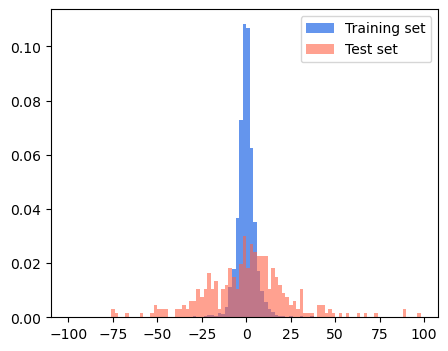

In [47]:
plt.figure(figsize=(5, 4))
plt.hist(best_catb.predict(X_train)-y_train, color='cornflowerblue',
         bins=np.arange(-100, 100, 2), density=True, label= 'Training set' )
plt.hist(best_catb.predict(X_test)-y_test, color='tomato',
         bins=np.arange(-100, 100, 2), density=True, alpha=0.6, label= 'Test set' )
plt.legend()
plt.savefig('CATB-errror_distribution.png',dpi=300, bbox_inches='tight')
plt.show()